## Imports


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Qualitative analysis


#### Lloguer dataset

In [2]:
llogdf = pd.read_csv('2017_lloguer_preu_trim.csv')
llogdf.head()

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,2017,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,2017,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,2017,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


In [3]:
llogdf.shape

(584, 8)

We have 584 rows and 8 columns. Now we will analyze the characteristics of the dataset.

#### Column investigation

In [4]:
# Writes relevant information about each column 
for col in llogdf.columns:
    print(
    f"""
    Column: {col}
    Type: {llogdf[col].dtype}
    Missing values: {llogdf[col].isna().sum()}    
    Number of unique values: {llogdf[col].nunique()}       
    """)


    Column: Any
    Type: int64
    Missing values: 0    
    Number of unique values: 1       
    

    Column: Trimestre
    Type: int64
    Missing values: 0    
    Number of unique values: 4       
    

    Column: Codi_Districte
    Type: int64
    Missing values: 0    
    Number of unique values: 10       
    

    Column: Nom_Districte
    Type: object
    Missing values: 0    
    Number of unique values: 10       
    

    Column: Codi_Barri
    Type: int64
    Missing values: 0    
    Number of unique values: 73       
    

    Column: Nom_Barri
    Type: object
    Missing values: 0    
    Number of unique values: 73       
    

    Column: Lloguer_mitja
    Type: object
    Missing values: 0    
    Number of unique values: 2       
    

    Column: Preu
    Type: float64
    Missing values: 38    
    Number of unique values: 504       
    


We can observe that the only column with Null values is `Preu`. We will deal with that later on. We can also see that we have 1 value for year and 4 values for `trimeste` (as we should have expected), 10 for `codi_districte` (and `nom_districte`), 73 for `codi_barri` (and `nom_barri`), 2 for `lloguer_mitjà`. Let us see which are these two values.

In [5]:
# show the unique values of "lloguer_mitja"
llogdf["Lloguer_mitja"].unique()

array(['Lloguer mitjà mensual (Euros/mes)',
       'Lloguer mitjà per superfície (Euros/m2 mes)'], dtype=object)

As we can see, it seems like we have the data of the price for each combination of district and neighborhood both in euros and euros per square meter.

#### Data reorganization

We will now reorganize the data in order to make analysis easier. The first step is to get rid of unnecesary columns such as "Any" (only one value) and "codi_districte" and "codi_barri" (we will use the names instead). We will also rename the columns to make them easier to use.

In [6]:
llogdf.drop(columns=["Any", "Codi_Barri", "Codi_Districte"], inplace=True)
llogdf.head()

,Trimestre,Nom_Districte,Nom_Barri,Lloguer_mitja,Preu
0,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,1,Ciutat Vella,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,1,Ciutat Vella,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,1,Eixample,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08


Now we will reduce the number of rows by grouping in the same row the data of the same district and neighborhood.

In [7]:
# rows where the price is the mean total price
llogdf_month = llogdf[llogdf["Lloguer_mitja"] == "Lloguer mitjà mensual (Euros/mes)"]


# rows where the price is the mean price per square meter
llogdf_sqrmet = llogdf[llogdf["Lloguer_mitja"] != "Lloguer mitjà mensual (Euros/mes)"]

llogdf_price = pd.merge(llogdf_month, llogdf_sqrmet, on=["Nom_Barri", "Nom_Districte", "Trimestre"],  how='inner')
llogdf_price.head()

,Trimestre,Nom_Districte,Nom_Barri,Lloguer_mitja_x,Preu_x,Lloguer_mitja_y,Preu_y
0,1,Ciutat Vella,el Raval,Lloguer mitjà mensual (Euros/mes),734.99,Lloguer mitjà per superfície (Euros/m2 mes),13.50
1,1,Ciutat Vella,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26,Lloguer mitjà per superfície (Euros/m2 mes),14.14
2,1,Ciutat Vella,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78,Lloguer mitjà per superfície (Euros/m2 mes),19.46
3,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28,Lloguer mitjà per superfície (Euros/m2 mes),15.01
4,1,Eixample,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08,Lloguer mitjà per superfície (Euros/m2 mes),12.77


In [8]:
llogdf_price.shape

(292, 7)

We observe that the cardinality is what we expected. Now, well put the data in a more convenient way, eliminatig the now useless columns and renaming the remaining ones to make information clearer.

In [9]:
llogdf_price.drop(columns=["Lloguer_mitja_x", "Lloguer_mitja_y"], inplace=True)
llogdf_price.columns = ["Trimestre", "Nom_Districte", "Nom_Barri", "Preu",	"Preu_per_m2"]

In [10]:
llogdf_price.head()

,Trimestre,Nom_Districte,Nom_Barri,Preu,Preu_per_m2
0,1,Ciutat Vella,el Raval,734.99,13.50
1,1,Ciutat Vella,el Barri Gòtic,905.26,14.14
2,1,Ciutat Vella,la Barceloneta,722.78,19.46
3,1,Ciutat Vella,"Sant Pere, Santa Caterina i la Ribera",895.28,15.01
4,1,Eixample,el Fort Pienc,871.08,12.77


Know we are almost finished with the data reorganization. Only two things last. The first one I to make one column for each Preu and Preu_per_m2 per trimester. This will make data more clear while also grouping all the information about one place in a single row.

The second thing is making a Multiindex with districte and barri. This will help understanding how barris are grouped.

In [11]:
# Use pivot_table to create separate columns for each trimestre for preu
pivot_preu = llogdf_price.pivot_table(index=['Nom_Districte', 'Nom_Barri'], columns='Trimestre', values='Preu', aggfunc='first')

# Use pivot_table to create separate columns for each Trimestre for preu_per_m2
pivot_preu_per_m2 = llogdf_price.pivot_table(index=['Nom_Districte', 'Nom_Barri'], columns='Trimestre', values='Preu_per_m2', aggfunc='first')


# Merge the two pivot DataFrames 
llogdf_pivot = pd.merge(pivot_preu, pivot_preu_per_m2, on=['Nom_Districte', 'Nom_Barri'])

In [12]:
llogdf_pivot.head()

Trimestre                                               1_x     2_x      3_x   
Nom_Districte Nom_Barri                                                        
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera  895.28  930.13   927.16  \
              el Barri Gòtic                         905.26  968.16  1028.49   
              el Raval                               734.99  714.29   764.85   
              la Barceloneta                         722.78  738.25   758.18   
Eixample      Sant Antoni                            876.97  887.78   922.46   

Trimestre                                               4_x    1_y    2_y   
Nom_Districte Nom_Barri                                                     
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera  914.78  15.01  15.99  \
              el Barri Gòtic                         993.16  14.14  13.78   
              el Raval                               776.73  13.50  13.69   
              la Barceloneta                         766.03  19.46  19.87   
Eixample      Sant Antoni                            905.83  12.38  12.79   

Trimestre                                              3_y    4_y  
Nom_Districte Nom_Barri                                            
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera  16.16  15.66  
              el Barri Gòtic                         14.43  14.41  
              el Raval                               13.97  14.42  
              la Barceloneta                         19.72  20.33  
Eixample      Sant Antoni                            13.16  13.46

Lastly, we rename the columns.

In [13]:
# rename price columns to "preu_T{trimestre_number}" and price per m2 to "preu_m2_T{trimestre_number}"
llogdf_pivot.rename(mapper = lambda x : f"Preu_T{x[0]}" if x[2] == "x" else f"Preu_m2_T{x[0]}", axis= 1, inplace=True)

In [14]:
llogdf_pivot.head()

Trimestre                                            Preu_T1  Preu_T2   
Nom_Districte Nom_Barri                                                 
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   895.28   930.13  \
              el Barri Gòtic                          905.26   968.16   
              el Raval                                734.99   714.29   
              la Barceloneta                          722.78   738.25   
Eixample      Sant Antoni                             876.97   887.78   

Trimestre                                            Preu_T3  Preu_T4   
Nom_Districte Nom_Barri                                                 
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera   927.16   914.78  \
              el Barri Gòtic                         1028.49   993.16   
              el Raval                                764.85   776.73   
              la Barceloneta                          758.18   766.03   
Eixample      Sant Antoni                             922.46   905.83   

Trimestre                                            Preu_m2_T1  Preu_m2_T2   
Nom_Districte Nom_Barri                                                       
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera       15.01       15.99  \
              el Barri Gòtic                              14.14       13.78   
              el Raval                                    13.50       13.69   
              la Barceloneta                              19.46       19.87   
Eixample      Sant Antoni                                 12.38       12.79   

Trimestre                                            Preu_m2_T3  Preu_m2_T4  
Nom_Districte Nom_Barri                                                      
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera       16.16       15.66  
              el Barri Gòtic                              14.43       14.41  
              el Raval                                    13.97       14.42  
              la Barceloneta                              19.72       20.33  
Eixample      Sant Antoni                                 13.16       13.46

In [15]:
llogdf_pivot.shape

(70, 8)

#### NaN Treatment

Now that we have the data in a nicer format, we will proced to treat the NaN values that we detected before. First, lets take a look to the number of rows and columns affected after the rearranging.

In [16]:
llogdf_pivot.isna().sum()

Trimestre
Preu_T1       2
Preu_T2       1
Preu_T3       2
Preu_T4       2
Preu_m2_T1    2
Preu_m2_T2    1
Preu_m2_T3    2
Preu_m2_T4    2
dtype: int64

In [17]:
# Shows rows with null
null_mask = llogdf_pivot.isna().any(axis=1)

llogdf_pivot[null_mask]

Trimestre                  Preu_T1  Preu_T2  Preu_T3  Preu_T4  Preu_m2_T1   
Nom_Districte Nom_Barri                                                     
Nou Barris    Can Peguera      NaN   407.22      NaN      NaN         NaN  \
              Torre Baró    418.07      NaN   463.17   448.23        7.26   
              Vallbona         NaN   302.52      NaN      NaN         NaN   

Trimestre                  Preu_m2_T2  Preu_m2_T3  Preu_m2_T4  
Nom_Districte Nom_Barri                                        
Nou Barris    Can Peguera       11.68         NaN         NaN  
              Torre Baró          NaN        6.84        7.17  
              Vallbona           4.45         NaN         NaN

It seems like only three rows present problems with null values. Moreover, twp of them are almost empy (only two values of eigth). Let's try to find useful information about the price distribution in the other rows of the same district.

<AxesSubplot: xlabel='Nom_Barri'>

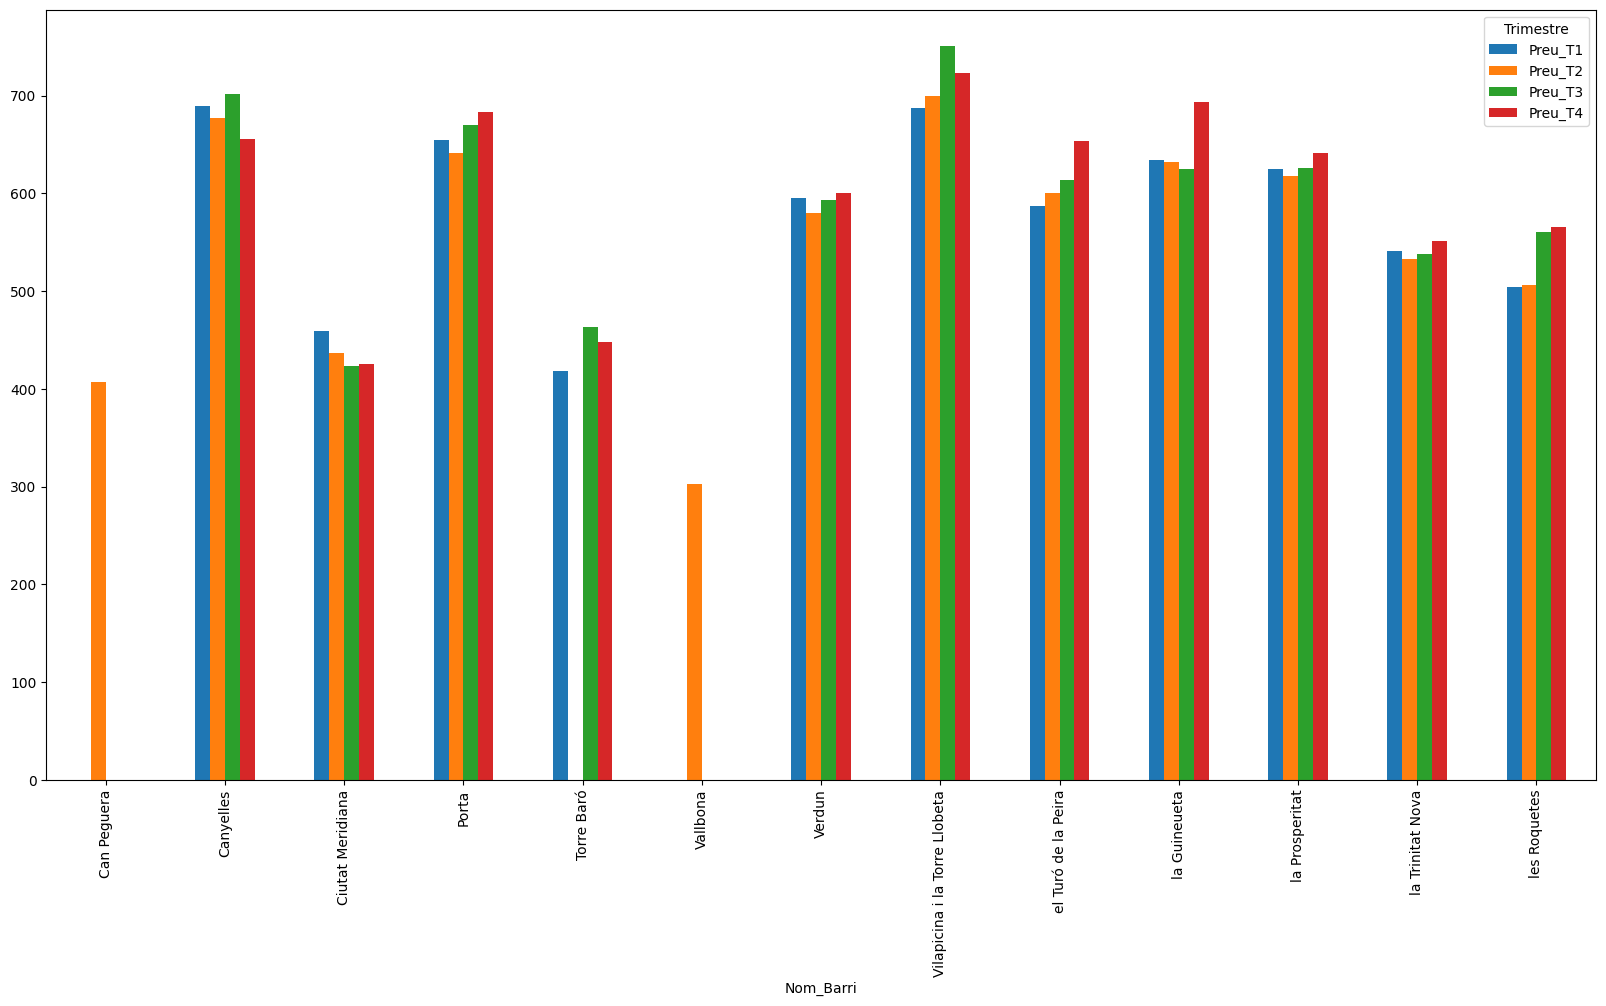

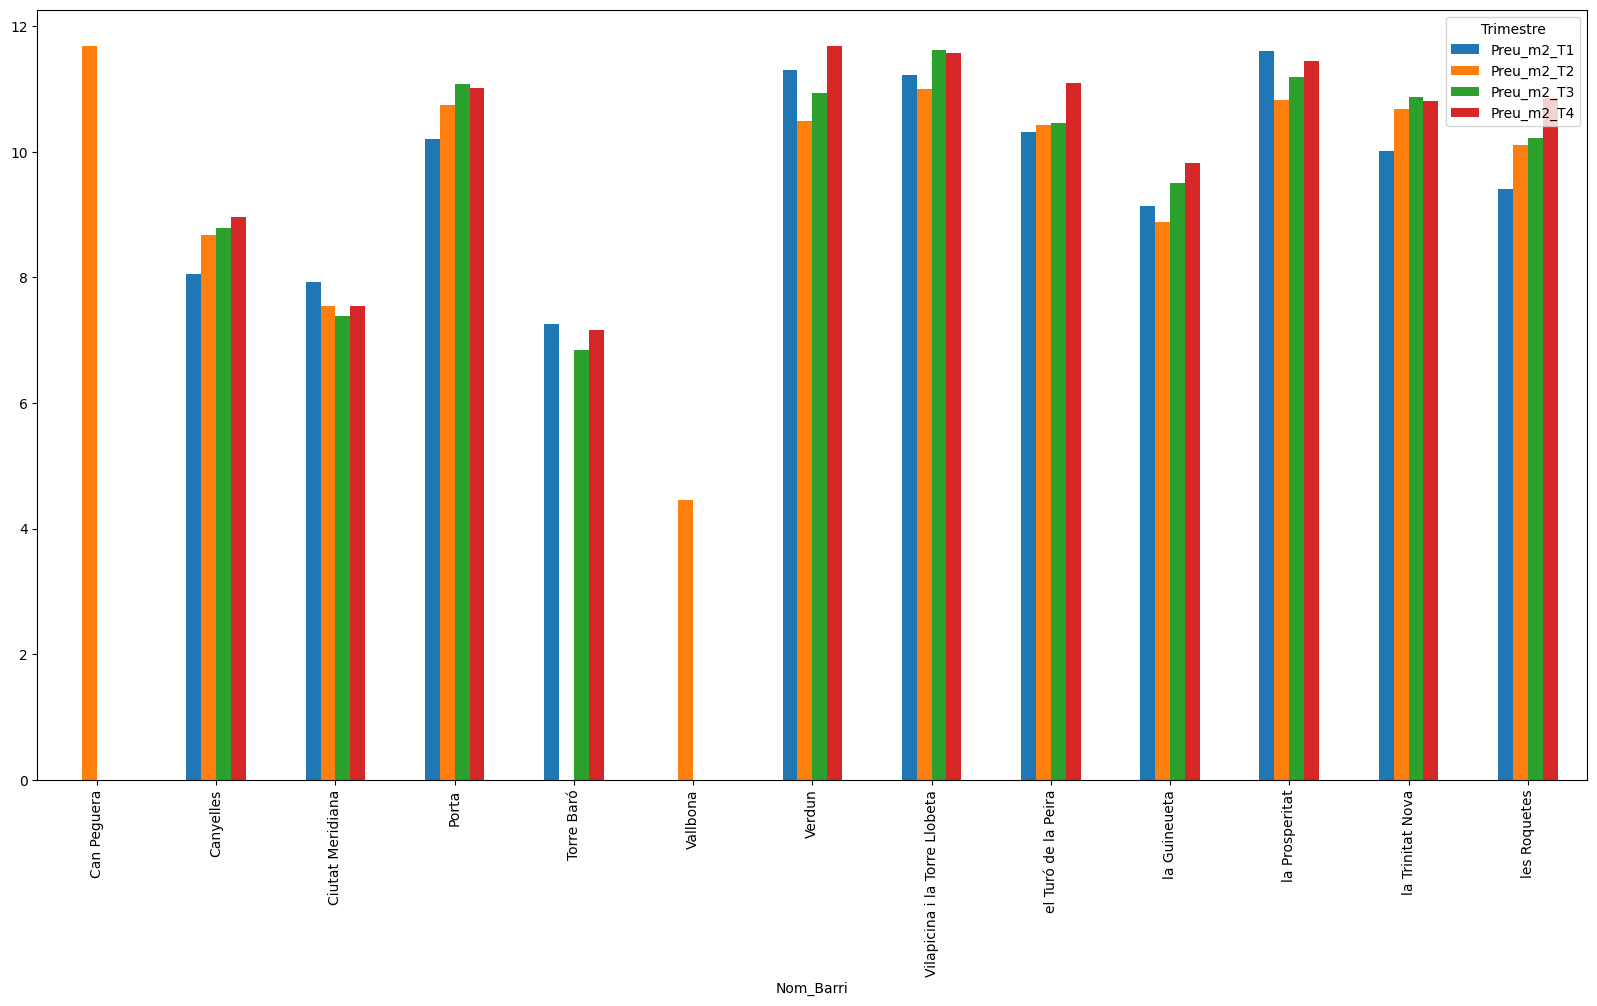

In [18]:
# We will do a very simple bar plot to see the evolution of the price
llogdf_pivot.loc["Nou Barris", "Preu_T1":"Preu_T4"].plot(kind="bar", figsize=(20,10))
llogdf_pivot.loc["Nou Barris", "Preu_m2_T1":"Preu_m2_T4"].plot(kind="bar", figsize=(20,10))

We observe that both price and price per m2 remain almost constant over time. That lead us to think that we can imput the row with only two columns missing with the mean of the other trimestres. As for the others, we will just let them be. They have so few non-null values that any attempt to imput them would not be reliable.

In [19]:
llogdf_pivot.loc[("Nou Barris", "Torre Baró"), "Preu_T2"]

nan

In [20]:
# imput the missin value for Torre Baró
llogdf_pivot.loc[("Nou Barris", "Torre Baró"), "Preu_T2"] = np.mean([llogdf_pivot.loc["Nou Barris", f"Preu_T{i}"]["Torre Baró"] for i in [1, 3, 4]])

llogdf_pivot.loc[("Nou Barris", "Torre Baró"), "Preu_m2_T2"] = np.mean([llogdf_pivot.loc["Nou Barris", f"Preu_m2_T{i}"]["Torre Baró"] for i in [1, 3, 4]])

In [21]:
llogdf_pivot.loc["Nou Barris", "Torre Baró"]

Trimestre
Preu_T1       418.070000
Preu_T2       443.156667
Preu_T3       463.170000
Preu_T4       448.230000
Preu_m2_T1      7.260000
Preu_m2_T2      7.090000
Preu_m2_T3      6.840000
Preu_m2_T4      7.170000
Name: (Nou Barris, Torre Baró), dtype: float64

#### Search for outliers

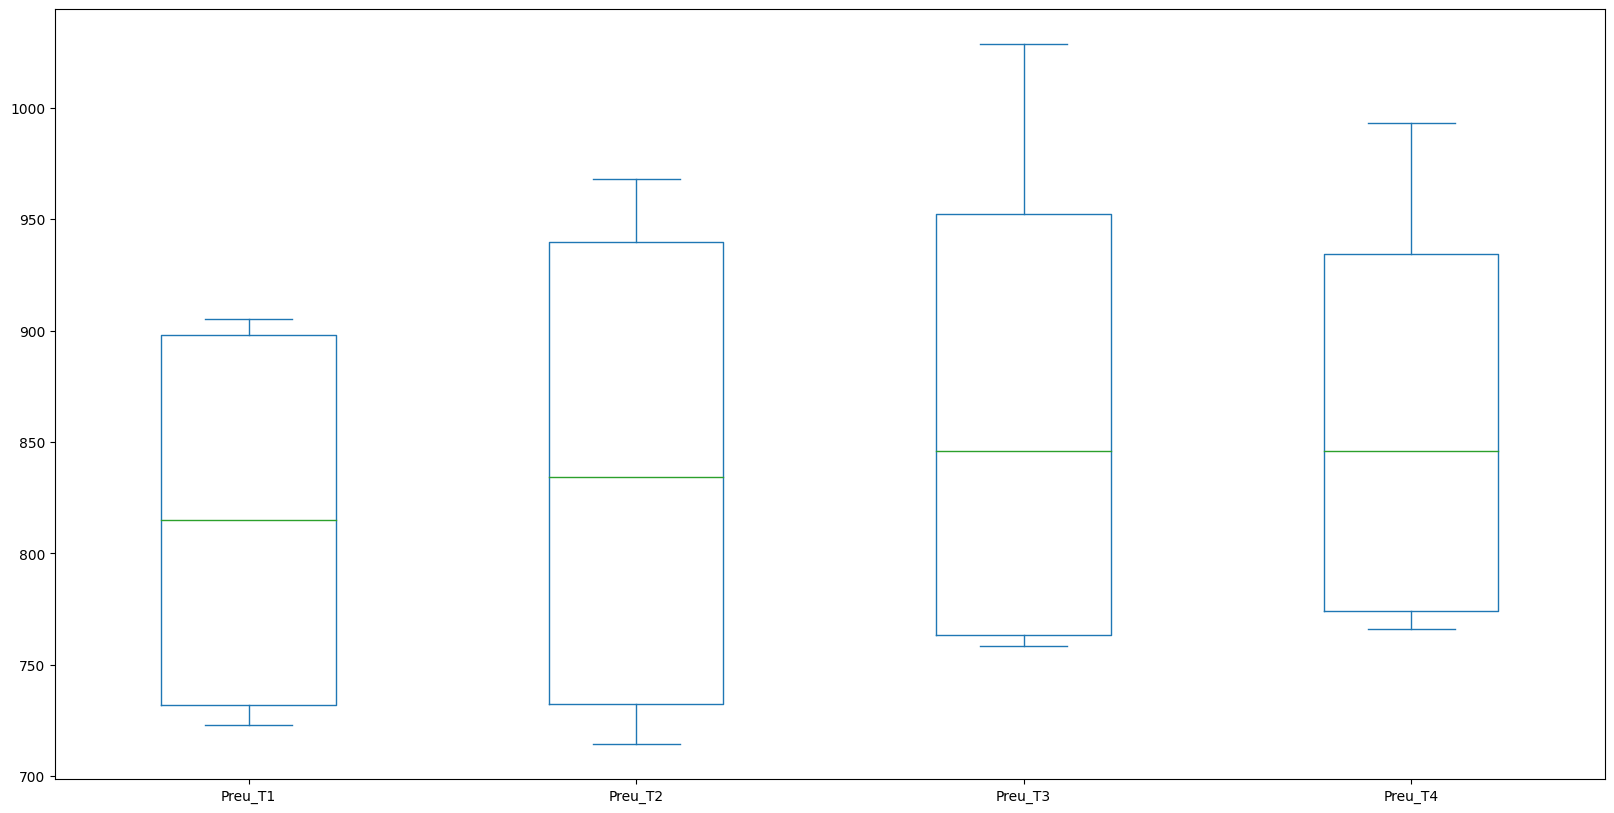

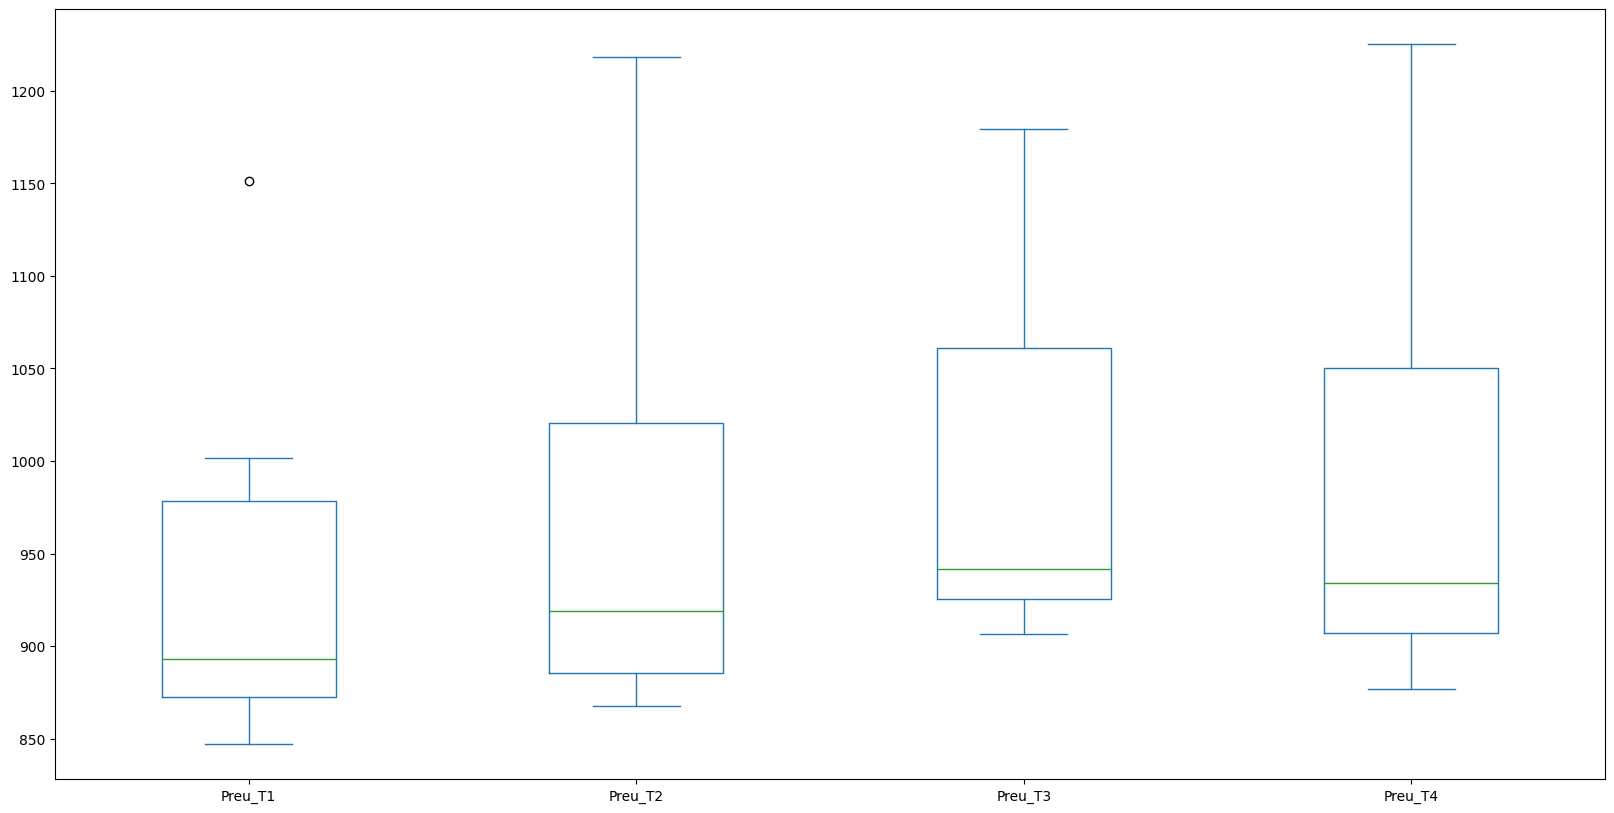

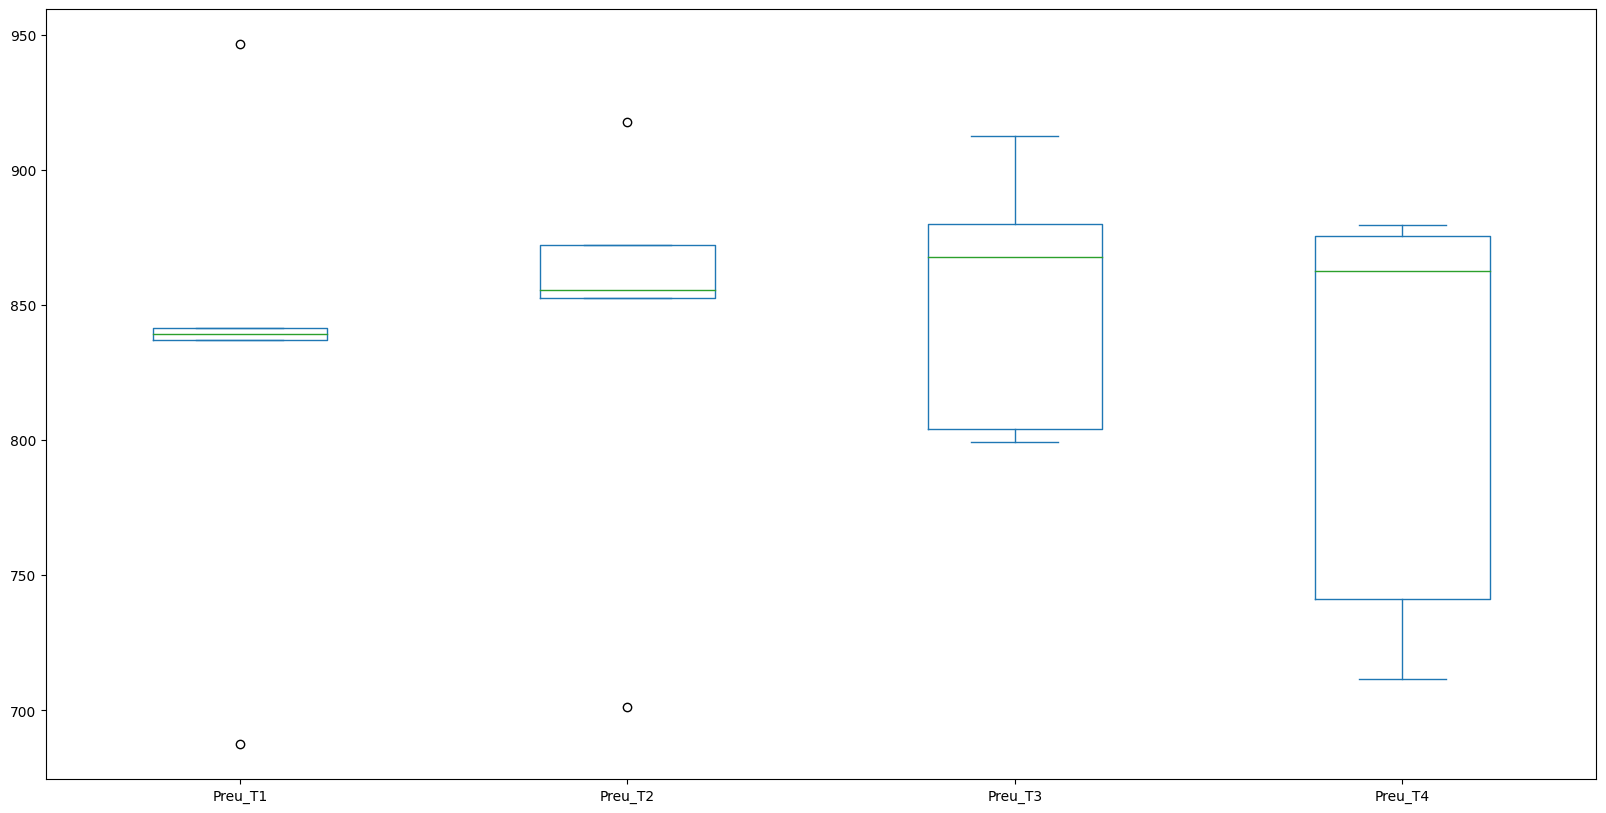

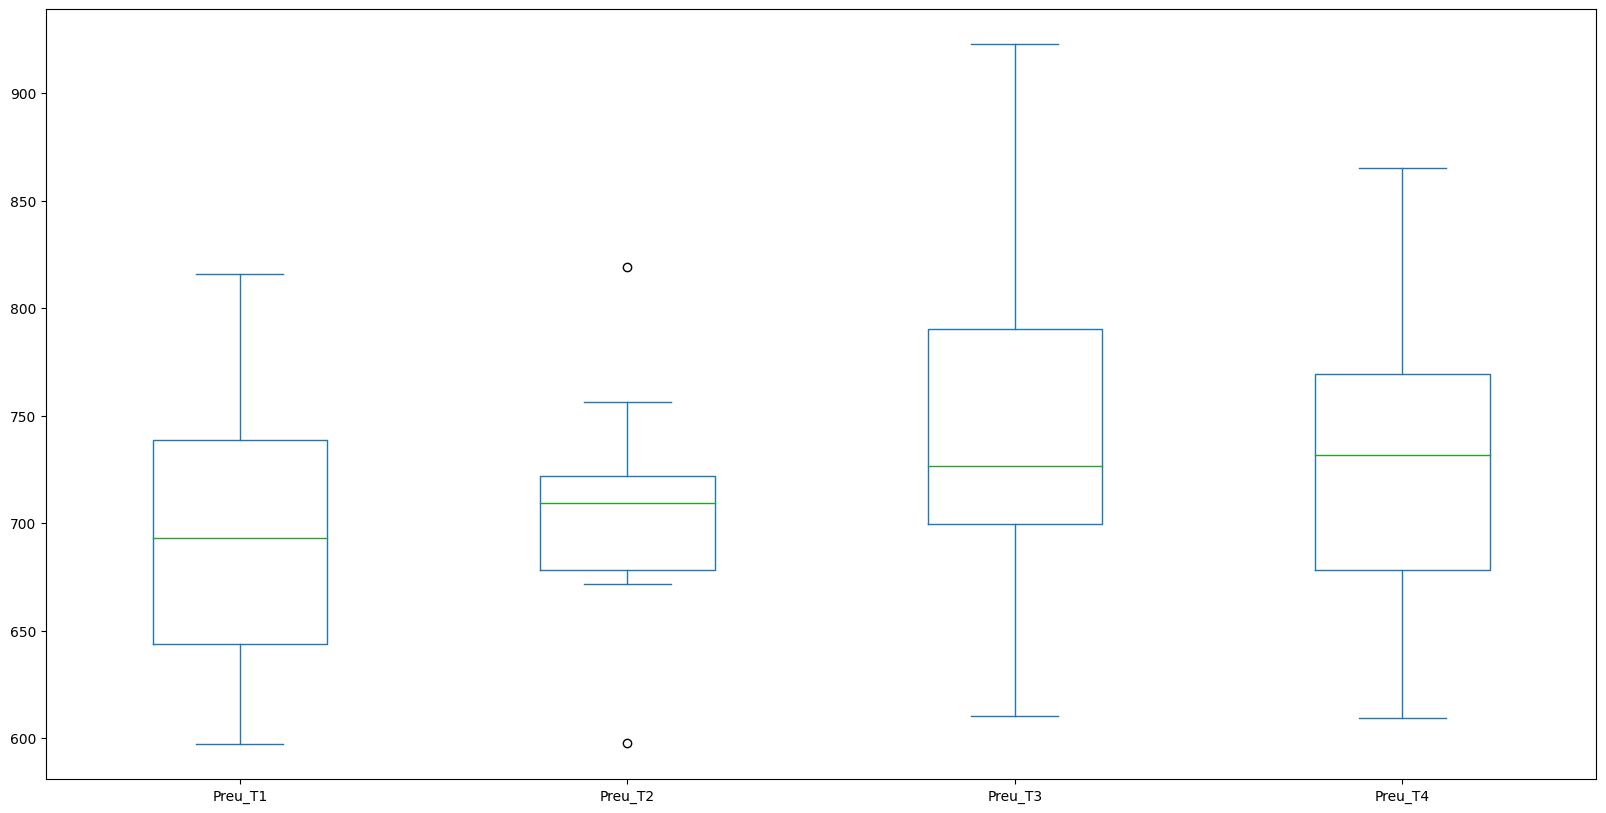

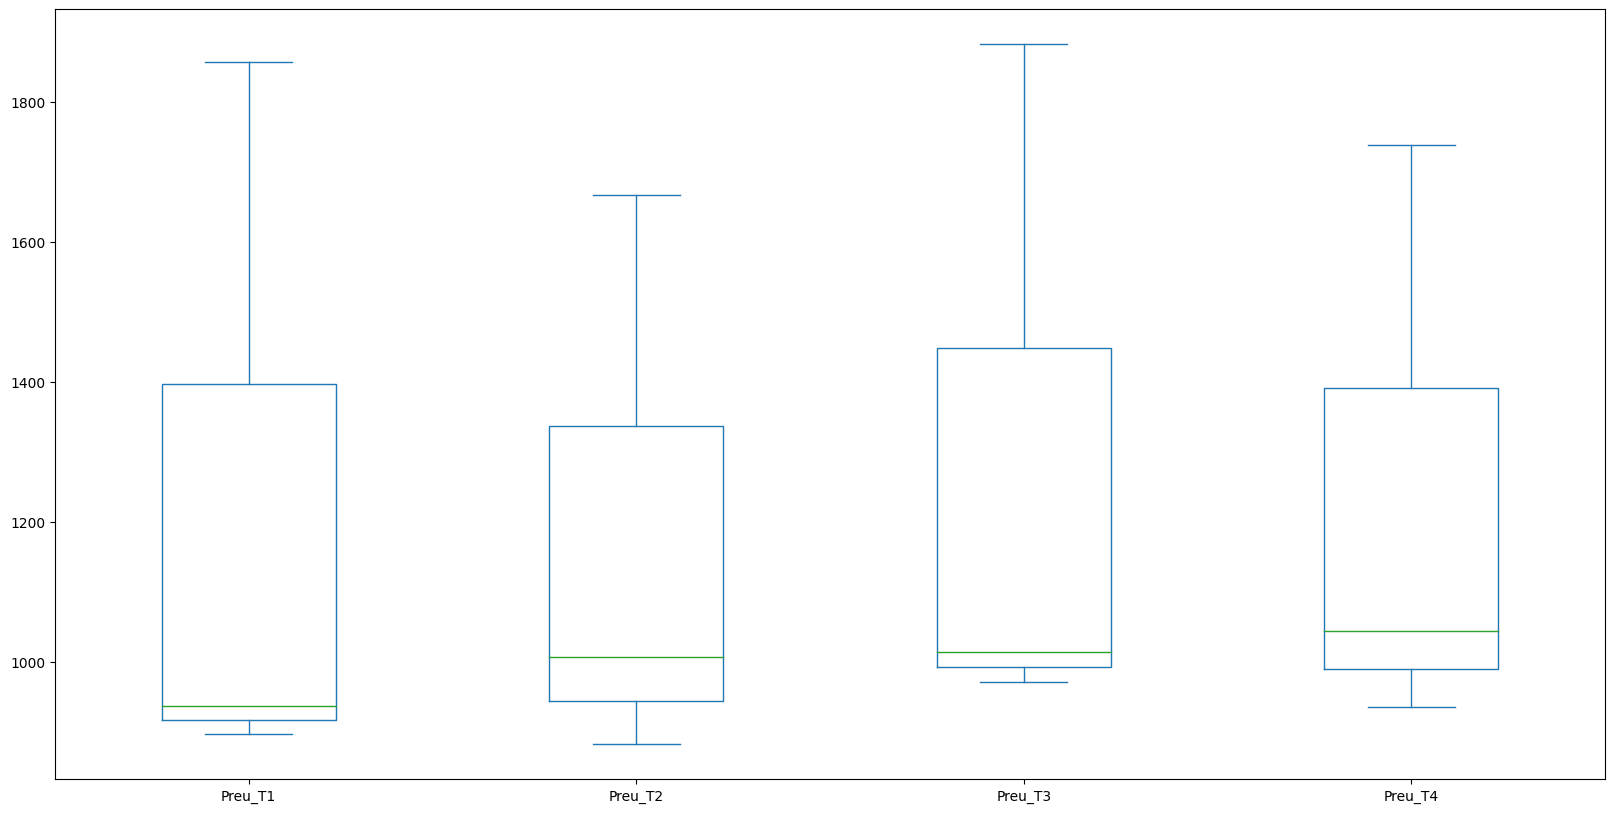

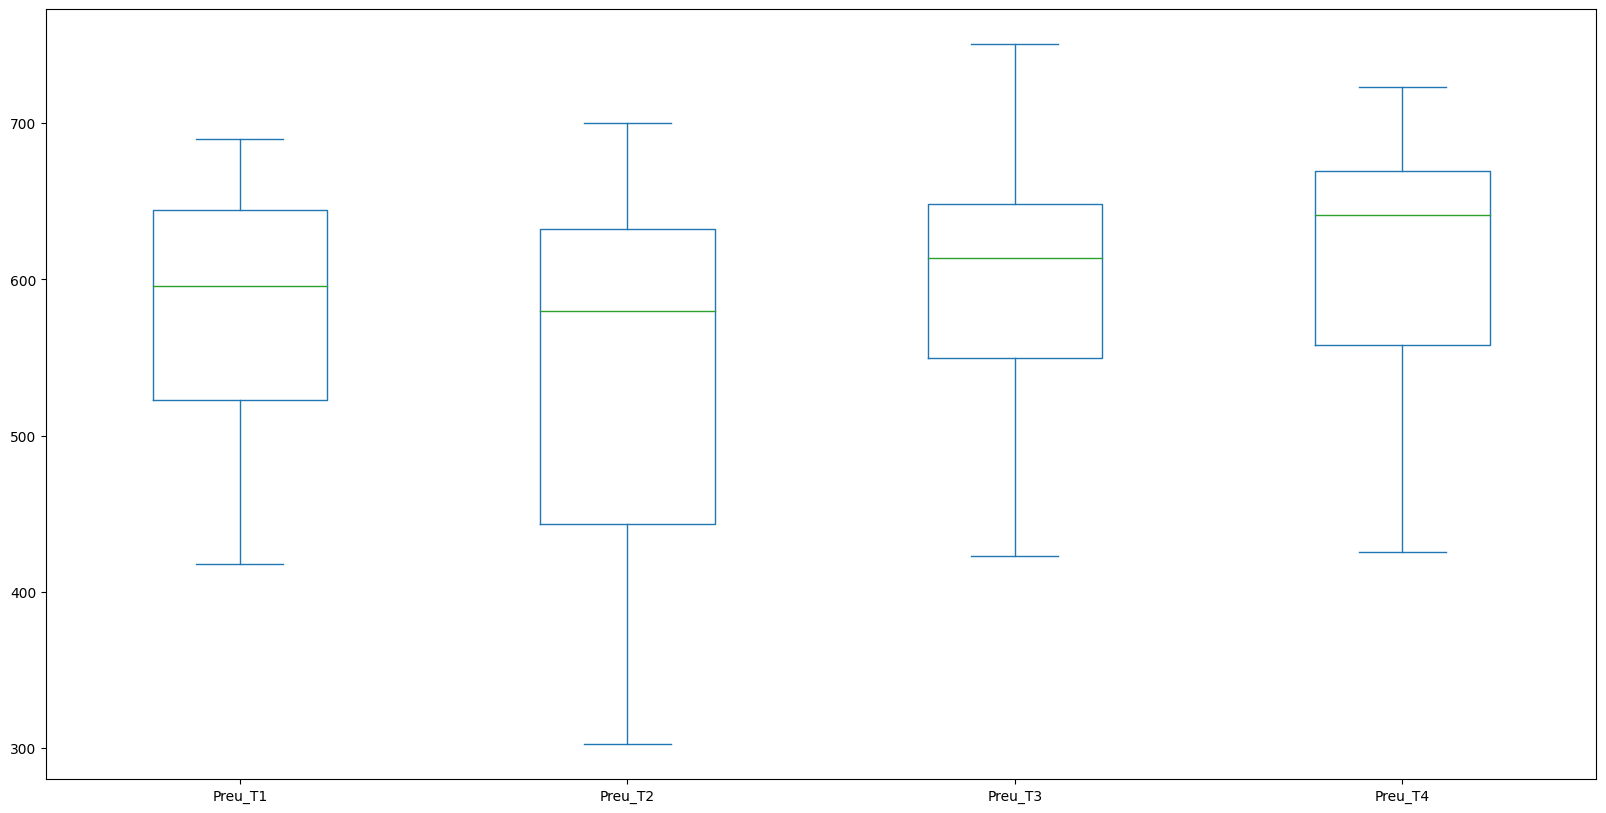

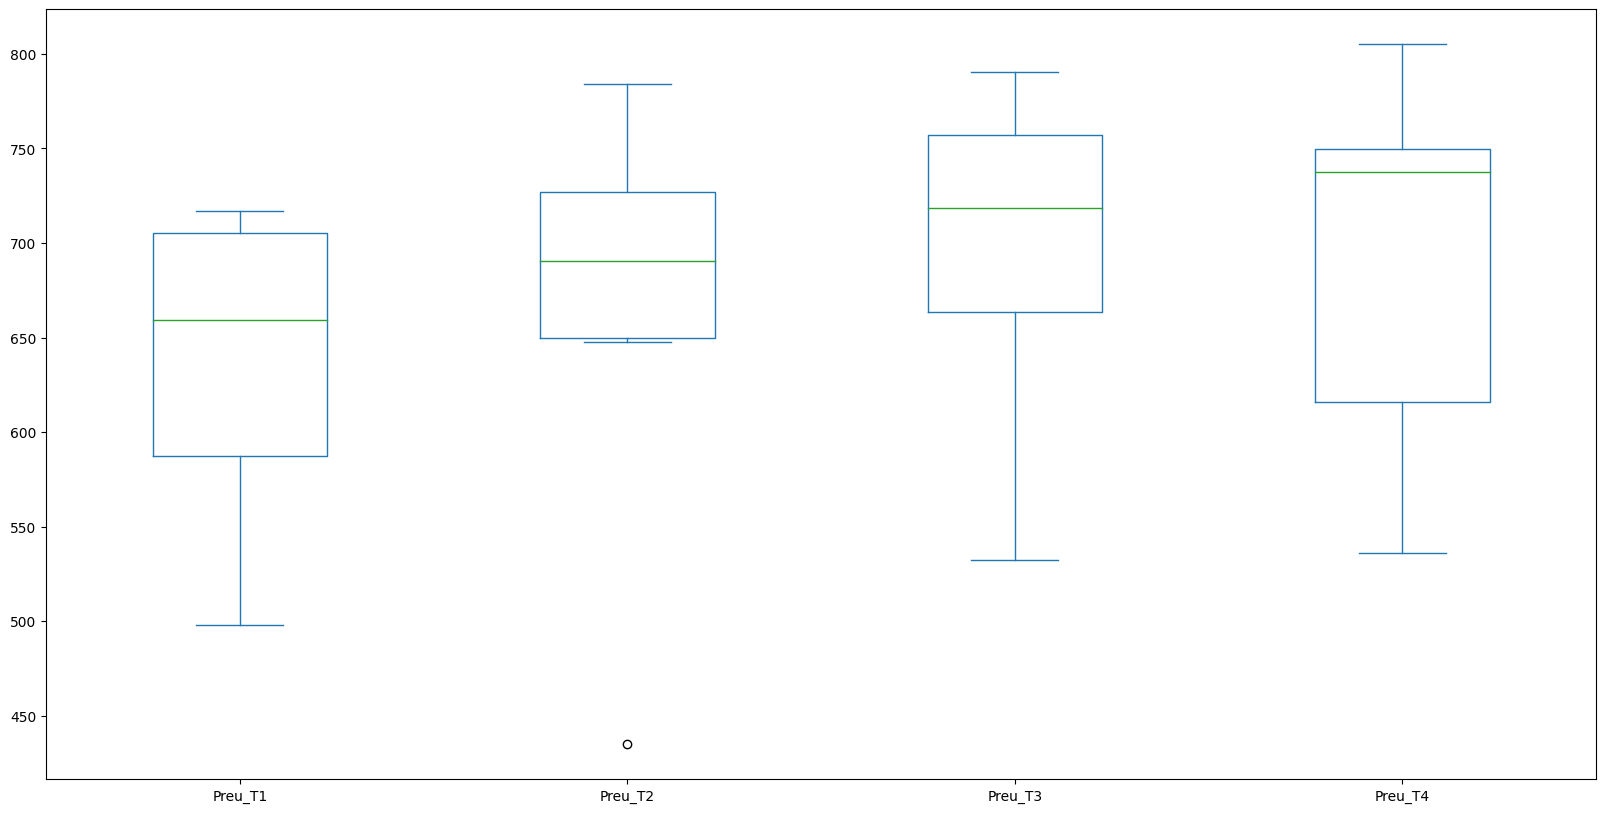

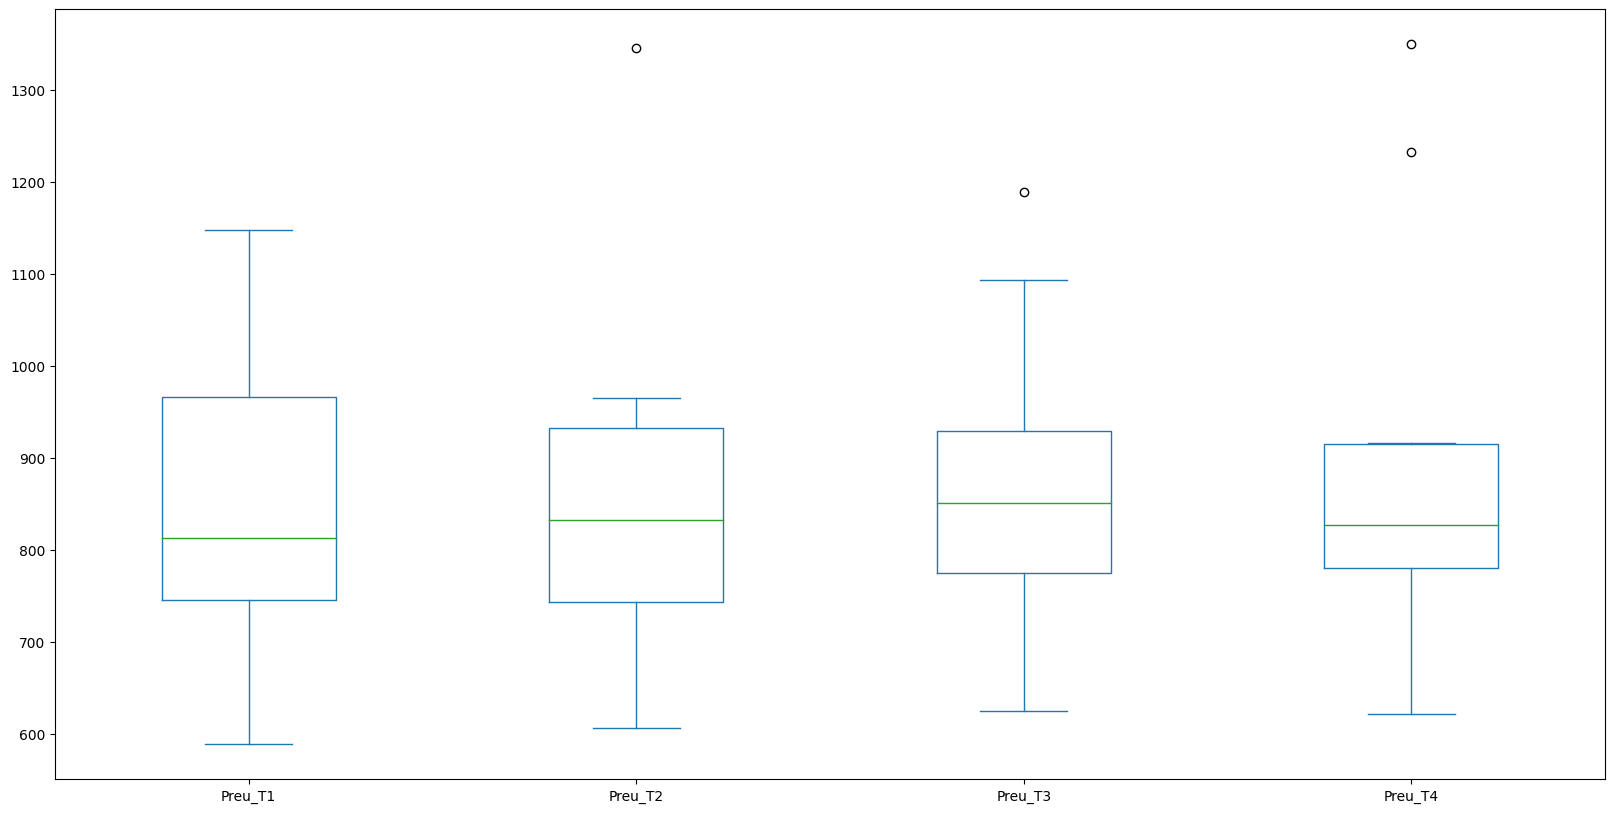

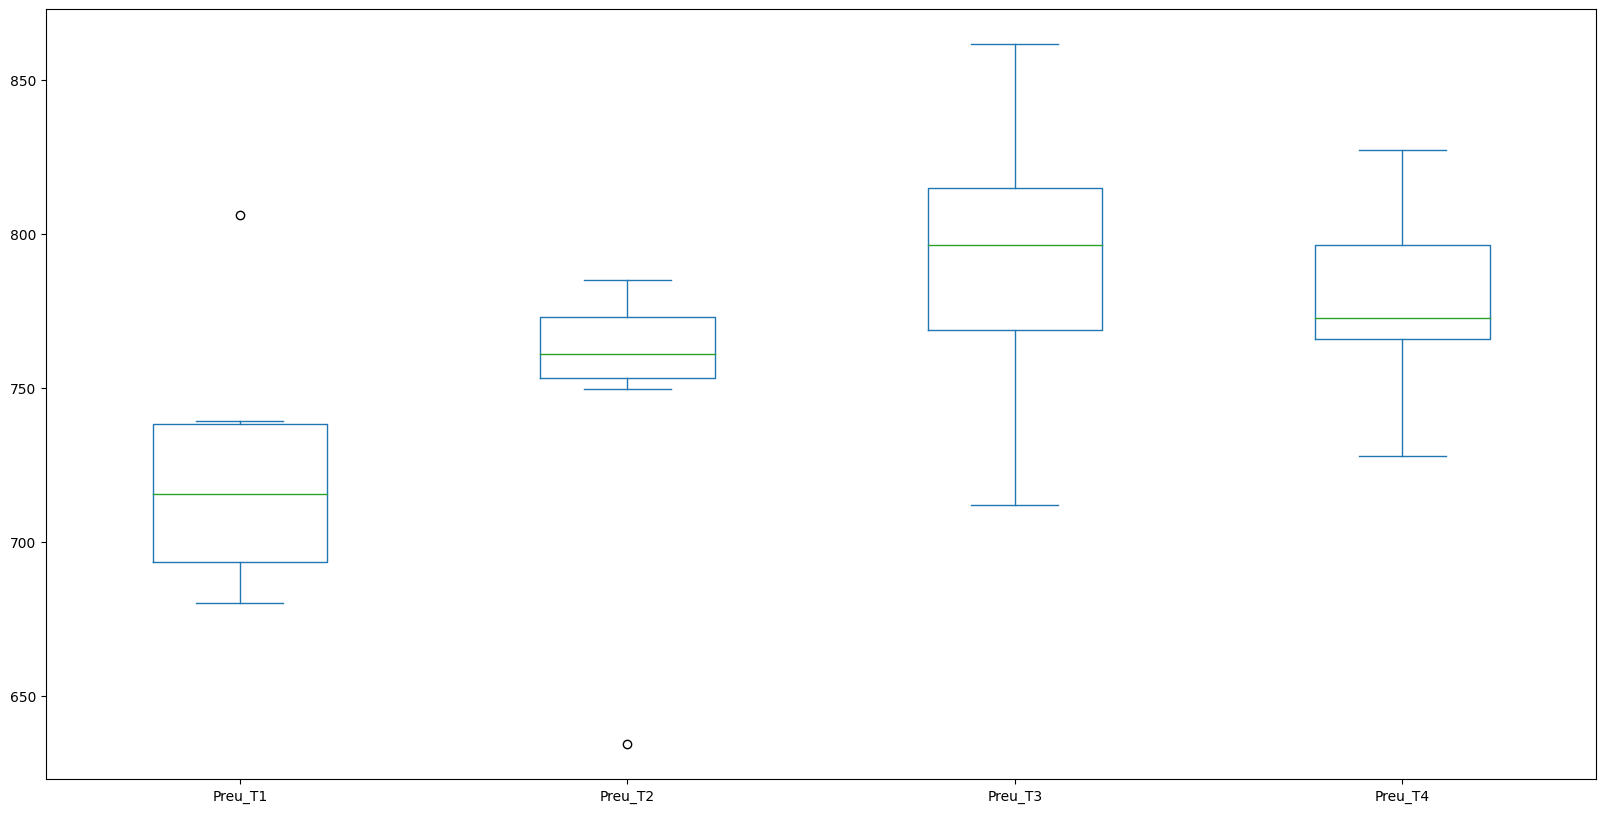

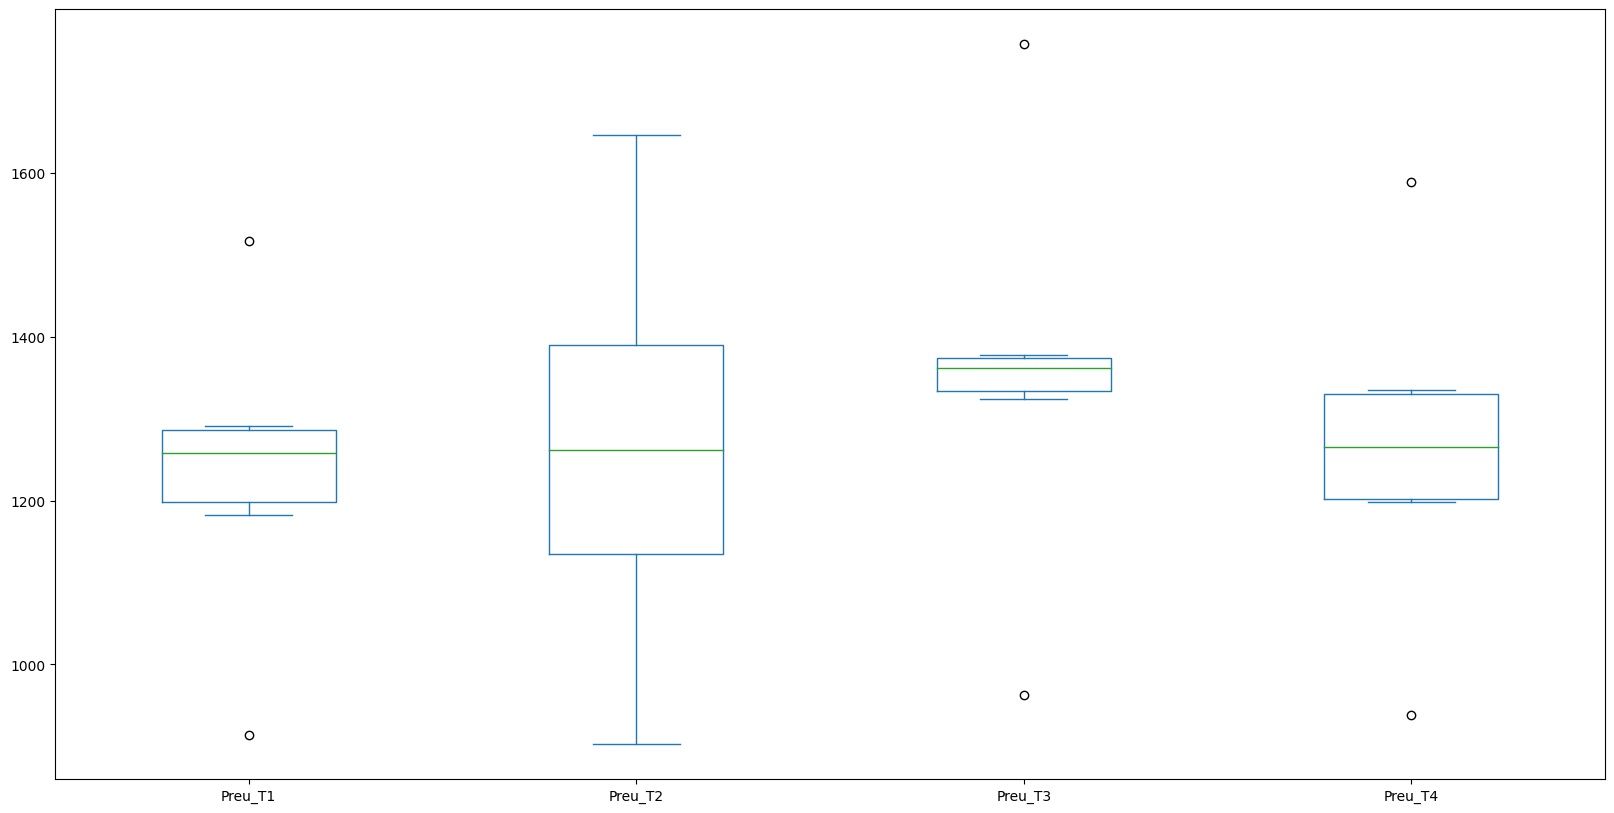

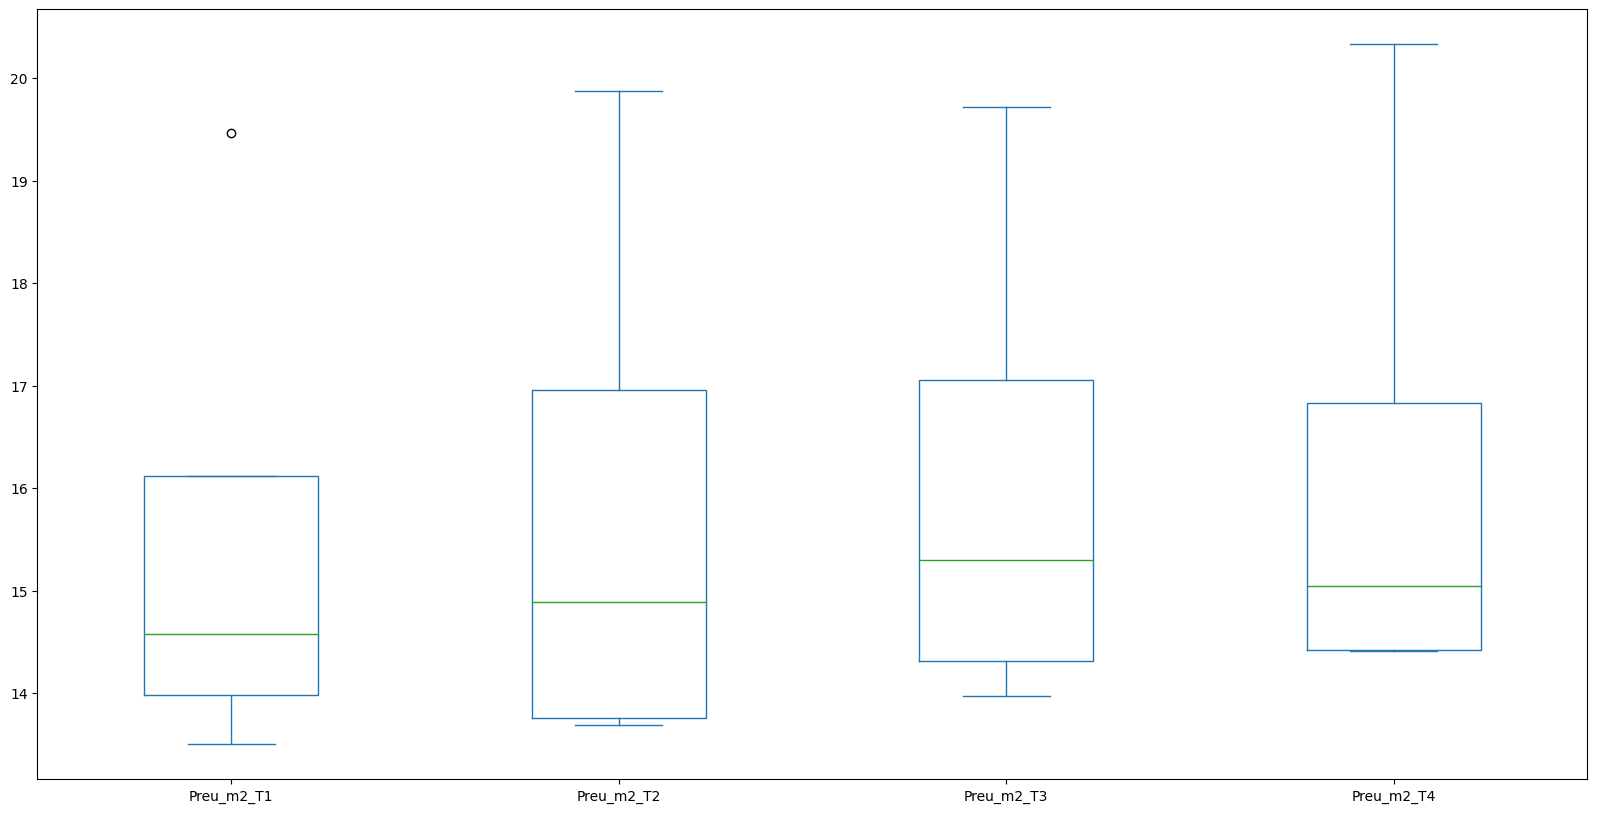

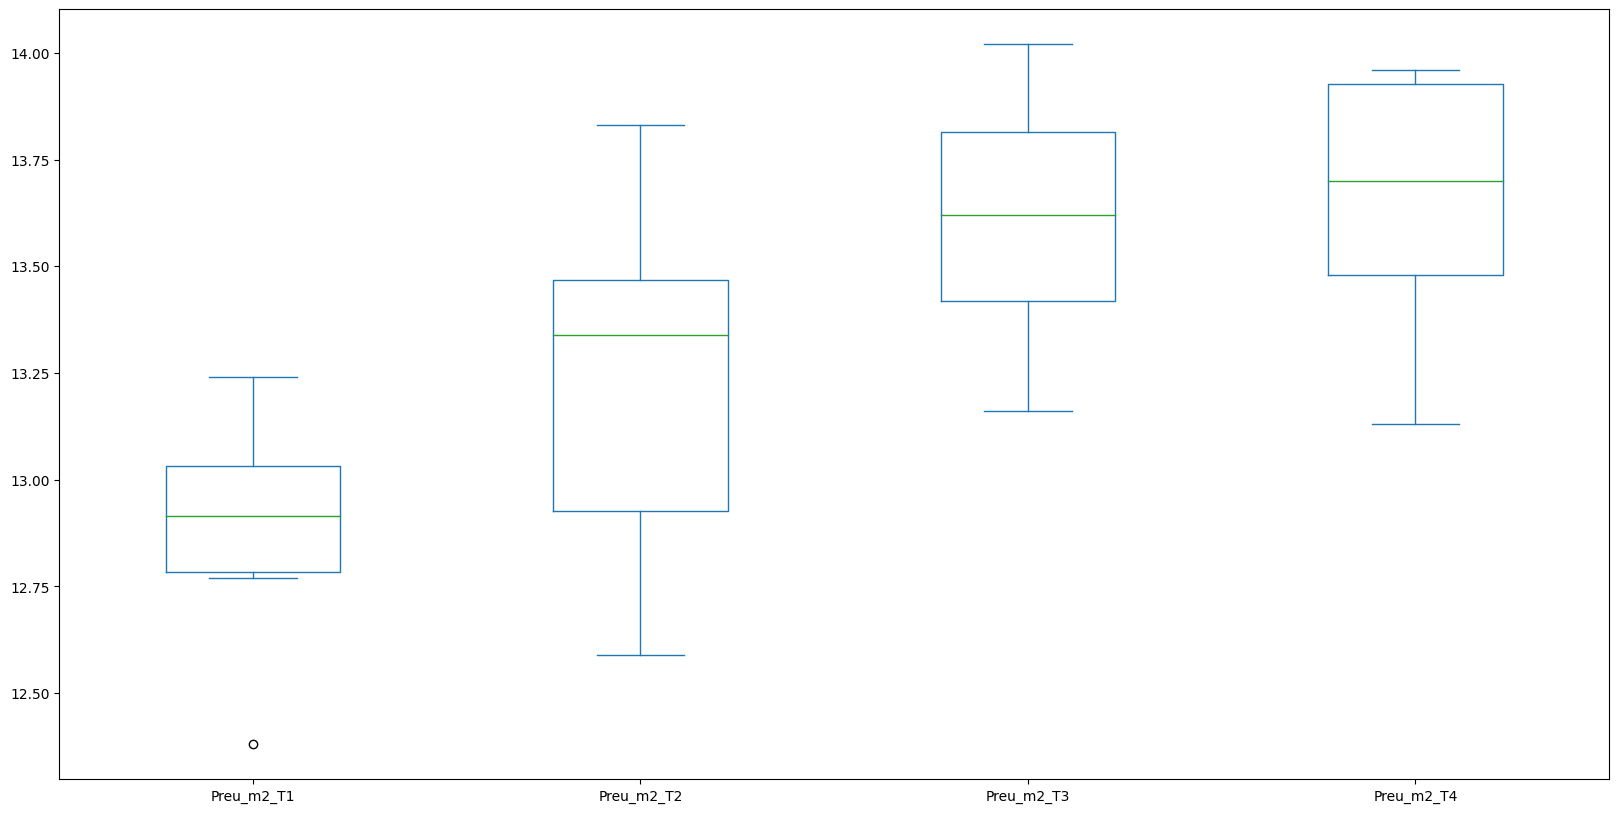

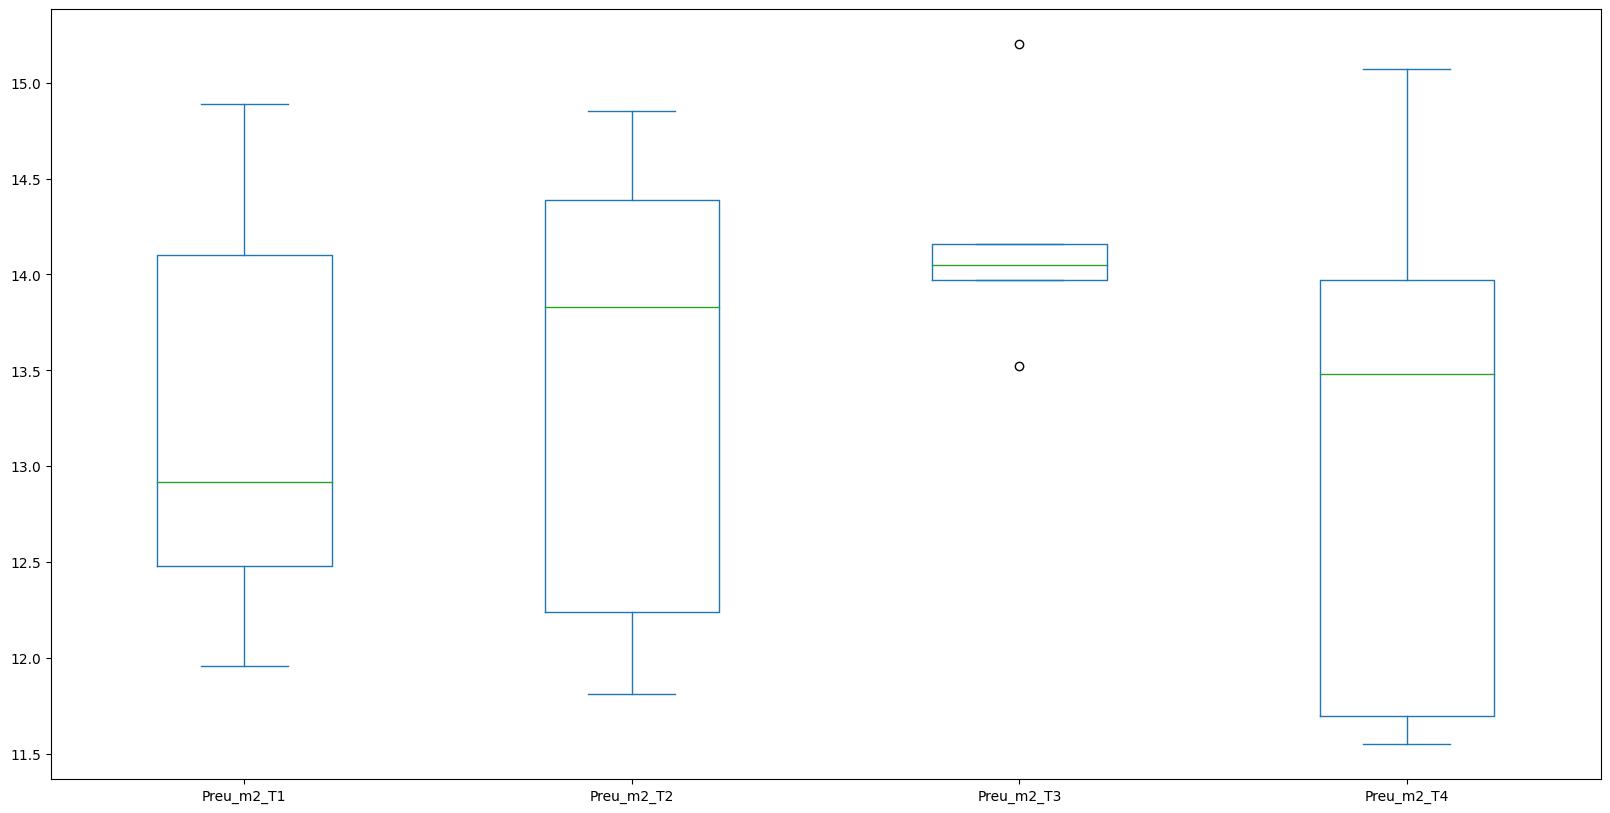

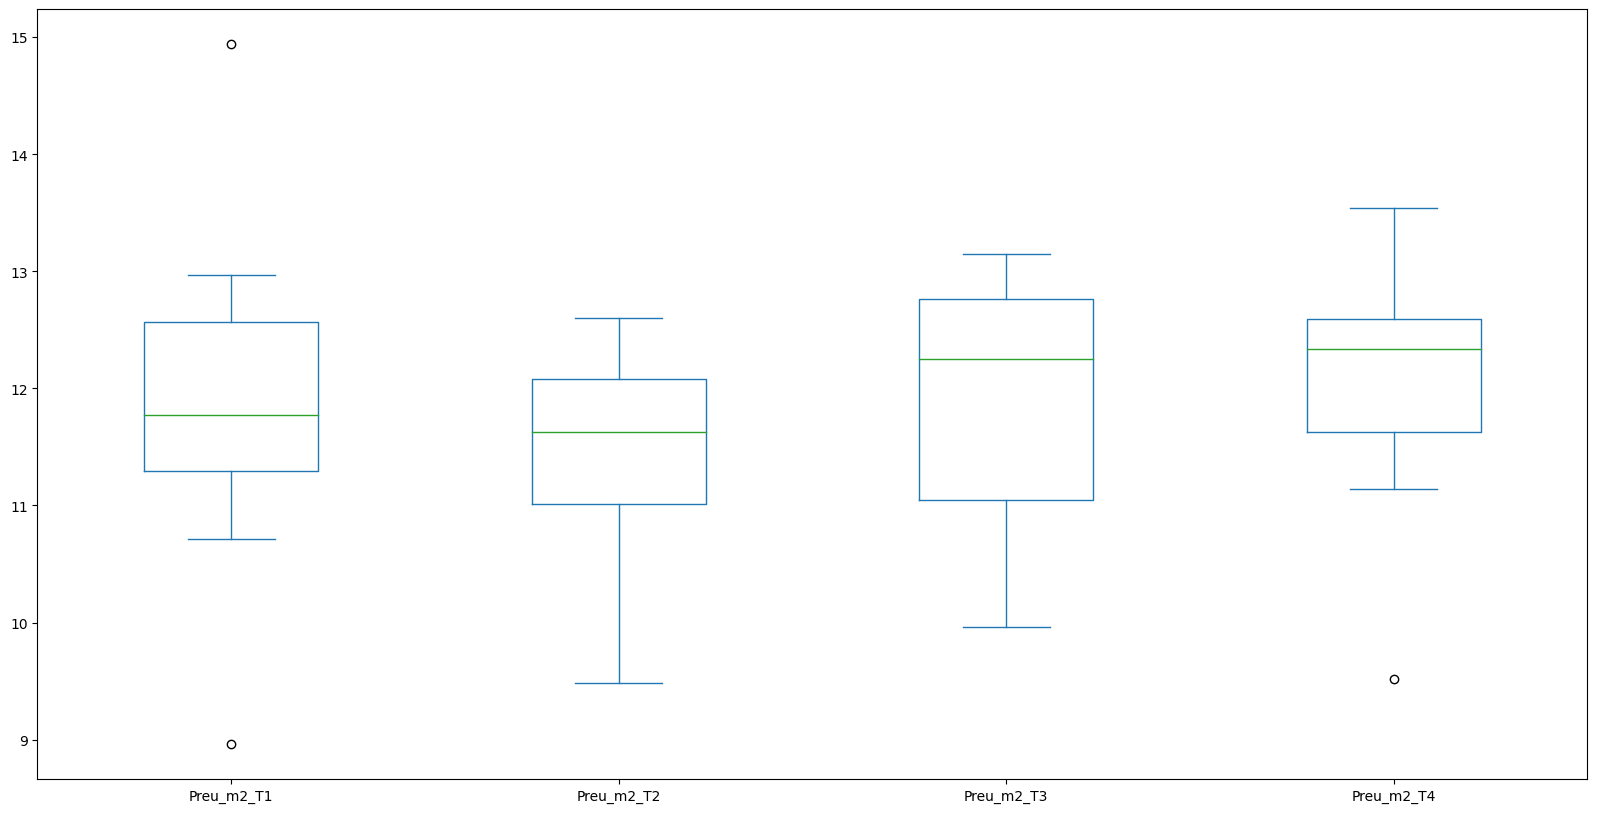

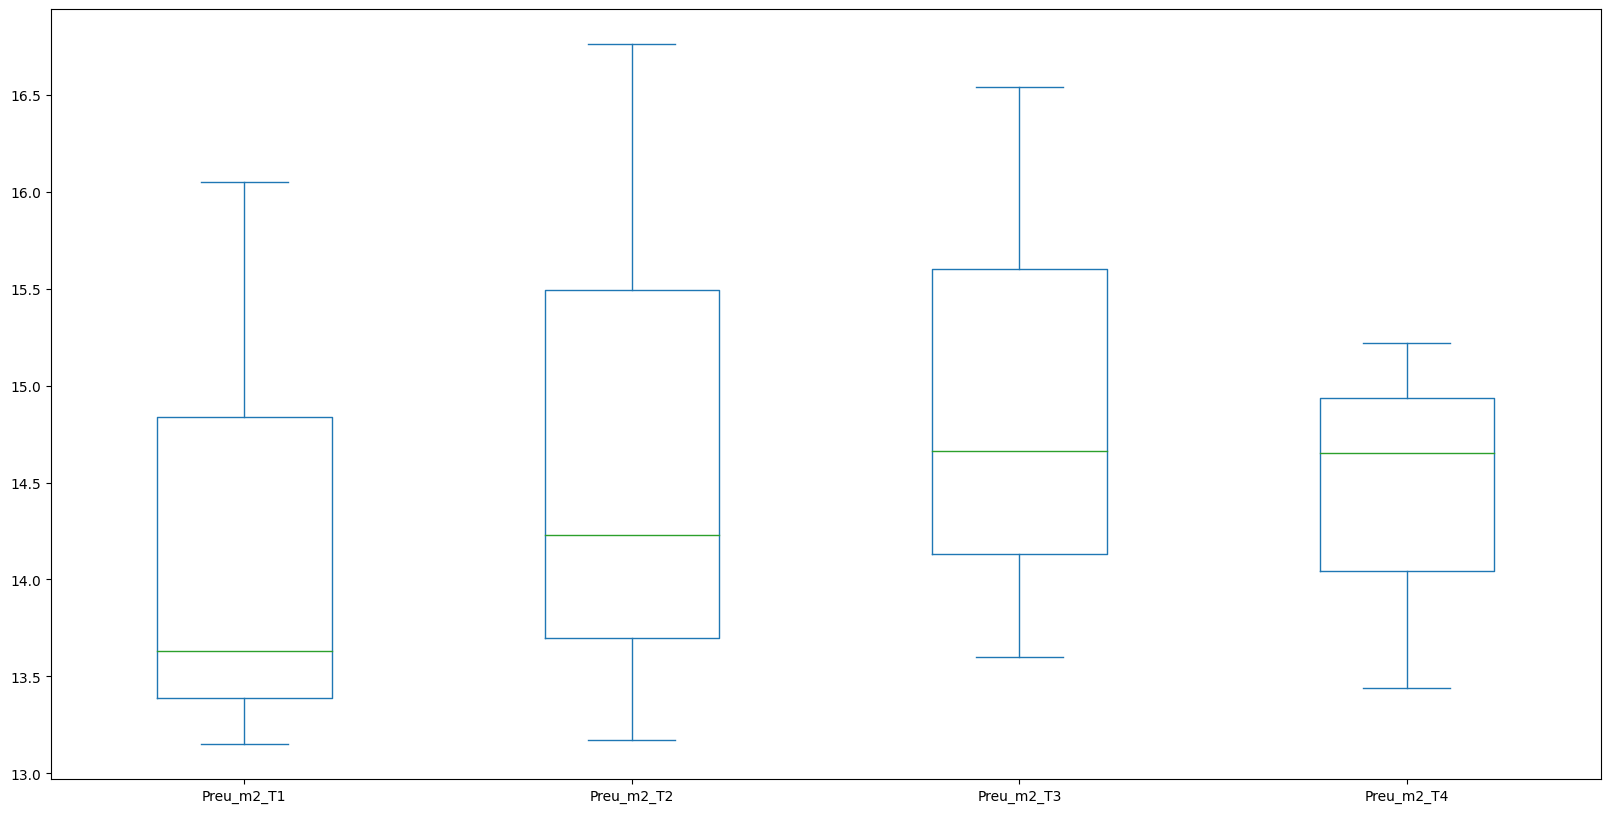

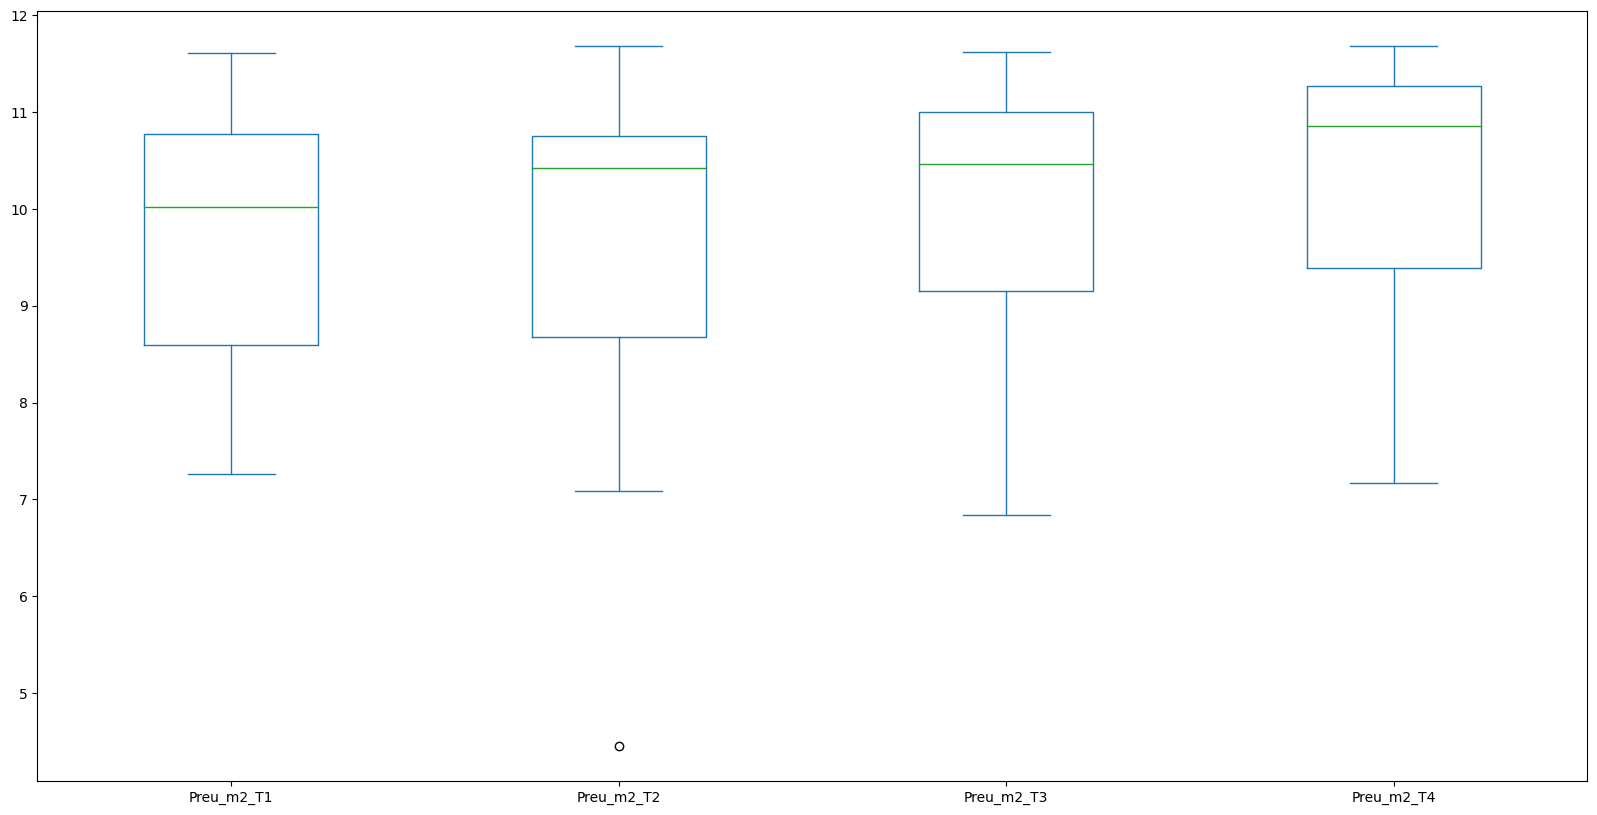

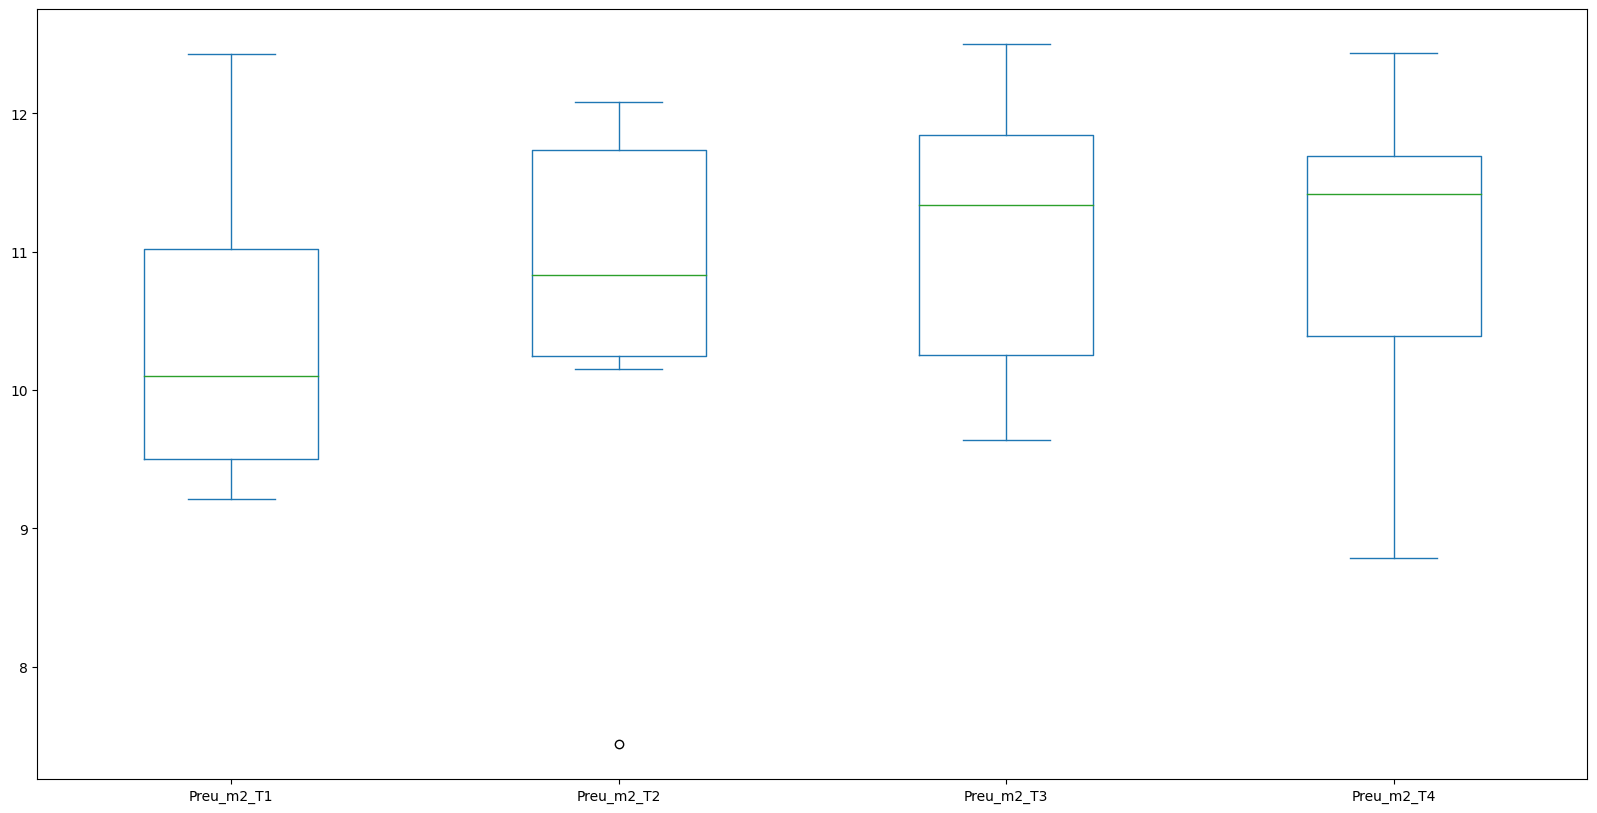

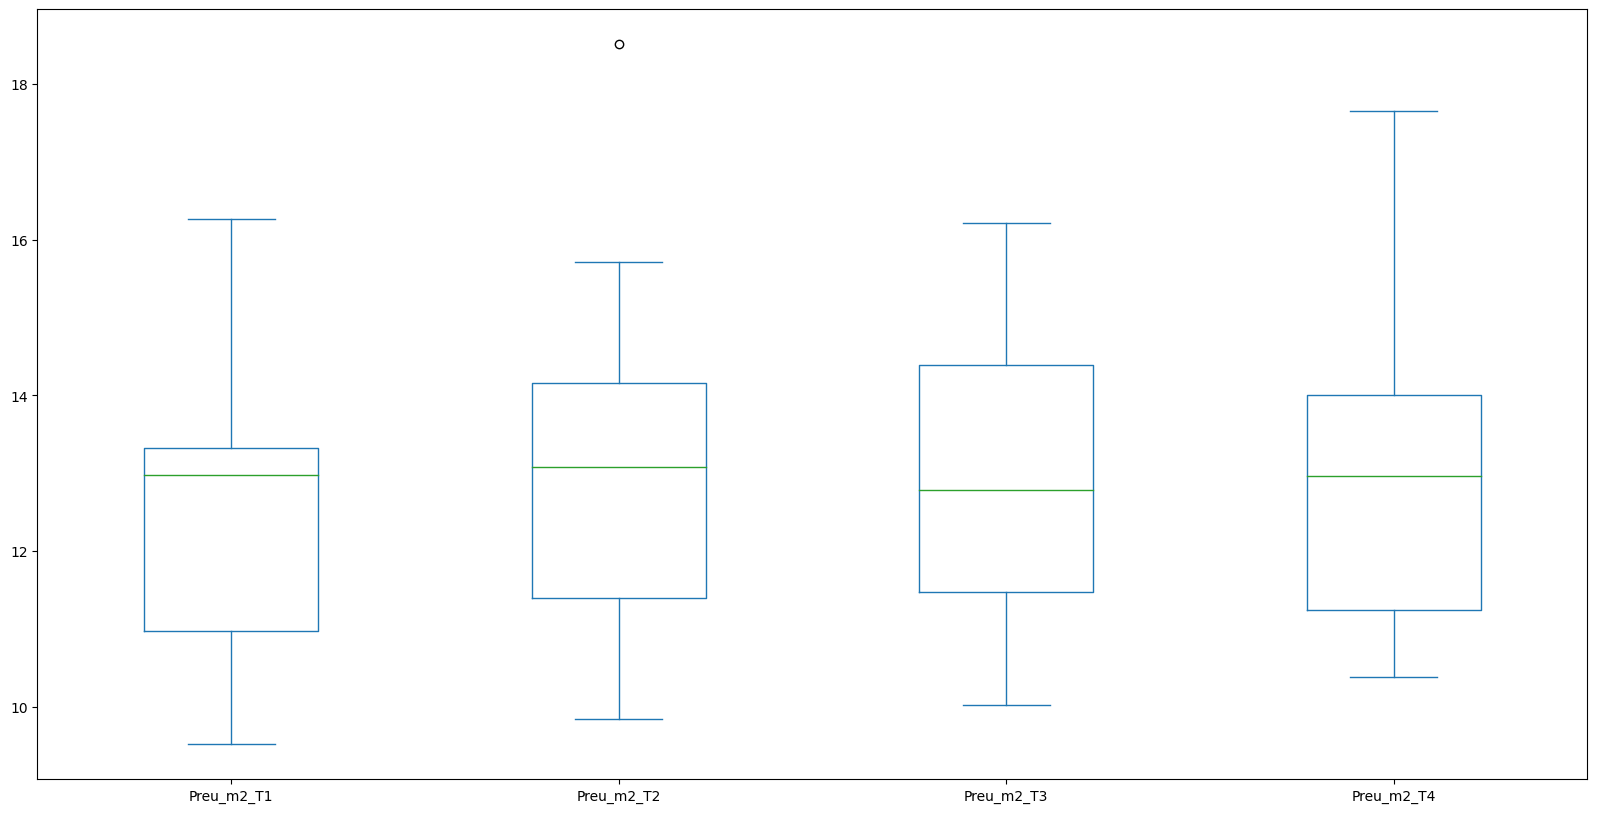

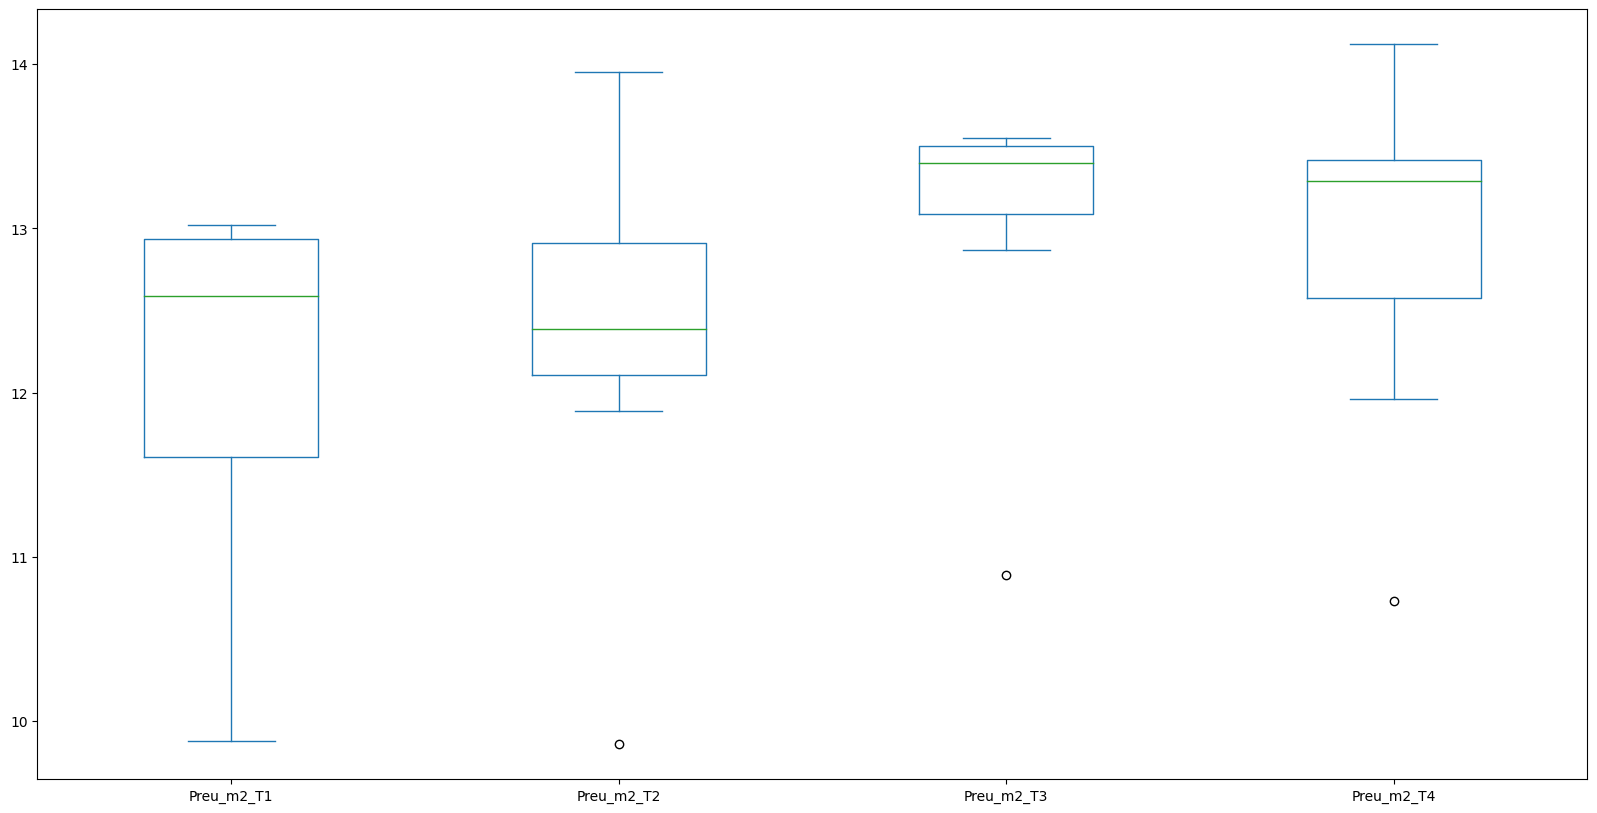

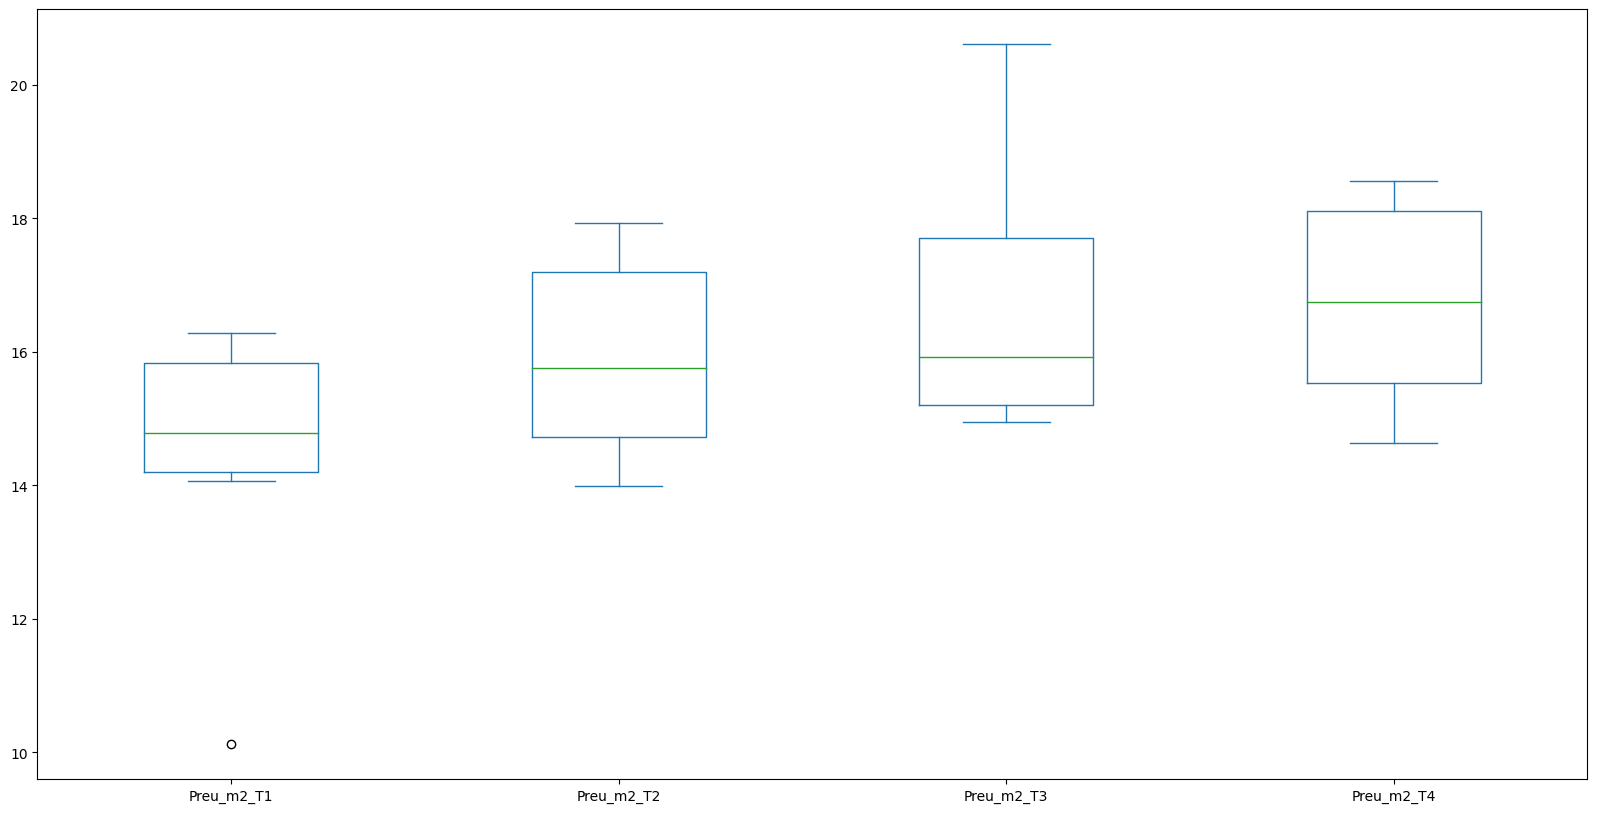

In [22]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 20, 10


for dist in llogdf_pivot.index.get_level_values(0).unique():
    llogdf_pivot.loc[dist, "Preu_T1":"Preu_T4"].plot(kind="box")

for dist in llogdf_pivot.index.get_level_values(0).unique():
    llogdf_pivot.loc[dist, "Preu_m2_T1":"Preu_m2_T4"].plot(kind="box")
    


We see some extreme values, buth nothing too extreme for it to be considered an outlier. We will not treat this data, as we cannot be sure that it is wrong.

#### Data normalization

As the last step in the preparation of the data, we will normalize the data, so that we preu and preu_per_m2 have the same weight in the analysis.

In [23]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(llogdf_pivot)

# create a new DataFrame with the scaled data, as the final step of the preprocessing
llogdf_prep= pd.DataFrame(scaled_data, columns=llogdf_pivot.columns, index=llogdf_pivot.index)

In [24]:
llogdf_prep.head()

Trimestre                                             Preu_T1   Preu_T2   
Nom_Districte Nom_Barri                                                   
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera  0.354949  0.480243  \
              el Barri Gòtic                         0.395737  0.628802   
              el Raval                              -0.300161 -0.362905   
              la Barceloneta                        -0.350063 -0.269309   
Eixample      Sant Antoni                            0.280115  0.314809   

Trimestre                                             Preu_T3   Preu_T4   
Nom_Districte Nom_Barri                                                   
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera  0.273846  0.297303  \
              el Barri Gòtic                         0.658500  0.616825   
              el Raval                              -0.342293 -0.265468   
              la Barceloneta                        -0.367613 -0.309087   
Eixample      Sant Antoni                            0.256004  0.260818   

Trimestre                                            Preu_m2_T1  Preu_m2_T2   
Nom_Districte Nom_Barri                                                       
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera    1.211732    1.349137  \
              el Barri Gòtic                           0.827891    0.519006   
              el Raval                                 0.545526    0.485200   
              la Barceloneta                           3.175054    2.806561   
Eixample      Sant Antoni                              0.051386    0.147138   

Trimestre                                            Preu_m2_T3  Preu_m2_T4  
Nom_Districte Nom_Barri                                                      
Ciutat Vella  Sant Pere, Santa Caterina i la Ribera    1.295897    1.128098  
              el Barri Gòtic                           0.602851    0.618893  
              el Raval                                 0.418573    0.622967  
              la Barceloneta                           2.722049    3.030487  
Eixample      Sant Antoni                              0.094083    0.231898

With this, we finish the data reorganization and treatment.

### Join with second dataset

The second dataset is a list of the different kind of noise pollution of each district and neighborhood. We will join it with the previous one.

In [25]:
nopolldf = pd.read_csv('2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv')
nopolldf.head()

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%


In [26]:
nopolldf.shape

(18980, 7)

We observe that this is a much bigger dataset, caused by the nature of the data. We will do some preprocessing to make it easier to use and join it with the previous one. We will start by getting rid of the columns that we will not use and putting all the data for a given neighborhood in the same row, similar to what we did before.

In [27]:
# Remove the columns "Codi_Districte" and "Codi_Barri"
nopolldf.drop(["Codi_Districte", "Codi_Barri"], axis=1, inplace=True)

In [28]:
# Get the unique values of "Concepte"
concepts = nopolldf["Concepte"].unique()

df_array = []

# split the DataFrame by "Concepte"
for concept in concepts:
    temp = nopolldf.loc[nopolldf["Concepte"] == concept].copy()
    temp.columns = ["Nom_Districte", "Nom_Barri", "Concept", "Rang_soroll", concept]
    temp.drop(["Concept"], axis=1, inplace=True)  
    df_array.append(temp)

nopolldf_reshaped = df_array[0]

# merge the DataFrames
for i in range(1, len(df_array)):
    nopolldf_reshaped = pd.merge(nopolldf_reshaped, df_array[i], how = "inner", on= ["Nom_Barri", "Nom_Districte", "Rang_soroll"], suffixes=("", "_y"))    


nopolldf_reshaped.head()
    

,Nom_Districte,Nom_Barri,Rang_soroll,TOTAL_D,TOTAL_E,TOTAL_N,TOTAL_DEN,TRANSIT_D,TRANSIT_E,TRANSIT_N,...,INDUST_D,INDUST_E,INDUST_N,INDUST_DEN,VIANANTS_D,VIANANTS_E,OCI_N,PATIS_D,PATIS_E,PARCS_D
0,Ciutat Vella,el Raval,<40 dB,7.73%,21.45%,42.75%,0.27%,11.30%,25.92%,46.18%,...,100.00%,100.00%,100.00%,100.00%,57.69%,59.13%,75.89%,95.90%,98.00%,100.00%
1,Ciutat Vella,el Raval,40-45 dB,26.98%,19.18%,6.63%,28.36%,31.11%,20.05%,6.58%,...,0.00%,0.00%,0.00%,0.00%,13.35%,16.80%,4.97%,0.00%,0.00%,0.00%
2,Ciutat Vella,el Raval,45-50 dB,7.38%,5.68%,10.88%,11.97%,6.78%,6.37%,14.40%,...,0.00%,0.00%,0.00%,0.00%,10.90%,9.04%,2.53%,0.00%,0.00%,0.00%
3,Ciutat Vella,el Raval,50-55 dB,11.97%,13.28%,14.29%,7.95%,10.75%,14.22%,17.08%,...,0.00%,0.00%,0.00%,0.00%,10.81%,8.03%,1.80%,1.65%,0.00%,0.00%
4,Ciutat Vella,el Raval,55-60 dB,19.85%,19.74%,10.52%,15.40%,18.61%,17.17%,9.28%,...,0.00%,0.00%,0.00%,0.00%,6.47%,6.02%,5.79%,1.56%,1.11%,0.00%


In [29]:
#multiindex based on "Nom_Districte" and "Nom_Barri"
nopolldf_reshaped.set_index(["Nom_Districte", "Nom_Barri"], inplace=True)

In [30]:
nopolldf_reshaped.head()

Rang_soroll TOTAL_D TOTAL_E TOTAL_N TOTAL_DEN   
Nom_Districte Nom_Barri                                                 
Ciutat Vella  el Raval       <40 dB   7.73%  21.45%  42.75%     0.27%  \
              el Raval     40-45 dB  26.98%  19.18%   6.63%    28.36%   
              el Raval     45-50 dB   7.38%   5.68%  10.88%    11.97%   
              el Raval     50-55 dB  11.97%  13.28%  14.29%     7.95%   
              el Raval     55-60 dB  19.85%  19.74%  10.52%    15.40%   

                        TRANSIT_D TRANSIT_E TRANSIT_N TRANSIT_DEN GI_TR_D   
Nom_Districte Nom_Barri                                                     
Ciutat Vella  el Raval     11.30%    25.92%    46.18%       2.74%  87.87%  \
              el Raval     31.11%    20.05%     6.58%      34.91%   6.57%   
              el Raval      6.78%     6.37%    14.40%       9.79%   1.68%   
              el Raval     10.75%    14.22%    17.08%       9.32%   1.04%   
              el Raval     18.61%    17.17%     9.28%      15.96%   0.67%   

                         ... INDUST_D INDUST_E INDUST_N INDUST_DEN VIANANTS_D   
Nom_Districte Nom_Barri  ...                                                    
Ciutat Vella  el Raval   ...  100.00%  100.00%  100.00%    100.00%     57.69%  \
              el Raval   ...    0.00%    0.00%    0.00%      0.00%     13.35%   
              el Raval   ...    0.00%    0.00%    0.00%      0.00%     10.90%   
              el Raval   ...    0.00%    0.00%    0.00%      0.00%     10.81%   
              el Raval   ...    0.00%    0.00%    0.00%      0.00%      6.47%   

                        VIANANTS_E   OCI_N PATIS_D PATIS_E  PARCS_D  
Nom_Districte Nom_Barri                                              
Ciutat Vella  el Raval      59.13%  75.89%  95.90%  98.00%  100.00%  
              el Raval      16.80%   4.97%   0.00%   0.00%    0.00%  
              el Raval       9.04%   2.53%   0.00%   0.00%    0.00%  
              el Raval       8.03%   1.80%   1.65%   0.00%    0.00%  
              el Raval       6.02%   5.79%   1.56%   1.11%    0.00%  

[5 rows x 27 columns]

Perfect!! Now we should merge the two datasets, but first let's do a couple of things. Firstly, we will check if there are any NaN values.

In [31]:
nopolldf_reshaped.isna().sum().sum()

0

Seems we are lucky. Now, we will change the type of the columns from object to float, so that we can use them in the analysis.

In [32]:
# convert from string to float
for column in nopolldf_reshaped.columns:
    if column != "Rang_soroll":
        # gets rid of the % symbol and converts to float. Also, pass from 0-100 to 0-1
        nopolldf_reshaped[column] = nopolldf_reshaped[column].apply(lambda x: float(x[:-1])/100)

In [33]:
nopolldf_reshaped.head()

Rang_soroll  TOTAL_D  TOTAL_E  TOTAL_N  TOTAL_DEN   
Nom_Districte Nom_Barri                                                     
Ciutat Vella  el Raval       <40 dB   0.0773   0.2145   0.4275     0.0027  \
              el Raval     40-45 dB   0.2698   0.1918   0.0663     0.2836   
              el Raval     45-50 dB   0.0738   0.0568   0.1088     0.1197   
              el Raval     50-55 dB   0.1197   0.1328   0.1429     0.0795   
              el Raval     55-60 dB   0.1985   0.1974   0.1052     0.1540   

                         TRANSIT_D  TRANSIT_E  TRANSIT_N  TRANSIT_DEN   
Nom_Districte Nom_Barri                                                 
Ciutat Vella  el Raval      0.1130     0.2592     0.4618       0.0274  \
              el Raval      0.3111     0.2005     0.0658       0.3491   
              el Raval      0.0678     0.0637     0.1440       0.0979   
              el Raval      0.1075     0.1422     0.1708       0.0932   
              el Raval      0.1861     0.1717     0.0928       0.1596   

                         GI_TR_D  ...  INDUST_D  INDUST_E  INDUST_N   
Nom_Districte Nom_Barri           ...                                 
Ciutat Vella  el Raval    0.8787  ...       1.0       1.0       1.0  \
              el Raval    0.0657  ...       0.0       0.0       0.0   
              el Raval    0.0168  ...       0.0       0.0       0.0   
              el Raval    0.0104  ...       0.0       0.0       0.0   
              el Raval    0.0067  ...       0.0       0.0       0.0   

                         INDUST_DEN  VIANANTS_D  VIANANTS_E   OCI_N  PATIS_D   
Nom_Districte Nom_Barri                                                        
Ciutat Vella  el Raval          1.0      0.5769      0.5913  0.7589   0.9590  \
              el Raval          0.0      0.1335      0.1680  0.0497   0.0000   
              el Raval          0.0      0.1090      0.0904  0.0253   0.0000   
              el Raval          0.0      0.1081      0.0803  0.0180   0.0165   
              el Raval          0.0      0.0647      0.0602  0.0579   0.0156   

                         PATIS_E  PARCS_D  
Nom_Districte Nom_Barri                    
Ciutat Vella  el Raval    0.9800      1.0  
              el Raval    0.0000      0.0  
              el Raval    0.0000      0.0  
              el Raval    0.0000      0.0  
              el Raval    0.0111      0.0  

[5 rows x 27 columns]

 Now, as a final step before merging, let's take a look at the data.

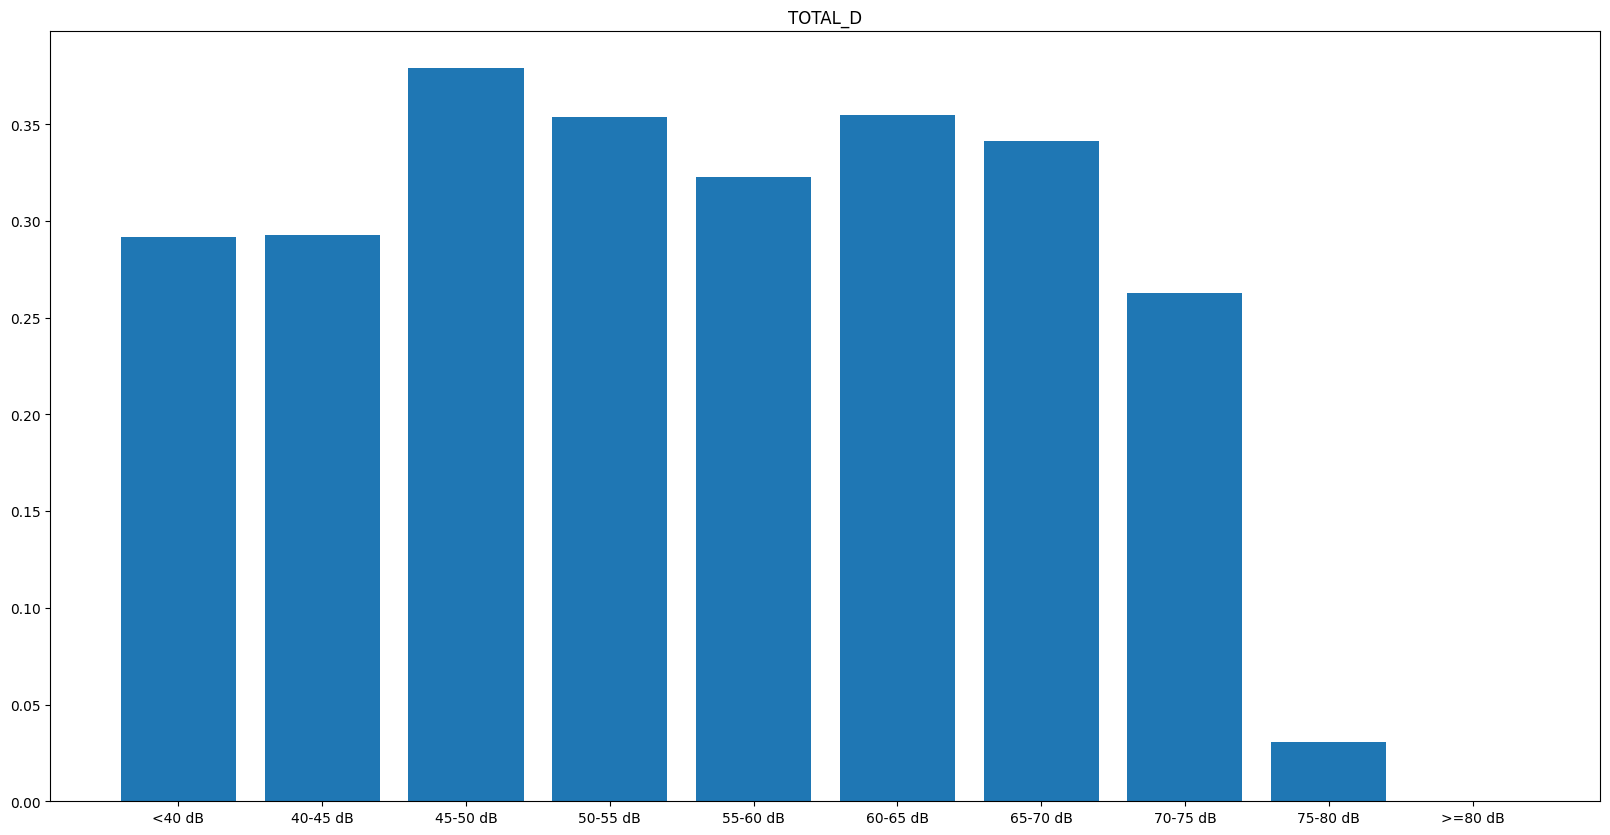

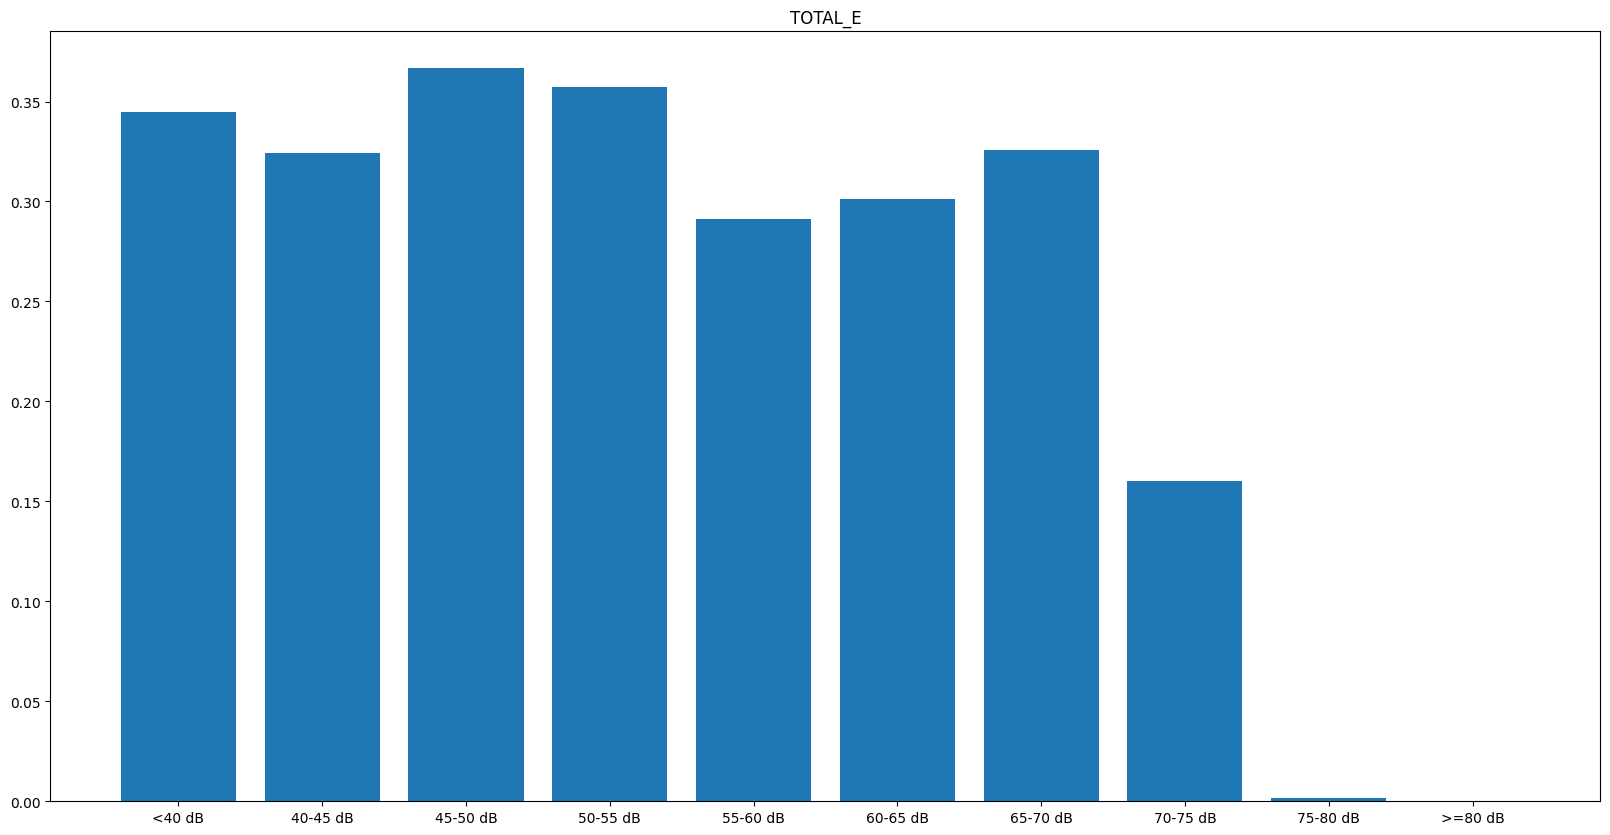

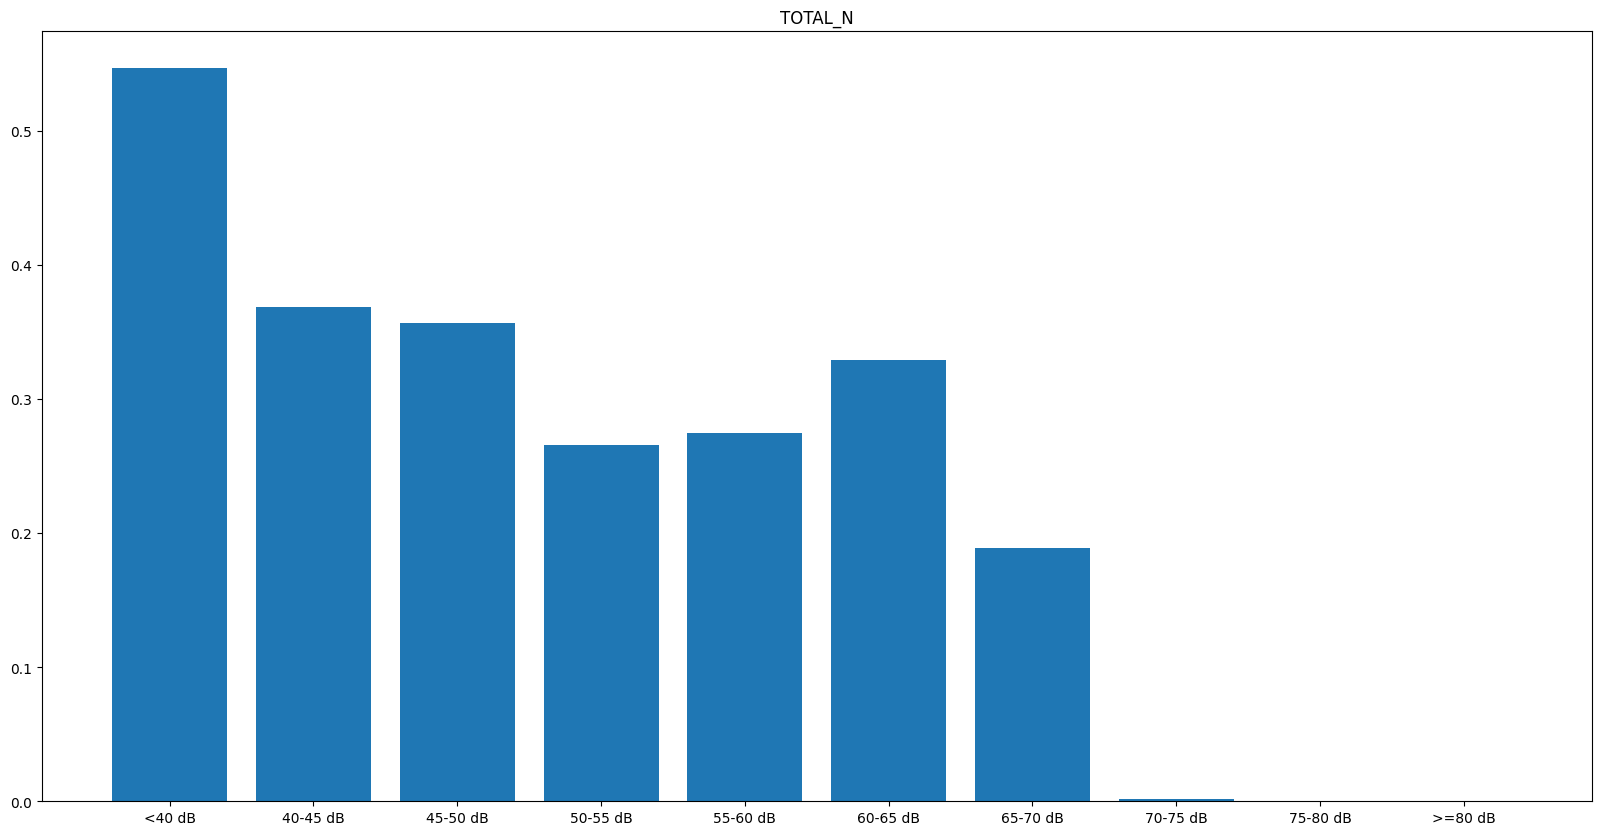

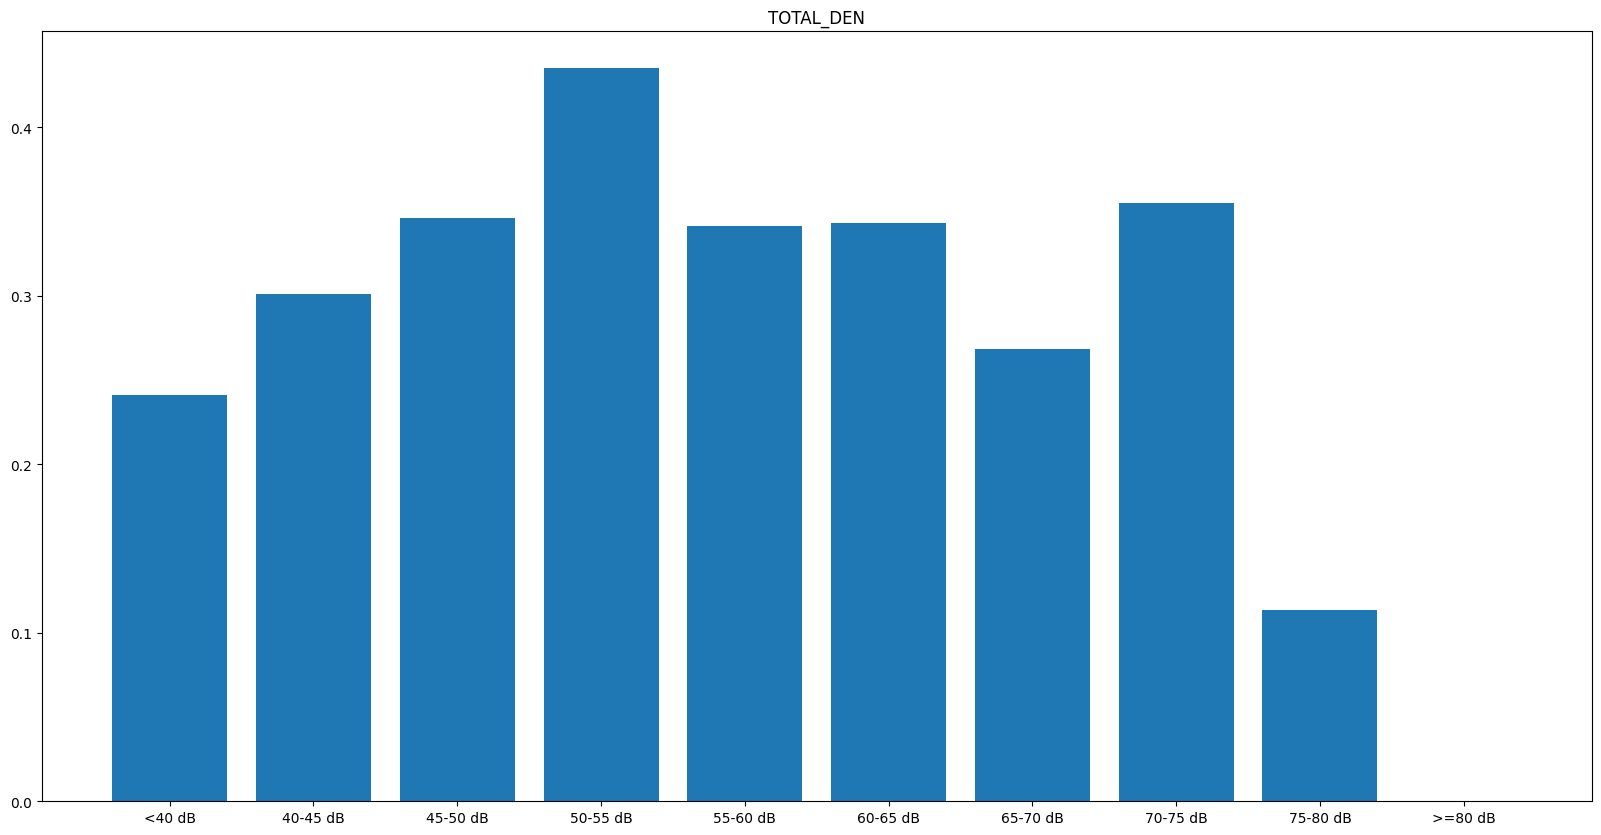

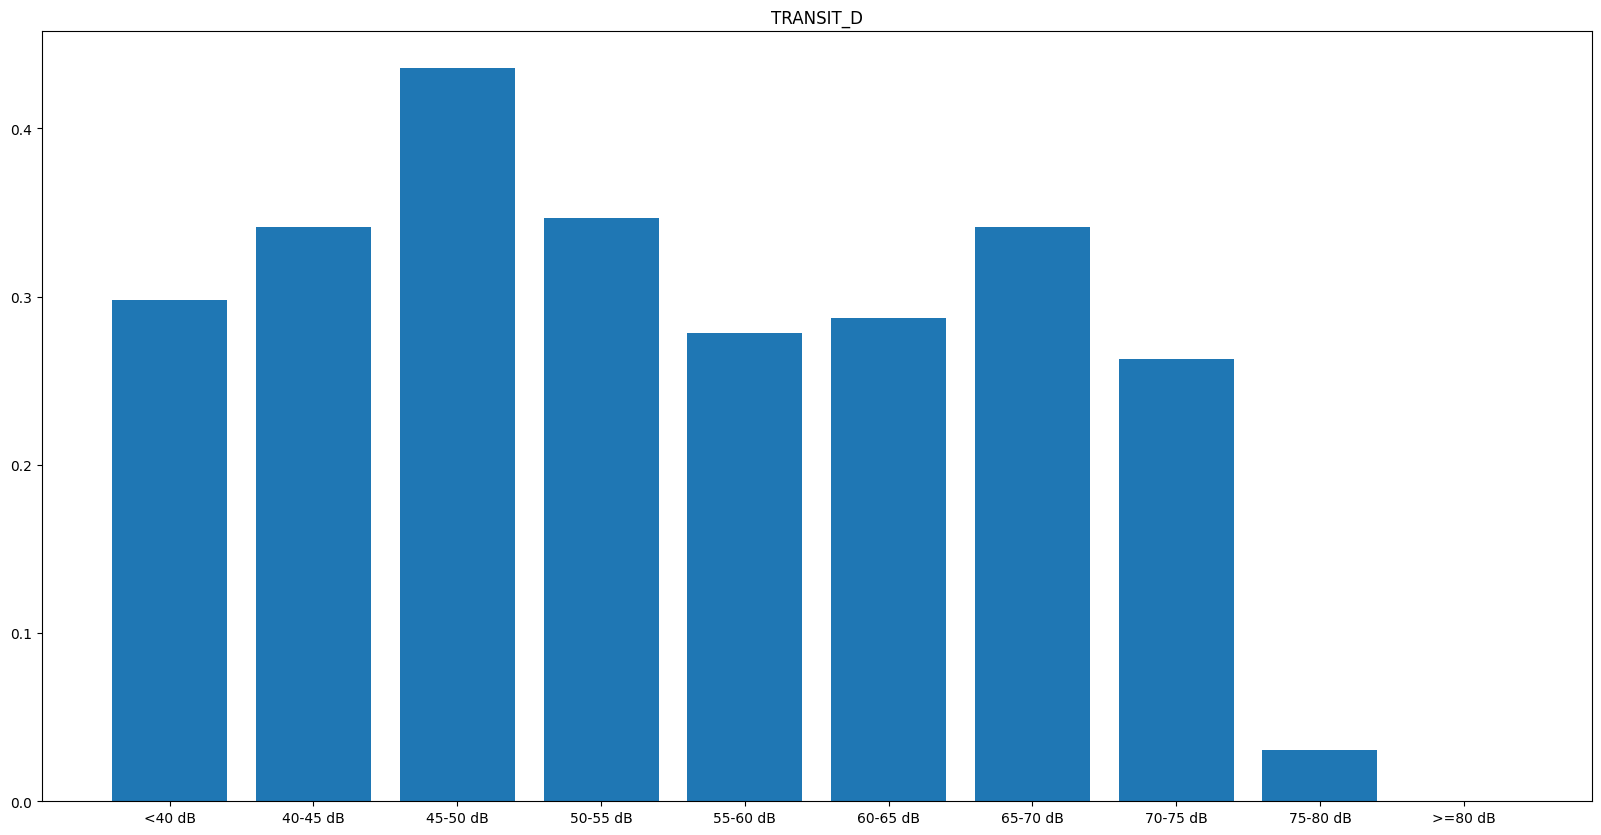

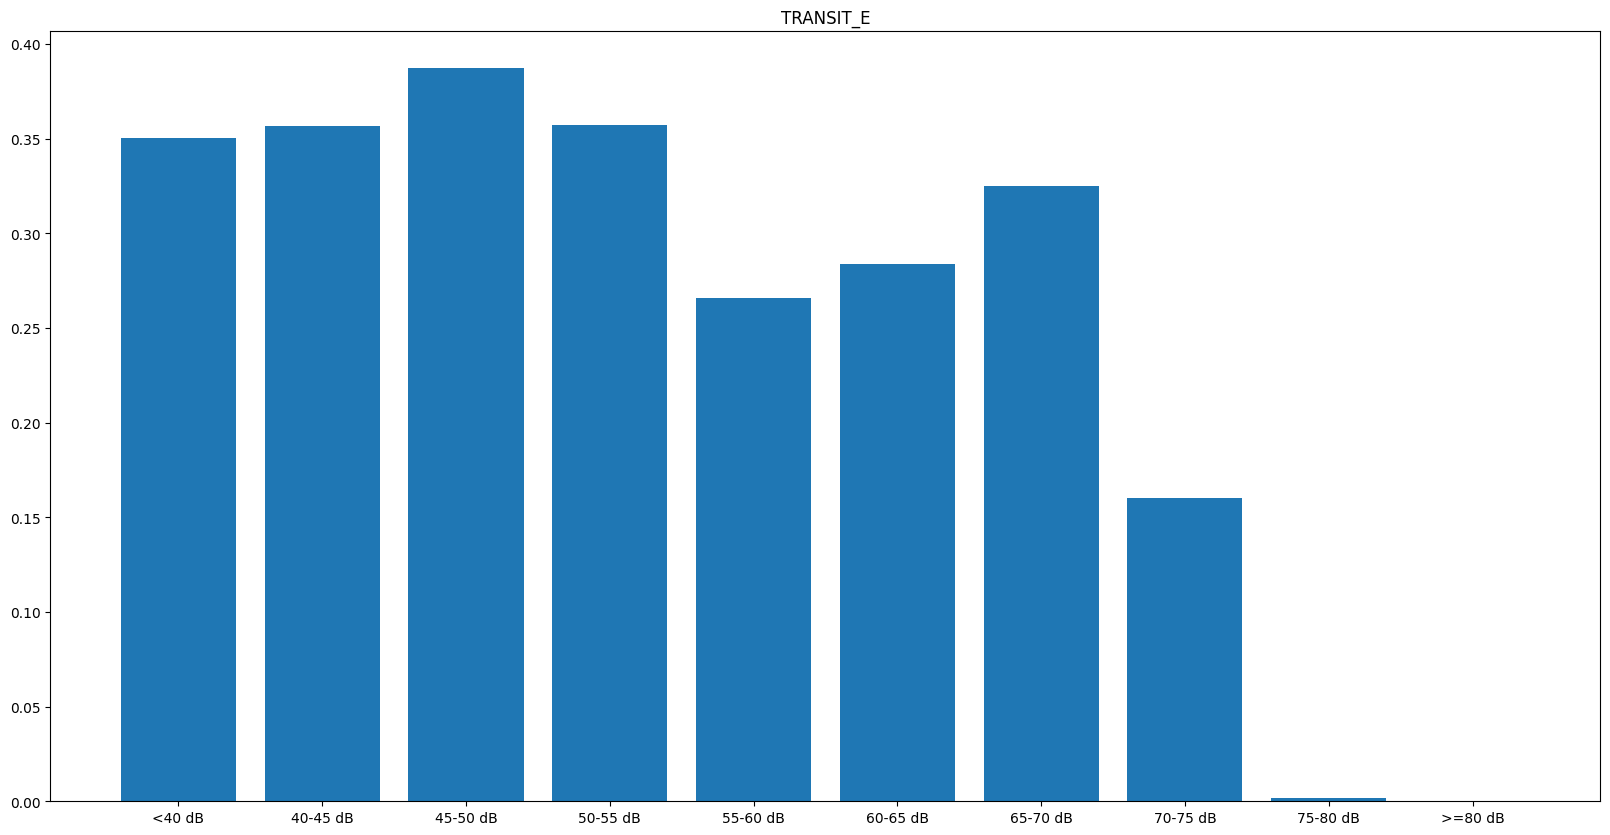

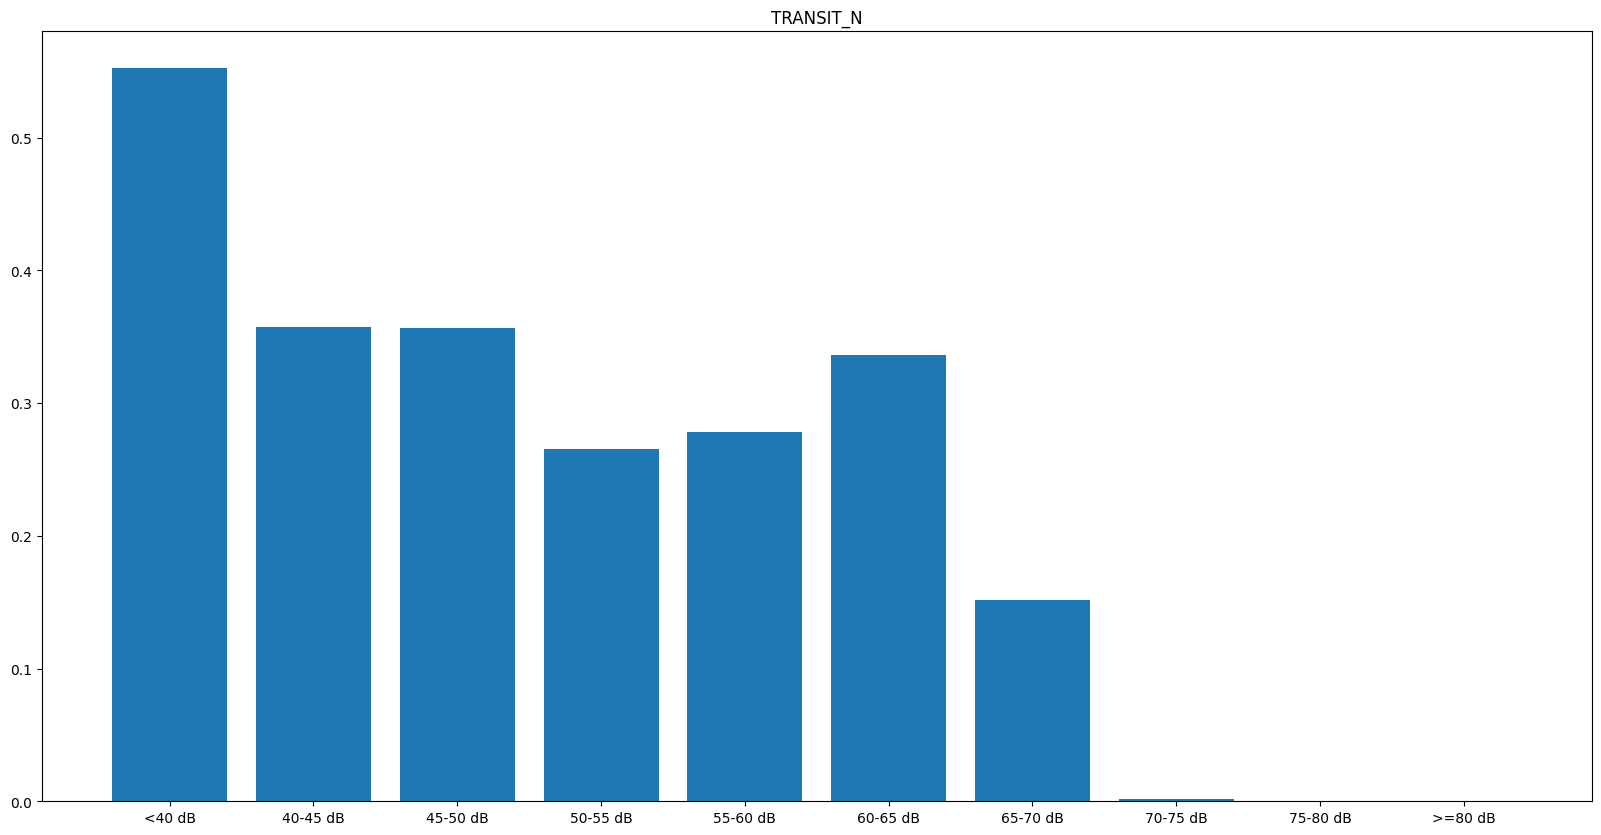

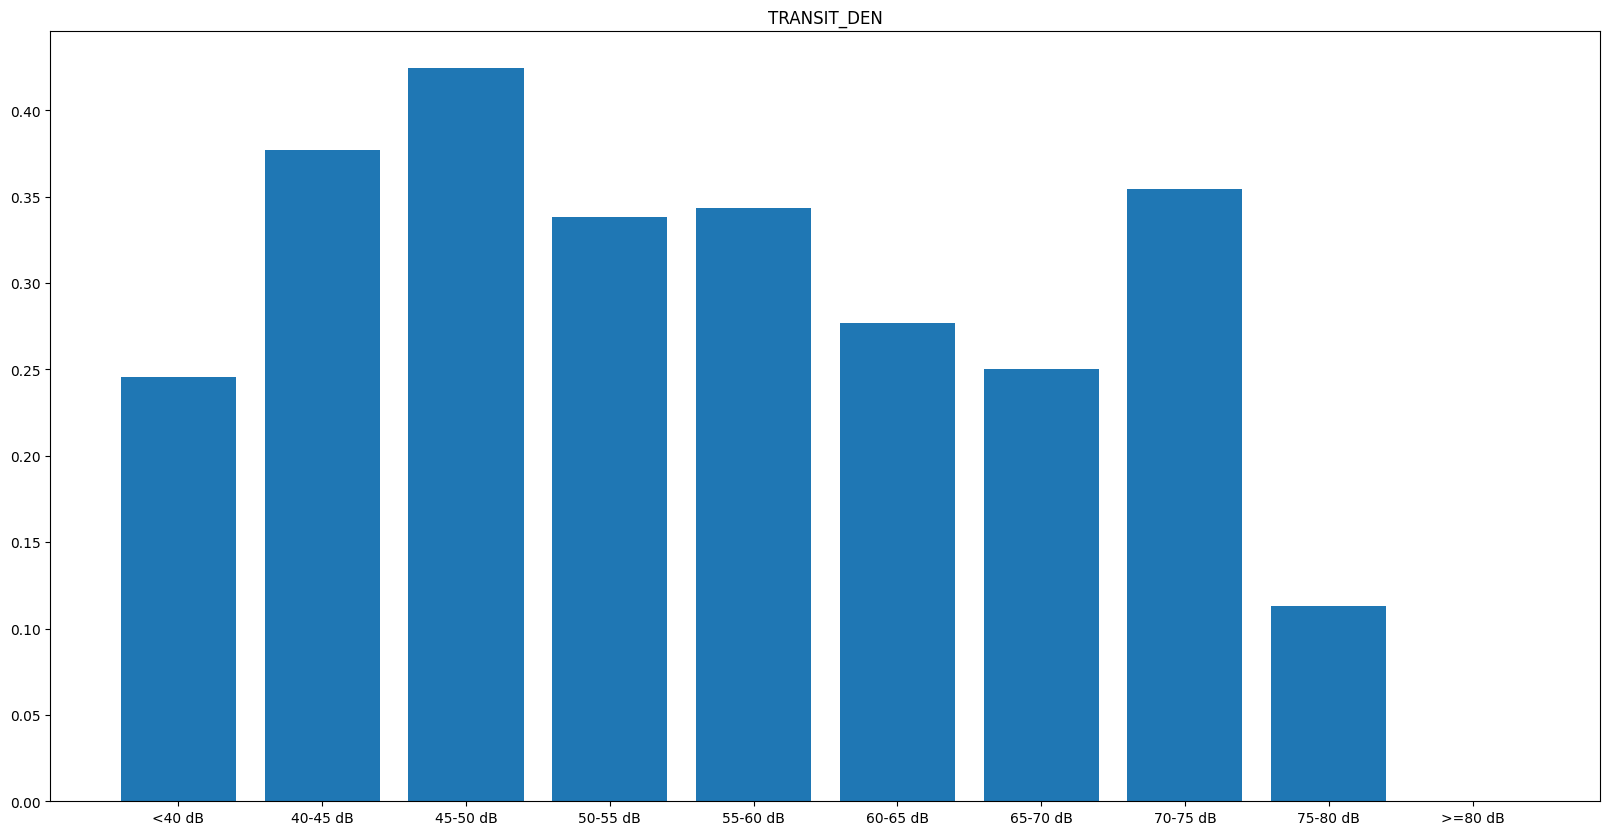

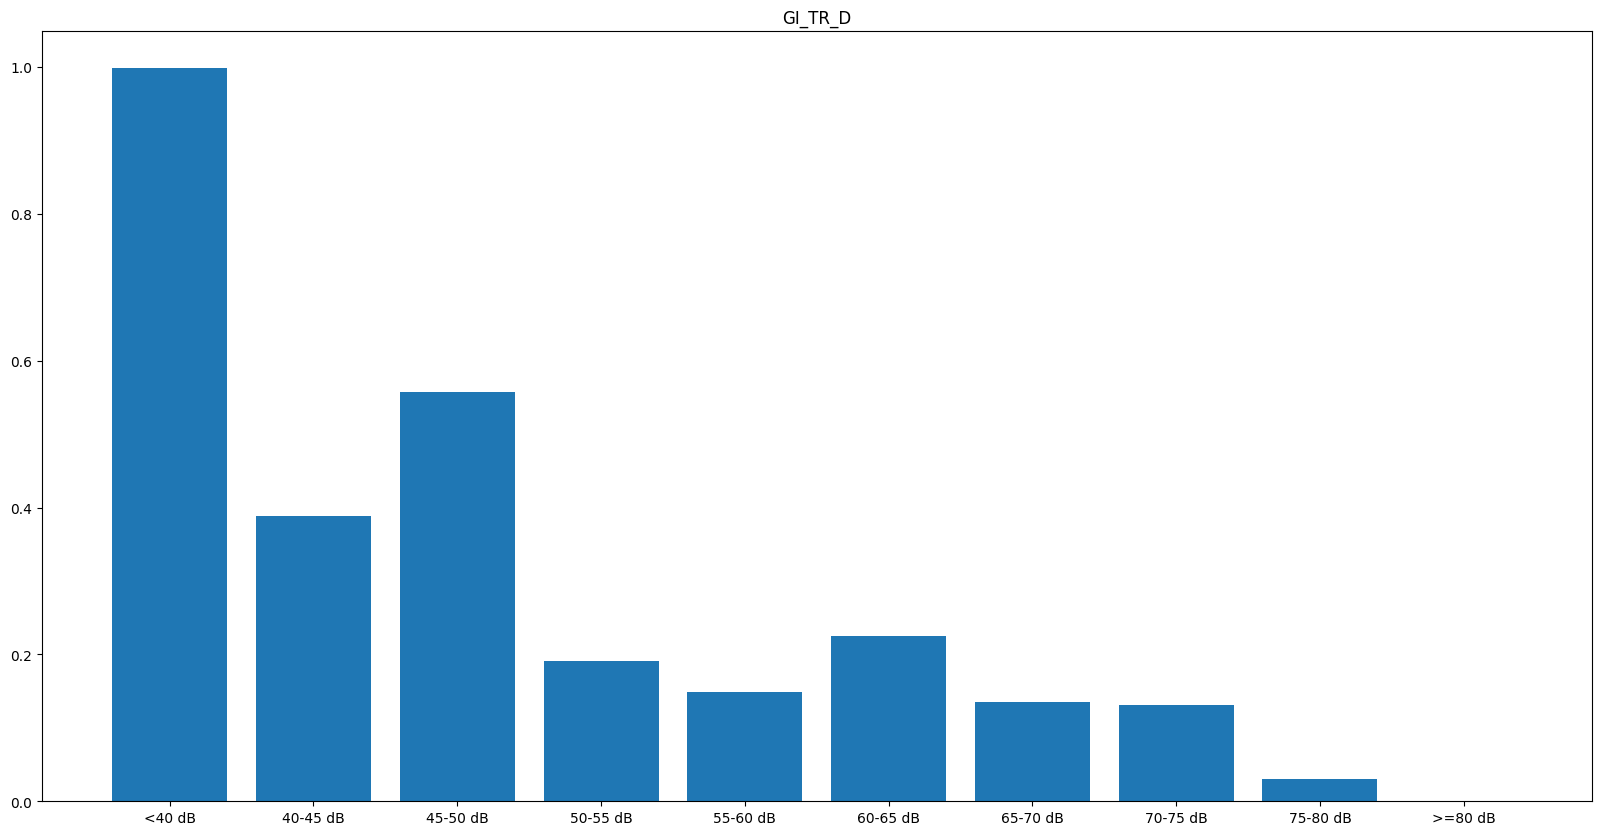

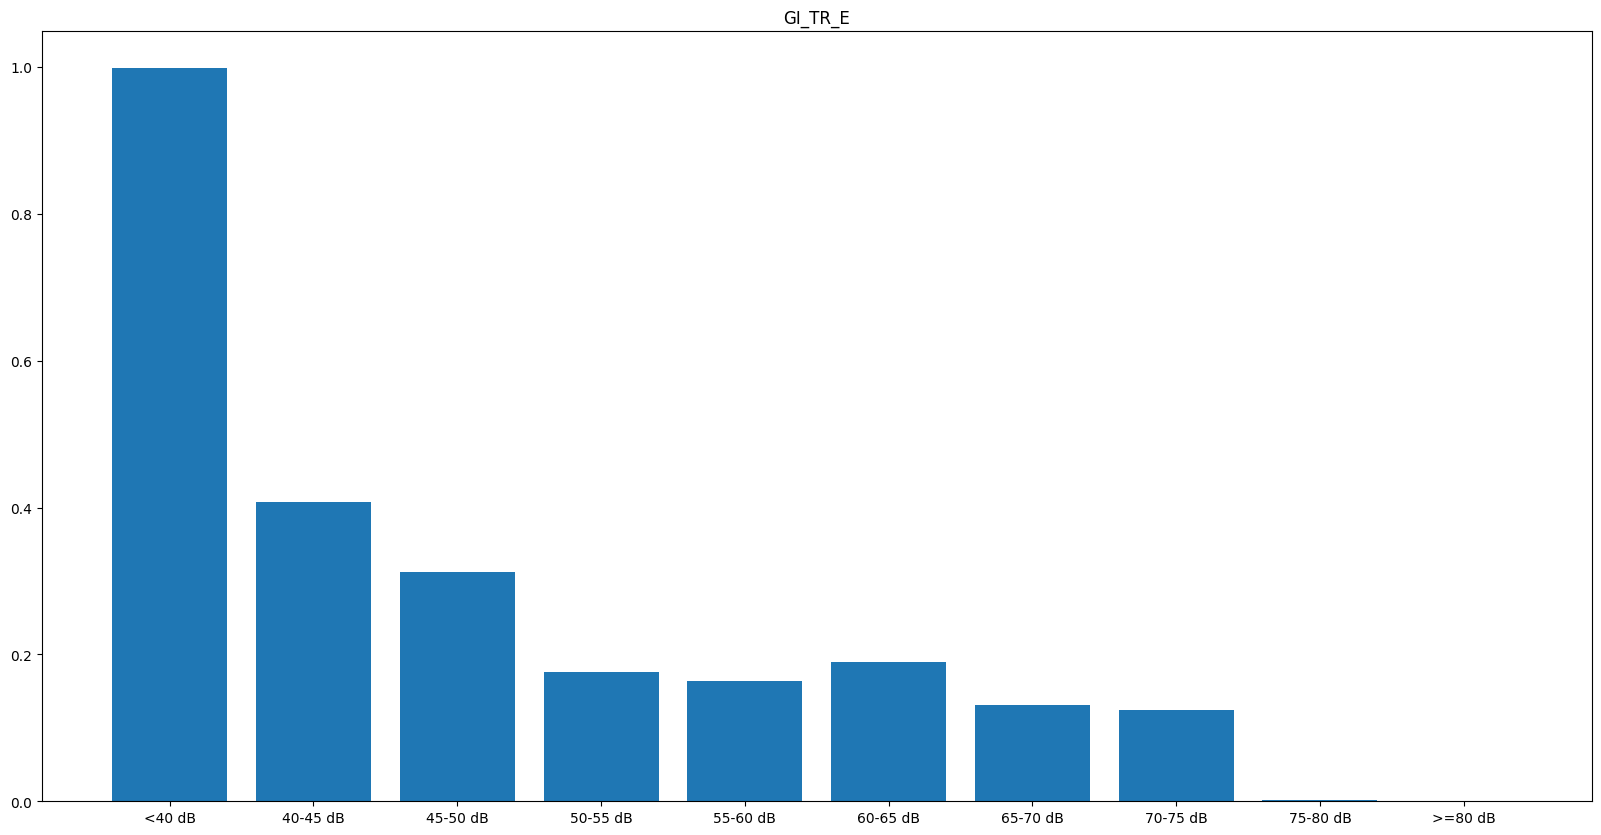

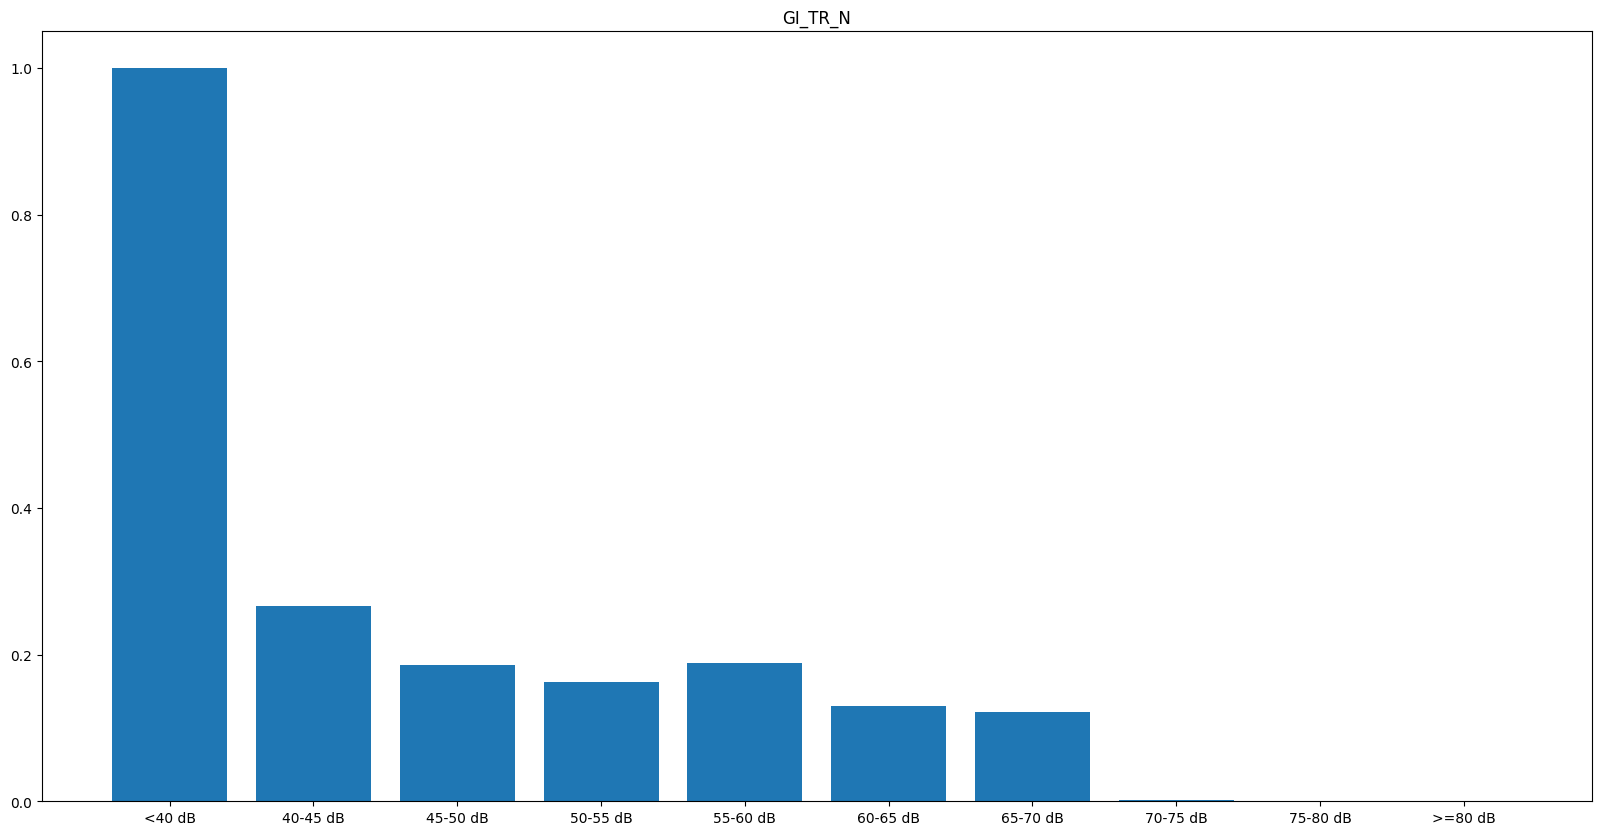

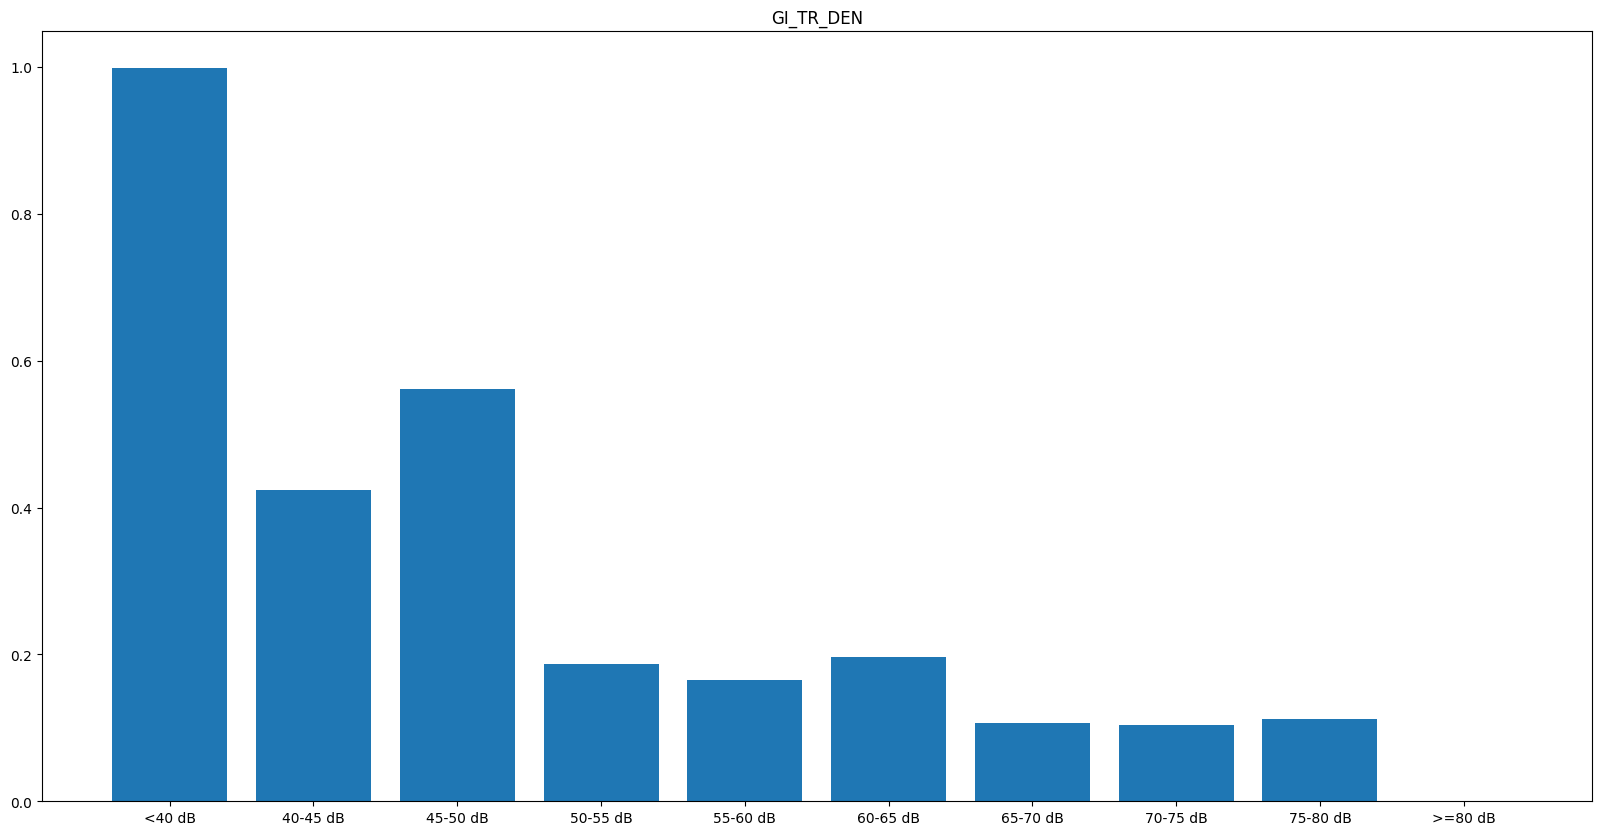

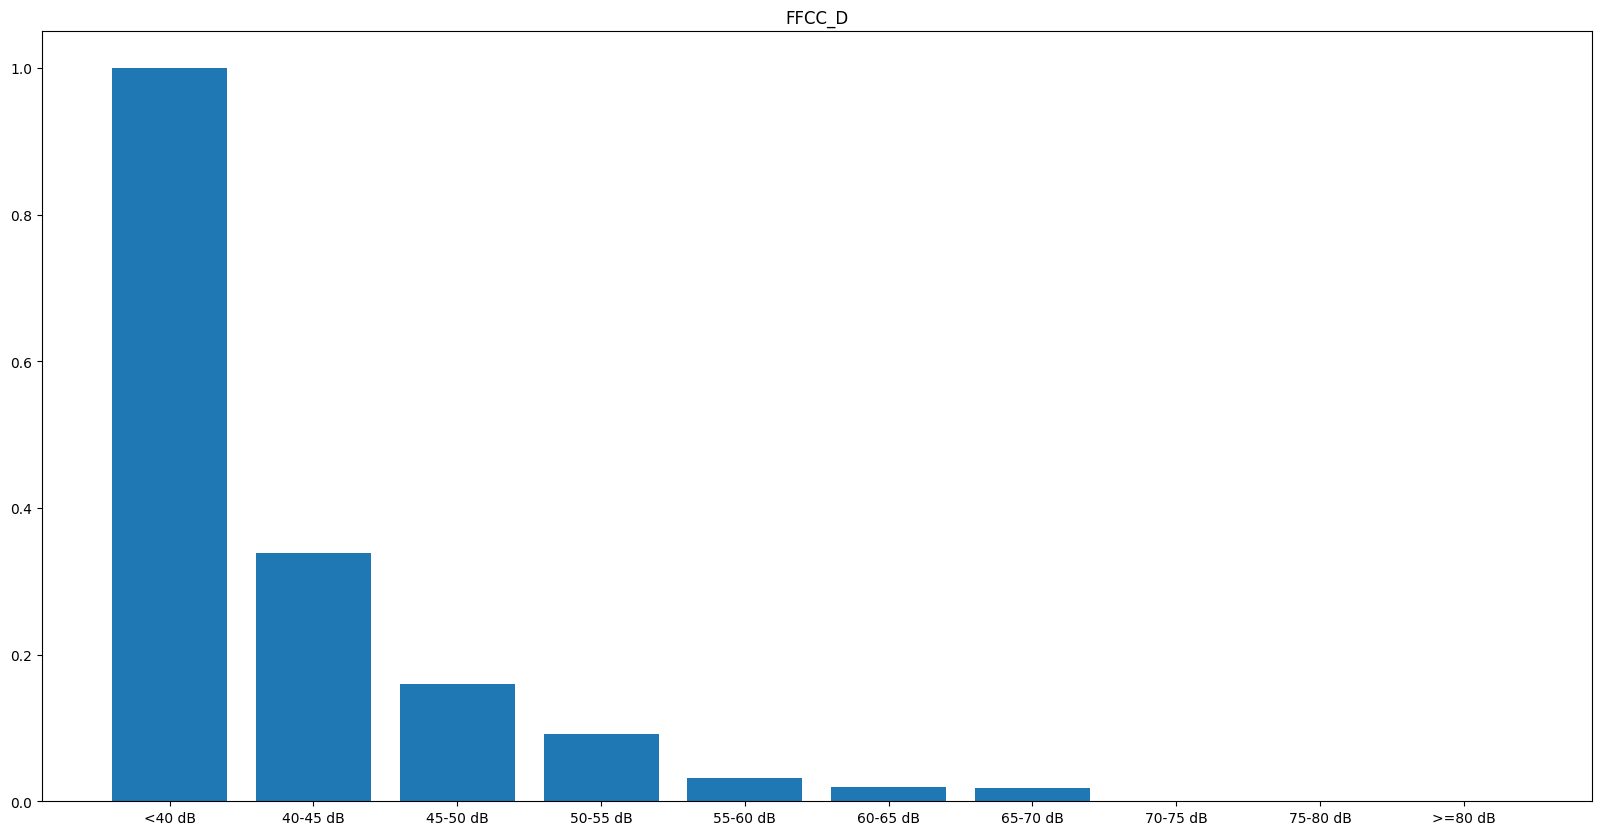

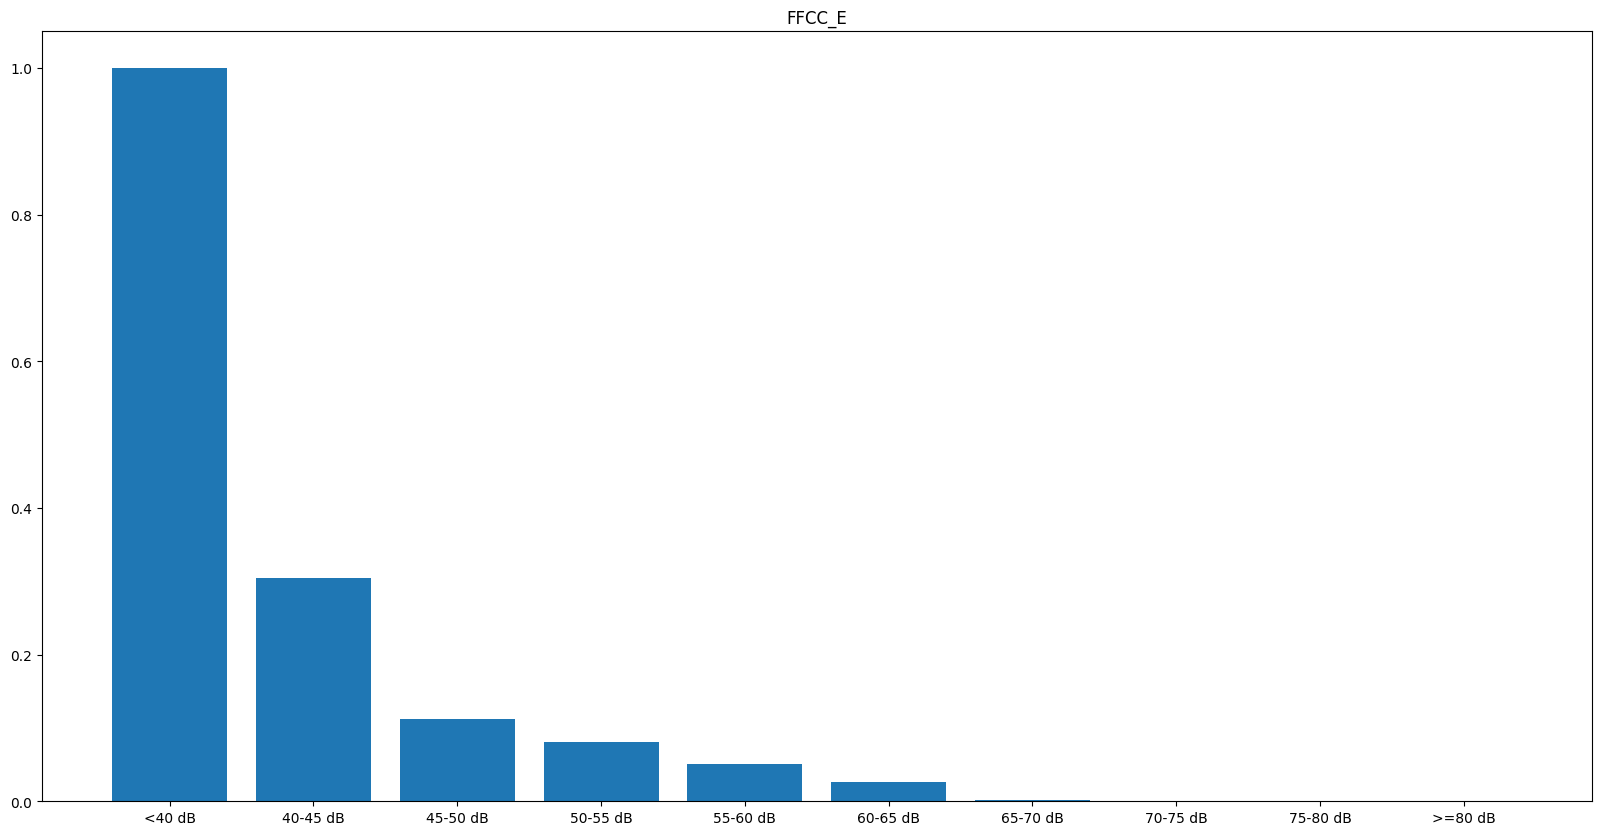

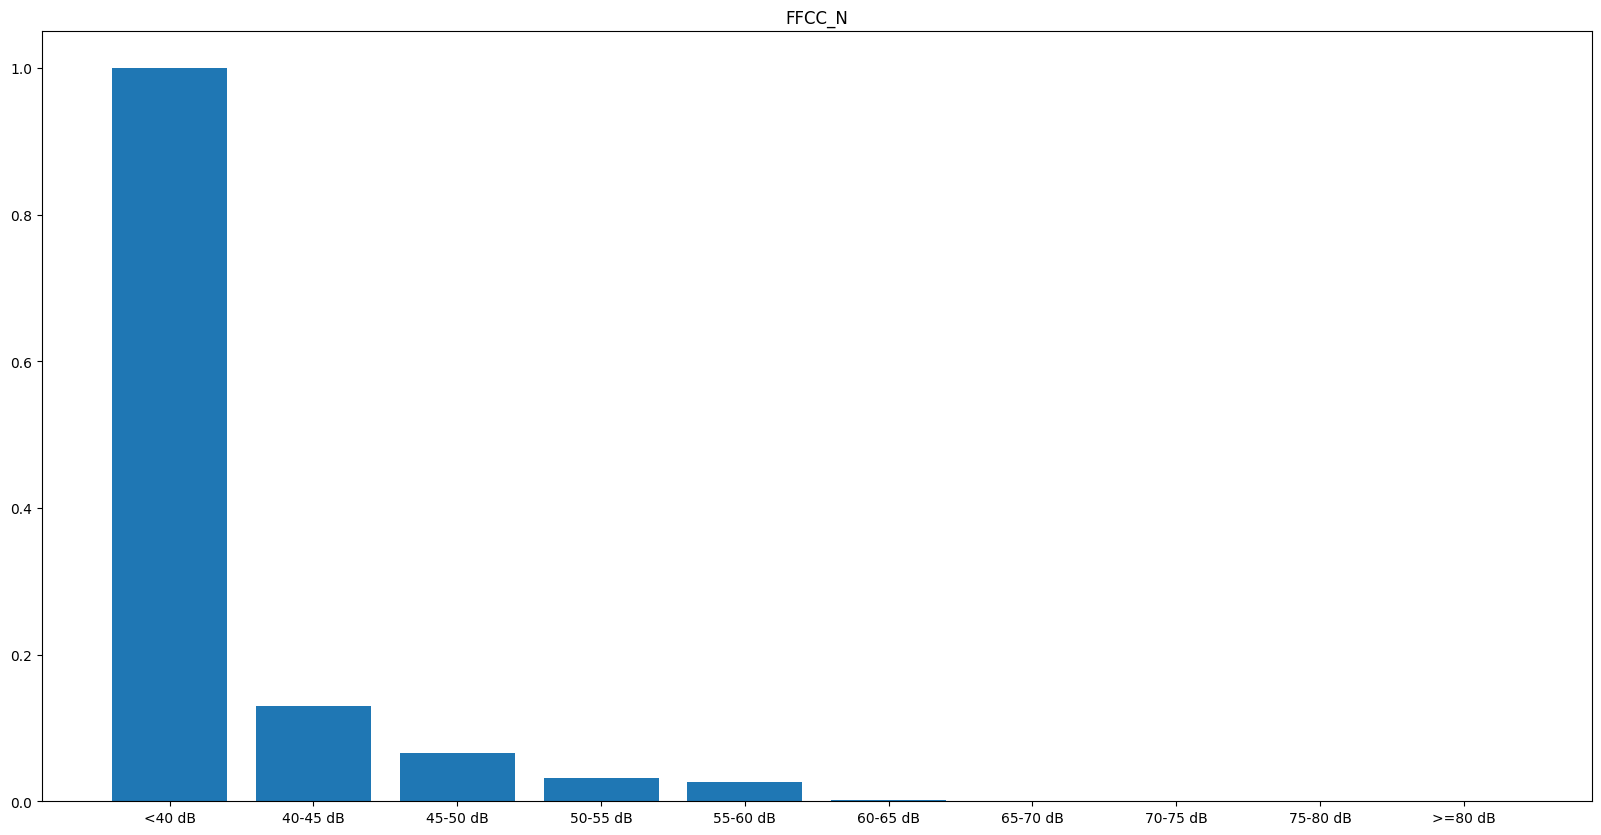

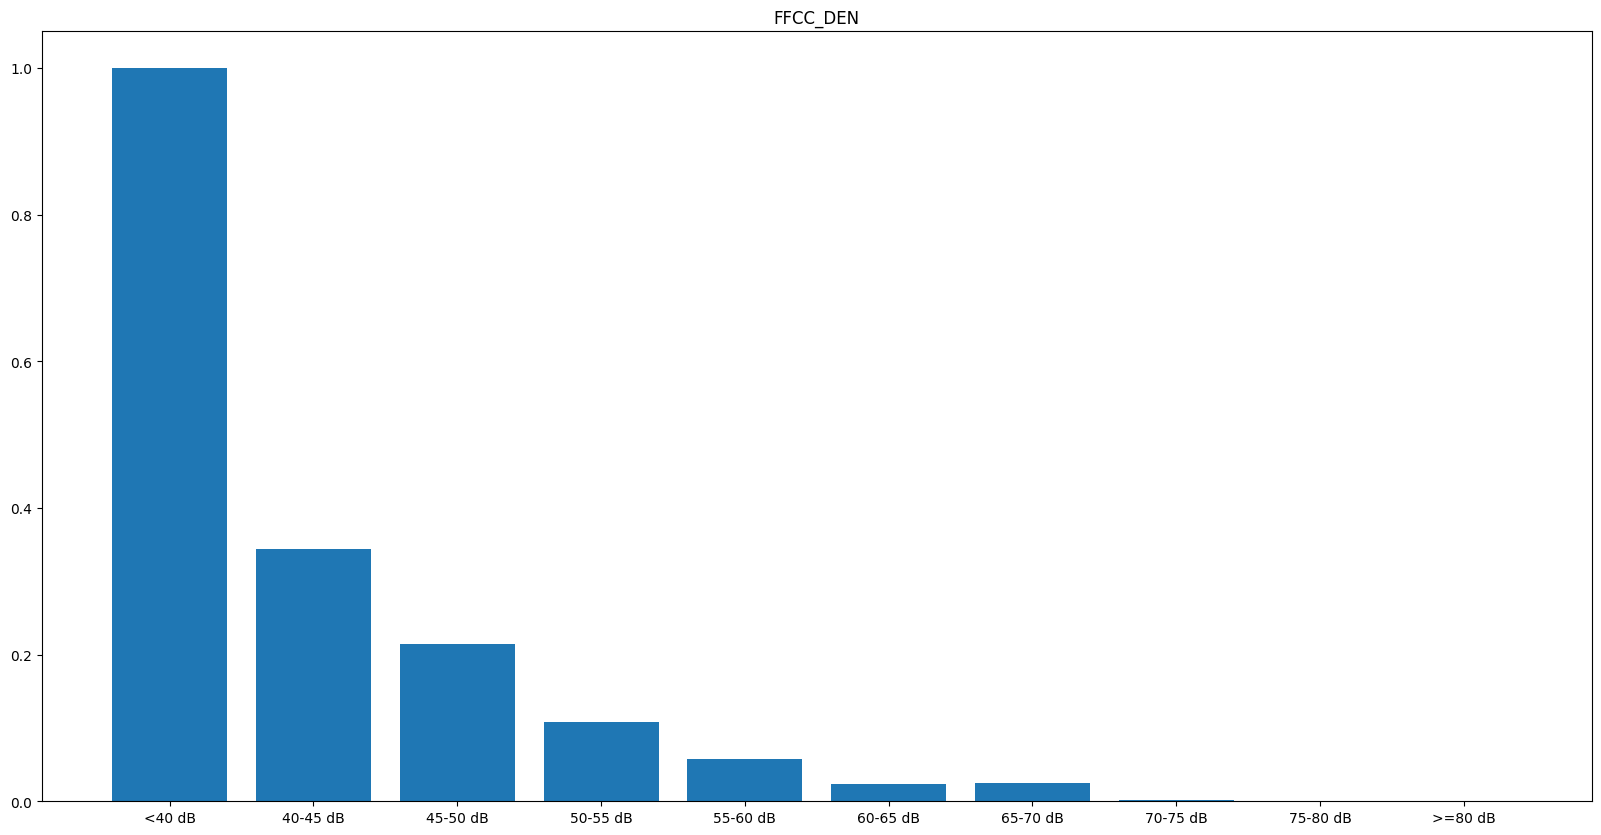

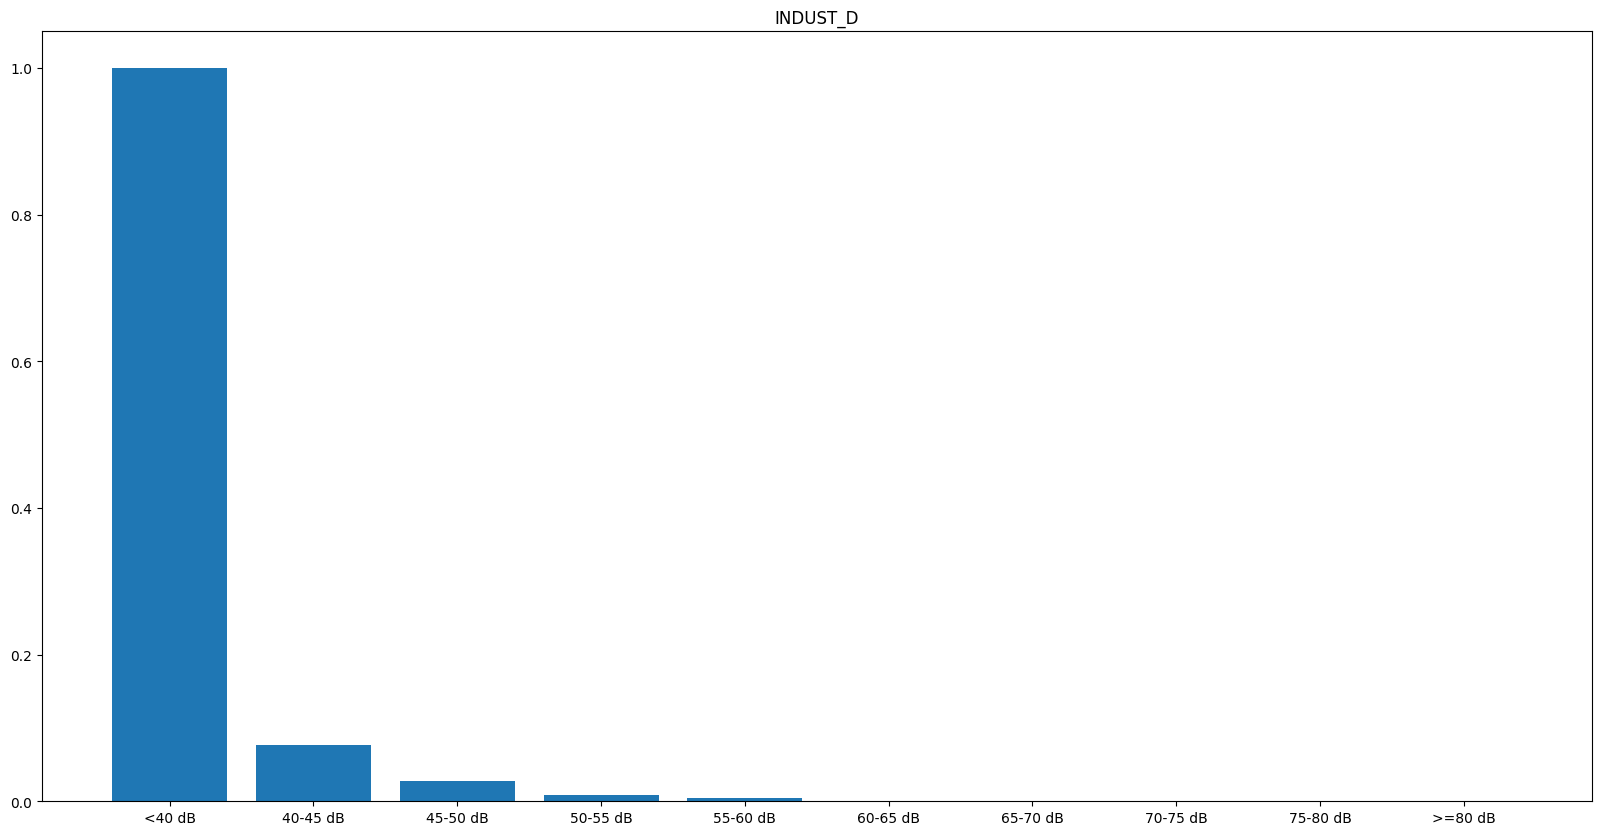

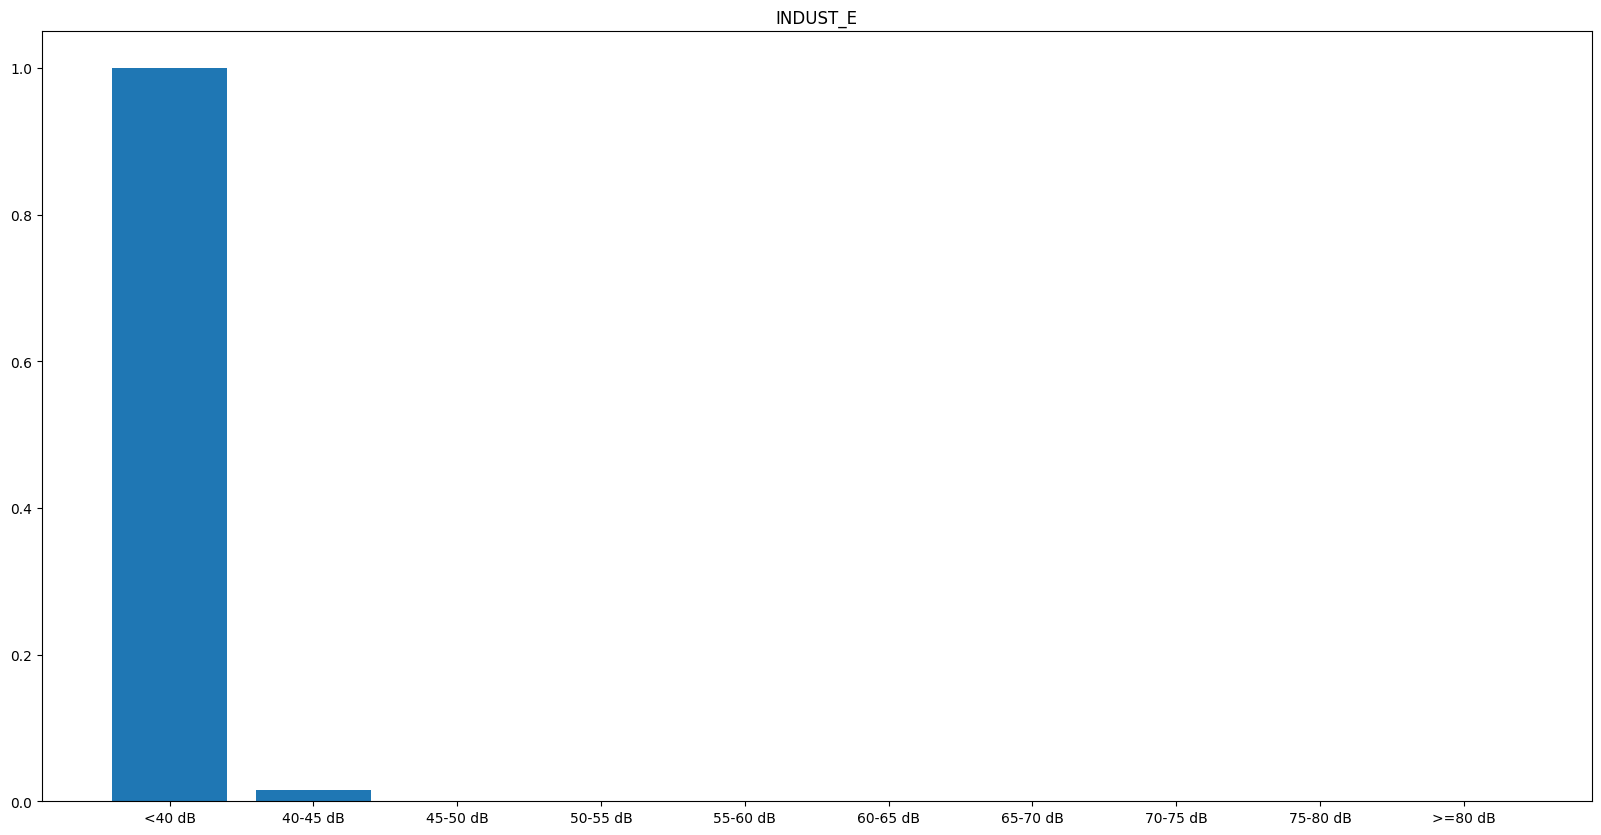

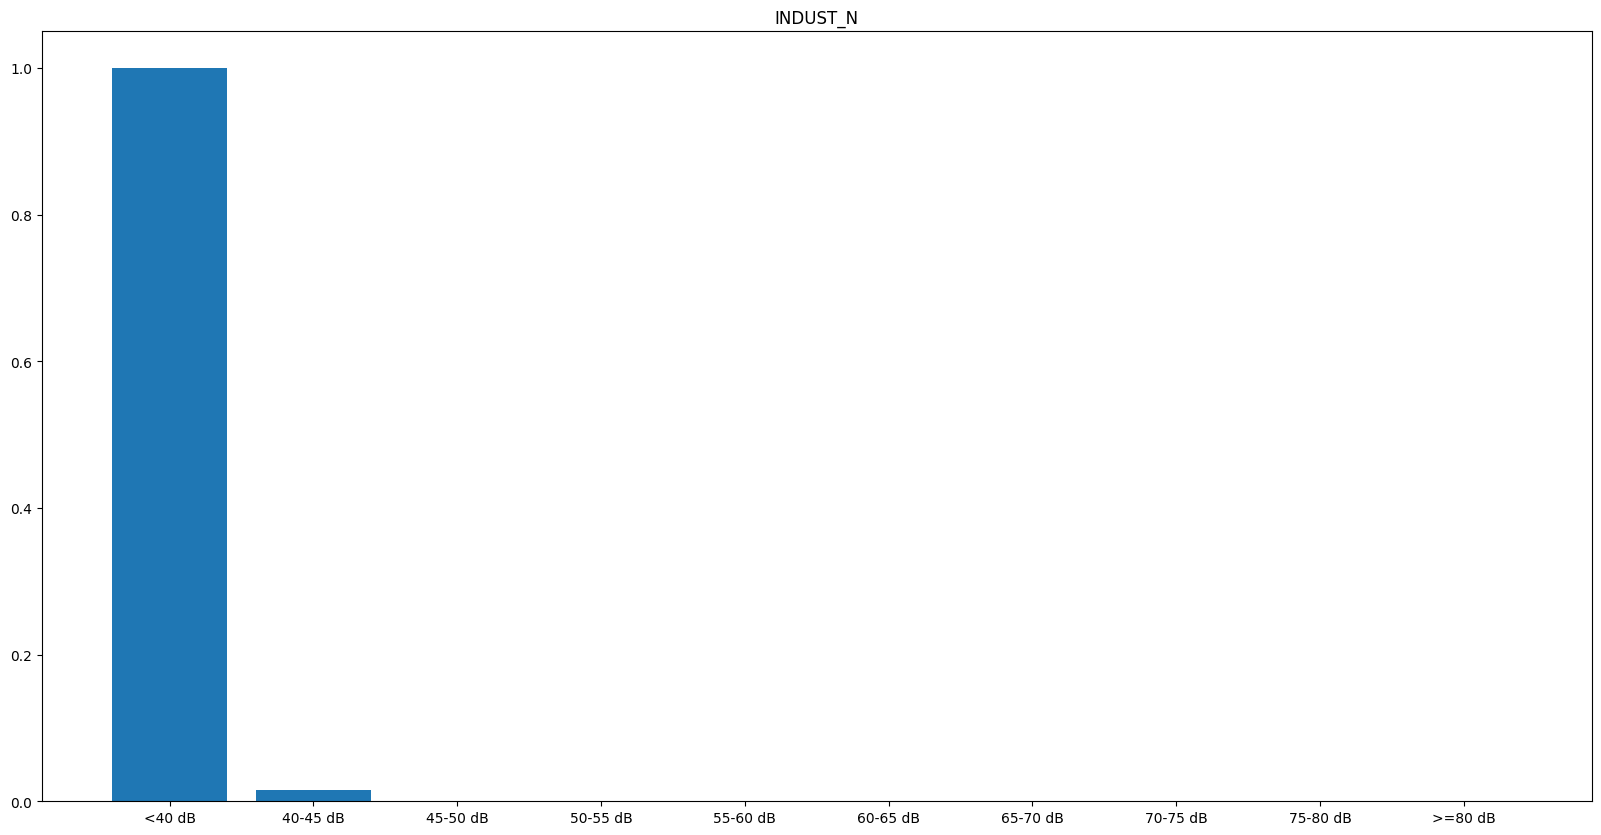

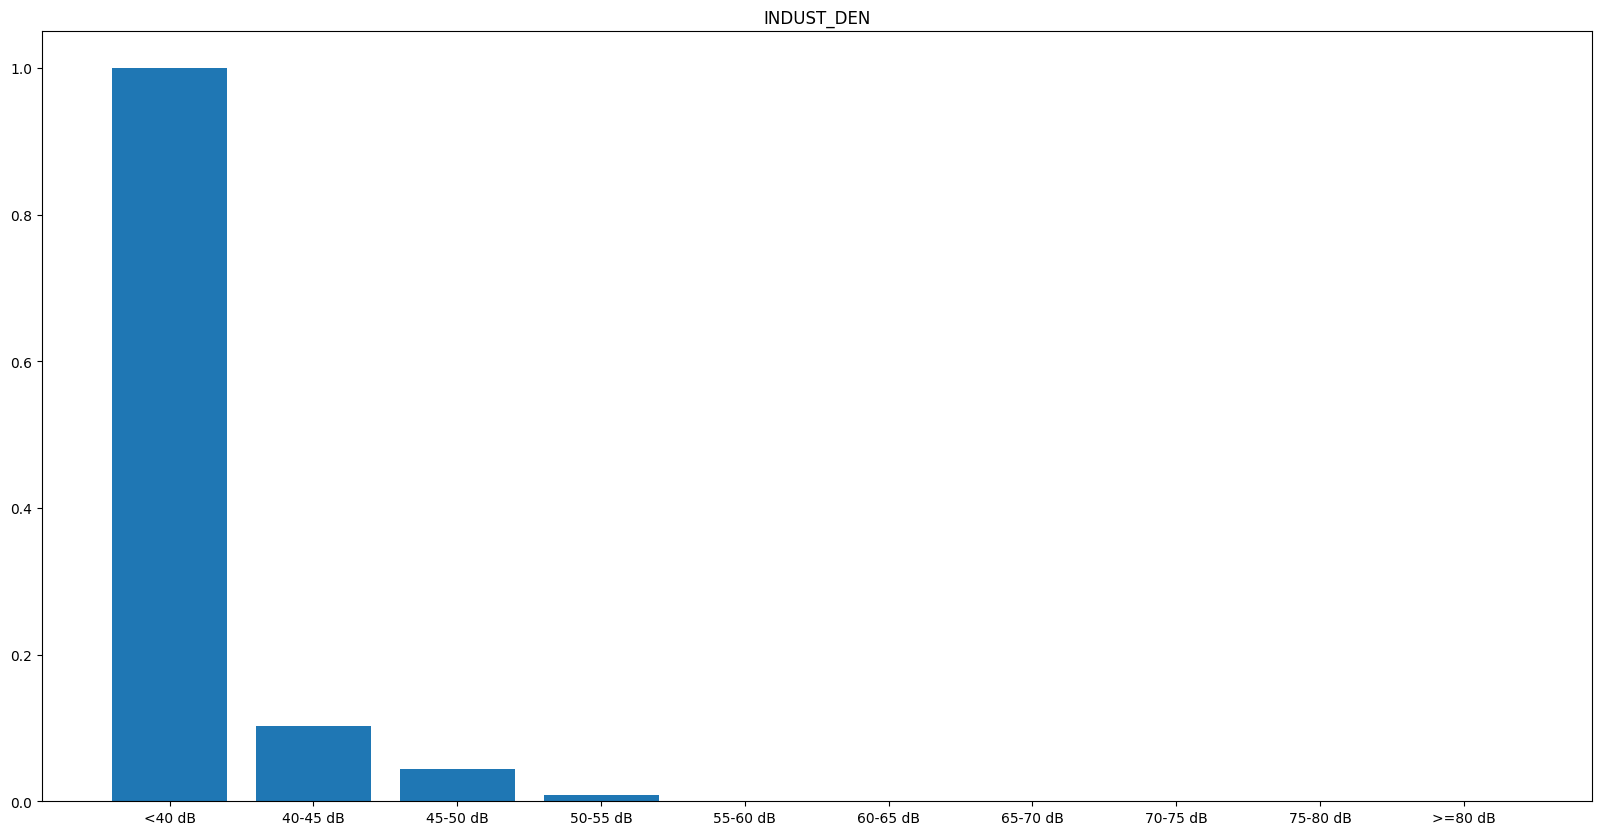

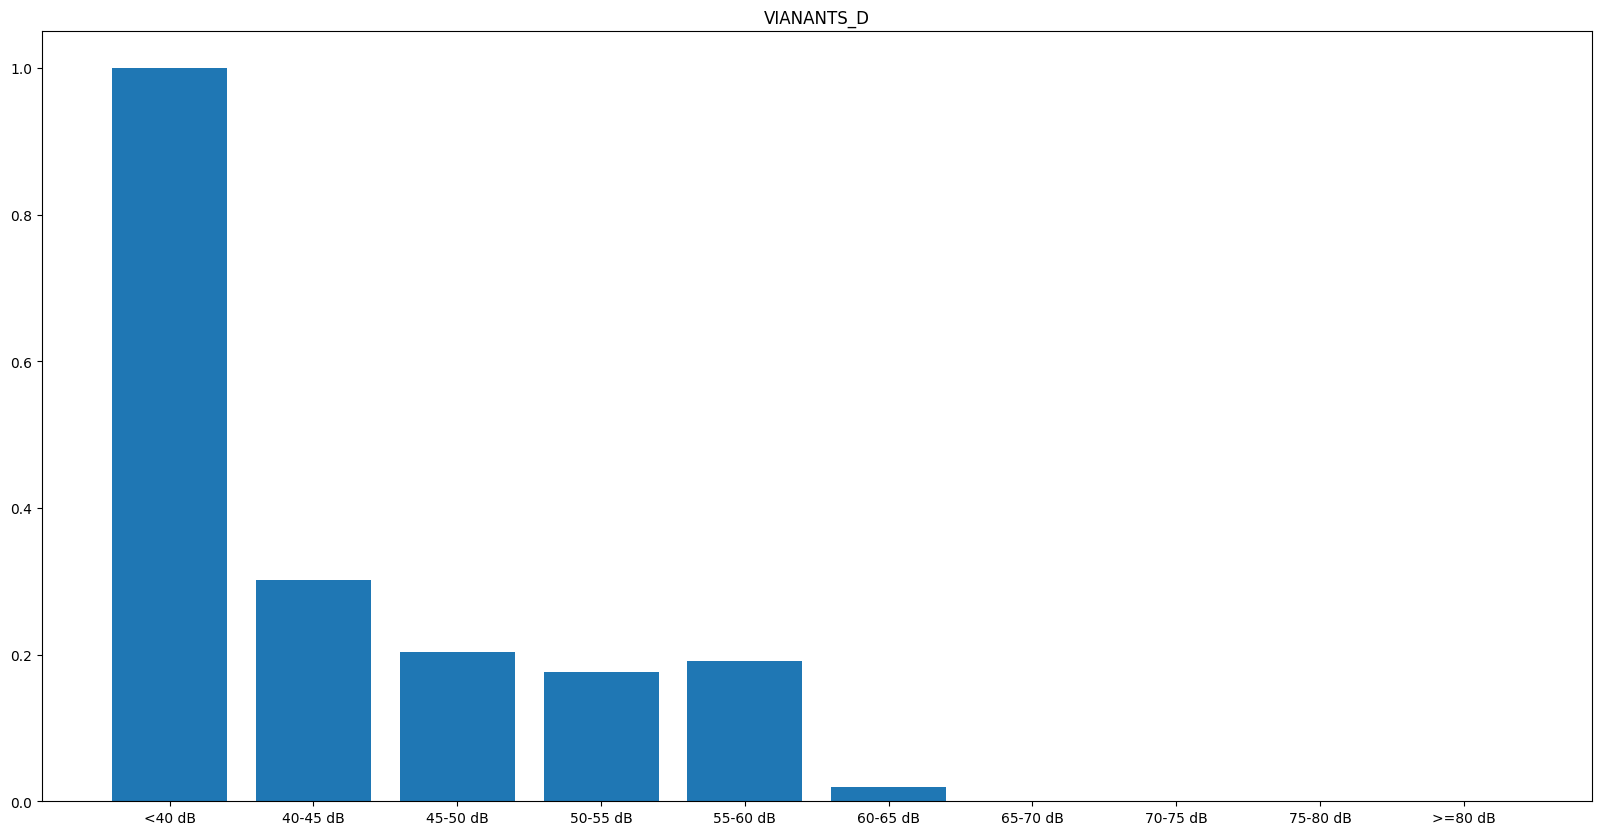

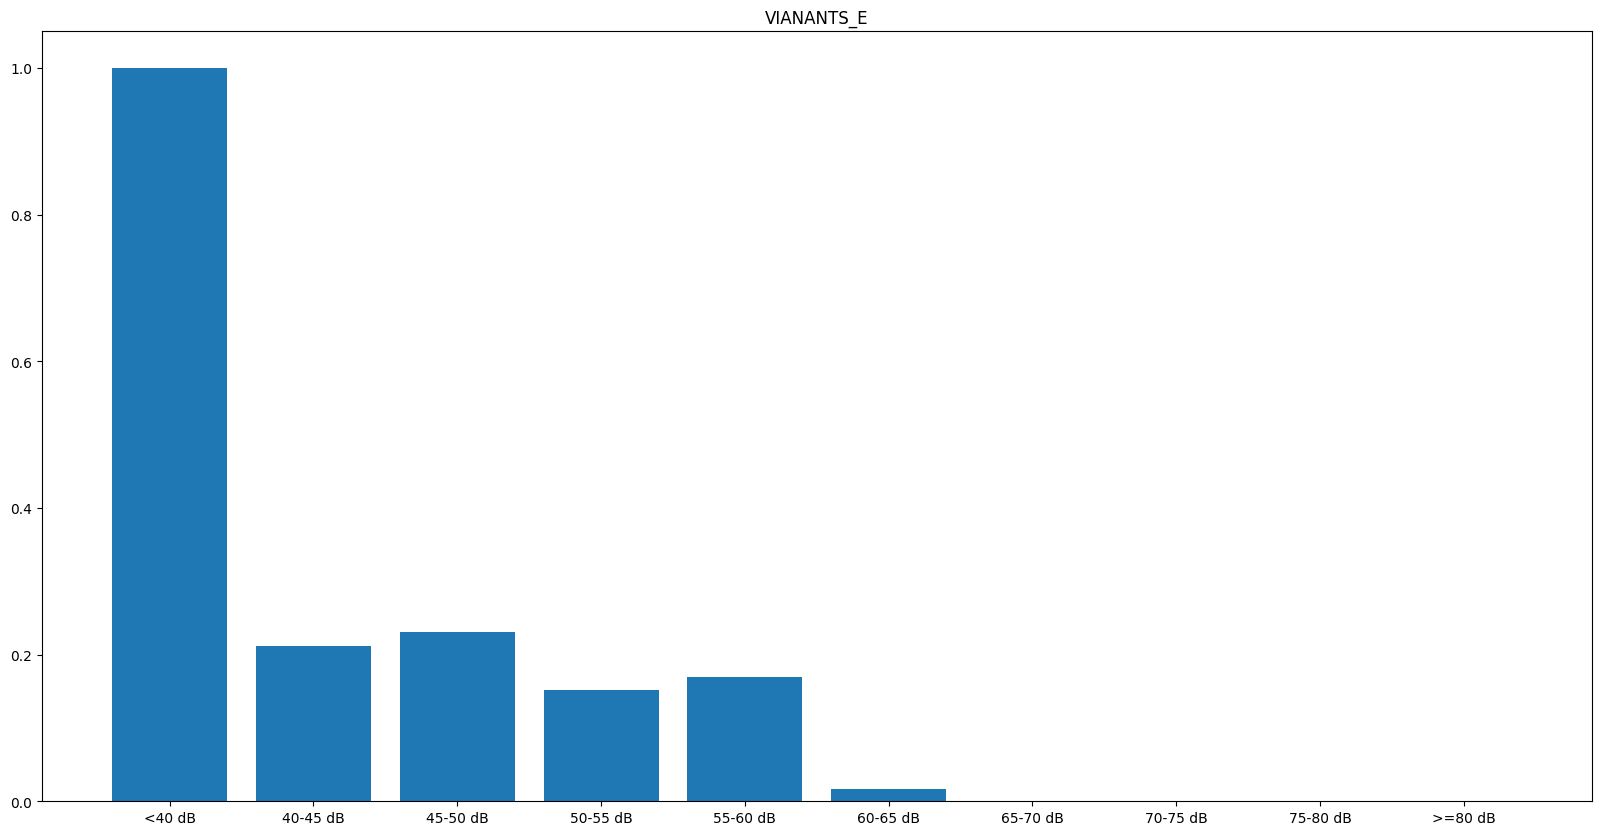

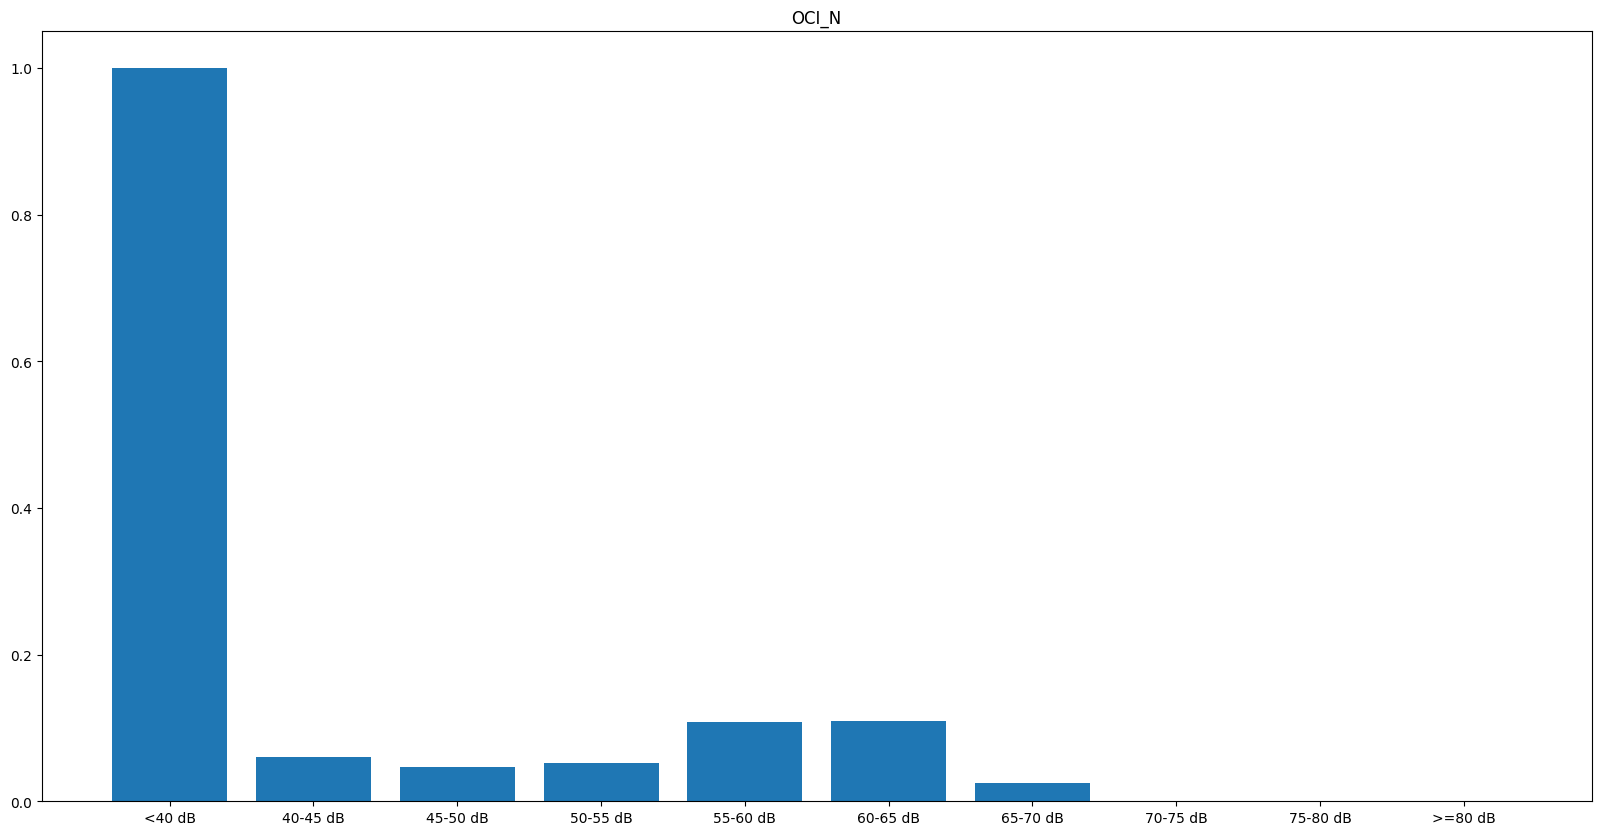

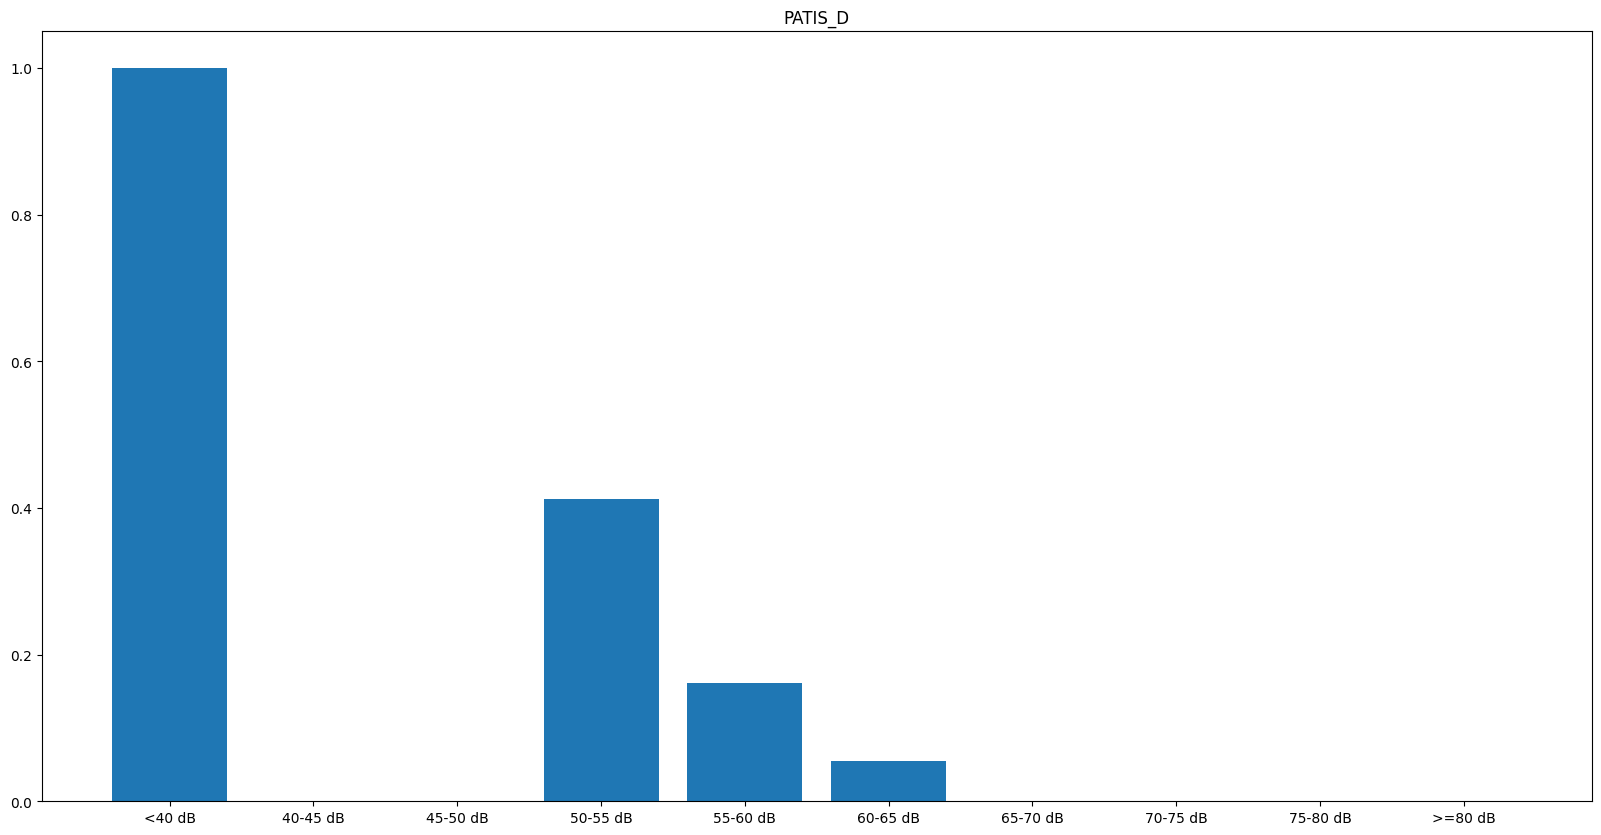

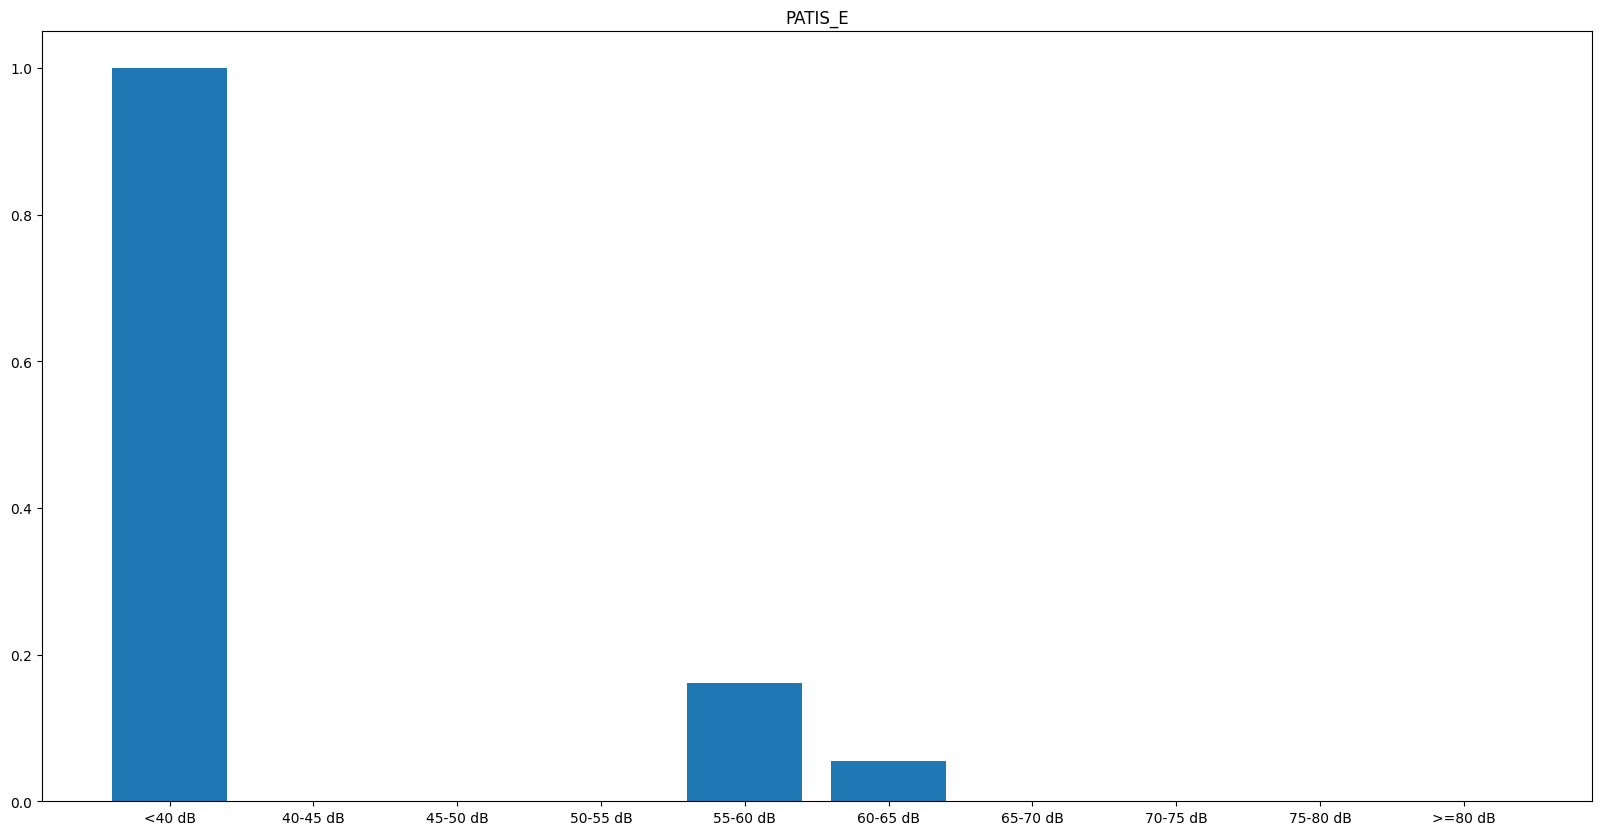

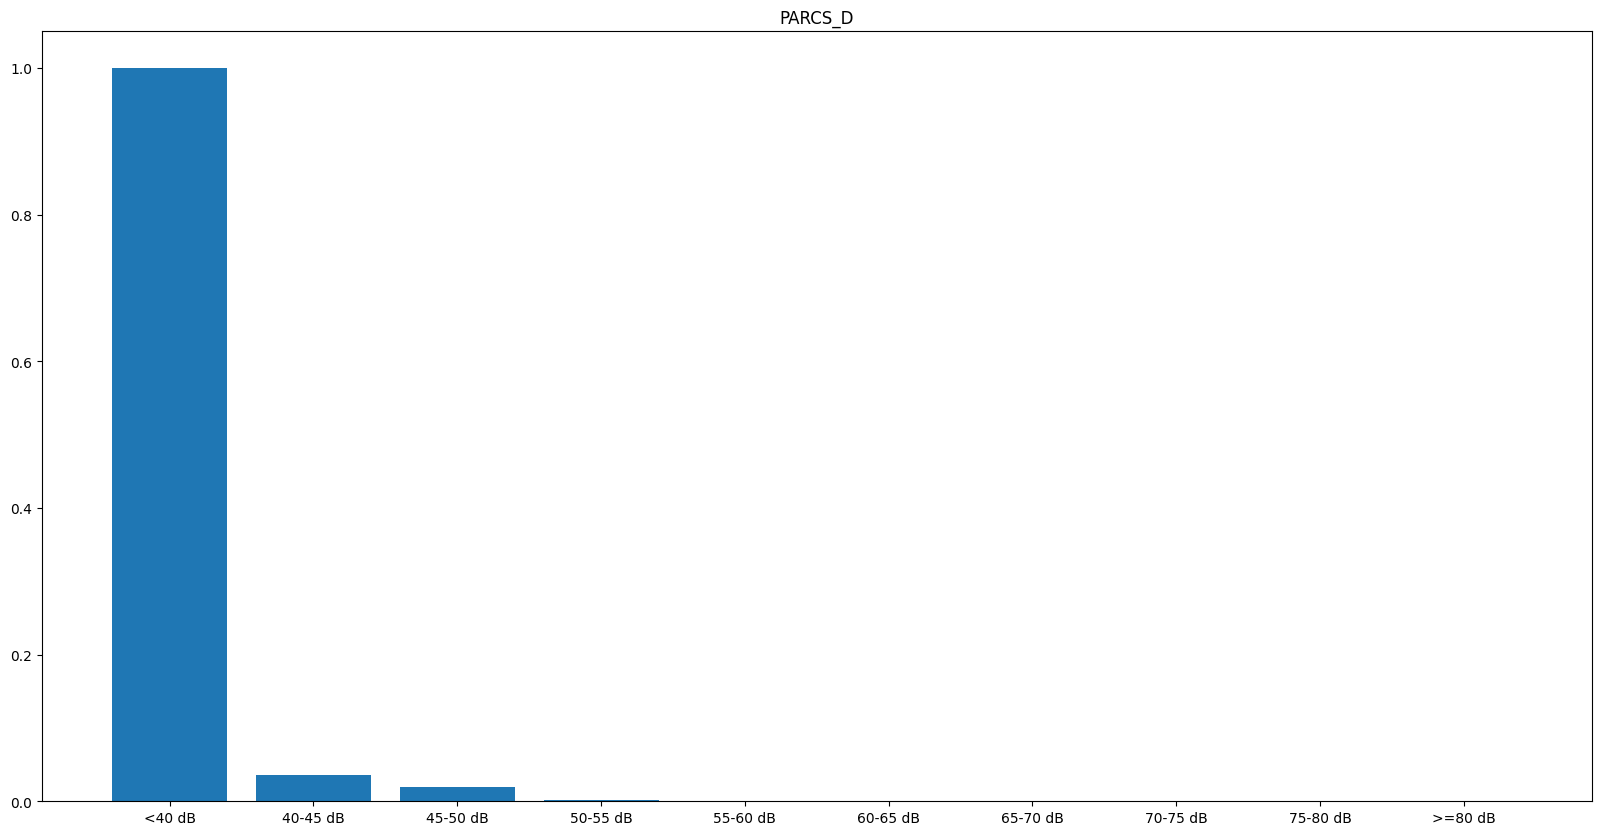

In [34]:
x = nopolldf_reshaped["Rang_soroll"] # x axis

# plot each column in a separate plot
for columns in nopolldf_reshaped.columns:
    if columns != "Rang_soroll":
        y = nopolldf_reshaped[columns]
        plt.figure(figsize=(20,10))
        plt.bar(x, y)
        plt.title(columns)
        plt.show()  
        

It seems like we have some columns which contain little information (e.j. INDUSTRIAL_N). We could get rid of them, but maybe the few cases where they are not 0 are important. We will leave them for now and see if we can get rid of them later on using PCA.

Last, we scale the data so that all the columns have the same weight in the analysis.

In [35]:
# scale the data ignoring the "Rang_soroll" column
scaler = StandardScaler()
scaled_data = scaler.fit_transform(nopolldf_reshaped.drop(["Rang_soroll"], axis=1))

# create a new DataFrame with the scaled data, as the final step of the preprocessing
soroll_prep= pd.DataFrame(scaled_data, columns=nopolldf_reshaped.columns.drop(["Rang_soroll"]), index=nopolldf_reshaped.index)

# add the "Rang_soroll" column
soroll_prep["Rang_soroll"] = nopolldf_reshaped["Rang_soroll"]

In [36]:
soroll_prep.head()

TOTAL_D   TOTAL_E   TOTAL_N  TOTAL_DEN  TRANSIT_D   
Nom_Districte Nom_Barri                                                       
Ciutat Vella  el Raval  -0.249556  1.282137  3.095116  -1.089102   0.143225  \
              el Raval   1.866723  1.027949 -0.318490   2.055077   2.325760   
              el Raval  -0.288034 -0.483741  0.083166   0.220507  -0.354758   
              el Raval   0.216575  0.367285  0.405437  -0.229461   0.082630   
              el Raval   1.082875  1.090656  0.049144   0.604435   0.948593   

                         TRANSIT_E  TRANSIT_N  TRANSIT_DEN   GI_TR_D   
Nom_Districte Nom_Barri                                                
Ciutat Vella  el Raval    1.761991   3.369924    -0.796608  4.348534  \
              el Raval    1.112312  -0.318550     2.733266 -0.191543   
              el Raval   -0.401760   0.409830    -0.023042 -0.464618   
              el Raval    0.467060   0.659454    -0.074613 -0.500358   
              el Raval    0.793560  -0.067063     0.653965 -0.521020   

                          GI_TR_E  ...  INDUST_E  INDUST_N  INDUST_DEN   
Nom_Districte Nom_Barri            ...                                   
Ciutat Vella  el Raval   4.208482  ...  3.001854  3.001854    3.016844  \
              el Raval  -0.269694  ... -0.333539 -0.333539   -0.335205   
              el Raval  -0.455762  ... -0.333539 -0.333539   -0.335205   
              el Raval  -0.485554  ... -0.333539 -0.333539   -0.335205   
              el Raval  -0.492348  ... -0.333539 -0.333539   -0.335205   

                         VIANANTS_D  VIANANTS_E     OCI_N   PATIS_D   PATIS_E   
Nom_Districte Nom_Barri                                                         
Ciutat Vella  el Raval     1.739490    1.767171  2.272060  3.072556  3.018132  \
              el Raval     0.122191    0.244591 -0.173448 -0.357690 -0.342969   
              el Raval     0.032827   -0.034531 -0.257585 -0.357690 -0.342969   
              el Raval     0.029545   -0.070859 -0.282758 -0.298671 -0.342969   
              el Raval    -0.128757   -0.143158 -0.145172 -0.301890 -0.304900   

                          PARCS_D  Rang_soroll  
Nom_Districte Nom_Barri                         
Ciutat Vella  el Raval   3.006444       <40 dB  
              el Raval  -0.334049     40-45 dB  
              el Raval  -0.334049     45-50 dB  
              el Raval  -0.334049     50-55 dB  
              el Raval  -0.334049     55-60 dB  

[5 rows x 27 columns]

### Merge

Now we will proceed with the merging of the 2 datasets. Thanks to all the preprocessing we did before, it will be a very simple task, given that we only have to join the two datasets by the index.

In [37]:
llogdf_prep.columns

Index(['Preu_T1', 'Preu_T2', 'Preu_T3', 'Preu_T4', 'Preu_m2_T1', 'Preu_m2_T2',
       'Preu_m2_T3', 'Preu_m2_T4'],
      dtype='object', name='Trimestre')

In [38]:
df = pd.merge(llogdf_prep, soroll_prep, on=["Nom_Barri", "Nom_Districte"], how="inner")
df.head()

Preu_T1   Preu_T2   
Nom_Barri                             Nom_Districte                       
Sant Pere, Santa Caterina i la Ribera Ciutat Vella   0.354949  0.480243  \
                                      Ciutat Vella   0.354949  0.480243   
                                      Ciutat Vella   0.354949  0.480243   
                                      Ciutat Vella   0.354949  0.480243   
                                      Ciutat Vella   0.354949  0.480243   

                                                      Preu_T3   Preu_T4   
Nom_Barri                             Nom_Districte                       
Sant Pere, Santa Caterina i la Ribera Ciutat Vella   0.273846  0.297303  \
                                      Ciutat Vella   0.273846  0.297303   
                                      Ciutat Vella   0.273846  0.297303   
                                      Ciutat Vella   0.273846  0.297303   
                                      Ciutat Vella   0.273846  0.297303   

                                                     Preu_m2_T1  Preu_m2_T2   
Nom_Barri                             Nom_Districte                           
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     1.211732    1.349137  \
                                      Ciutat Vella     1.211732    1.349137   
                                      Ciutat Vella     1.211732    1.349137   
                                      Ciutat Vella     1.211732    1.349137   
                                      Ciutat Vella     1.211732    1.349137   

                                                     Preu_m2_T3  Preu_m2_T4   
Nom_Barri                             Nom_Districte                           
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     1.295897    1.128098  \
                                      Ciutat Vella     1.295897    1.128098   
                                      Ciutat Vella     1.295897    1.128098   
                                      Ciutat Vella     1.295897    1.128098   
                                      Ciutat Vella     1.295897    1.128098   

                                                      TOTAL_D   TOTAL_E  ...   
Nom_Barri                             Nom_Districte                      ...   
Sant Pere, Santa Caterina i la Ribera Ciutat Vella  -0.551882  0.407596  ...  \
                                      Ciutat Vella   1.368710  1.116411  ...   
                                      Ciutat Vella   0.860803  0.743527  ...   
                                      Ciutat Vella   0.286934  0.202678  ...   
                                      Ciutat Vella   0.717886  1.089536  ...   

                                                     INDUST_E  INDUST_N   
Nom_Barri                             Nom_Districte                       
Sant Pere, Santa Caterina i la Ribera Ciutat Vella   3.001854  3.001854  \
                                      Ciutat Vella  -0.333539 -0.333539   
                                      Ciutat Vella  -0.333539 -0.333539   
                                      Ciutat Vella  -0.333539 -0.333539   
                                      Ciutat Vella  -0.333539 -0.333539   

                                                     INDUST_DEN  VIANANTS_D   
Nom_Barri                             Nom_Districte                           
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     3.016844    1.026405  \
                                      Ciutat Vella    -0.335205    0.155748   
                                      Ciutat Vella    -0.335205    0.380069   
                                      Ciutat Vella    -0.335205    0.277210   
                                      Ciutat Vella    -0.335205   -0.037569   

                                                     VIANANTS_E     OCI_N   
Nom_Barri                             Nom_Districte                         
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     1.168642  2.436198  \
                      

In [39]:
df.shape

(700, 35)

## PCA

In order to do the PCA analysis, we will have to make a tough decision. We have to decide if we want to keep the data about the intervals in dB, given that the implementation of PCA only works with numerical data. 

After some consideration, I have decided that the information could be important and, given that they have a natural order, we can transform them into numerical data. We will do this by taking the mean of the interval and using it as the value of the column.

In [40]:
def apply(x : str):
    if x[0] == "<":
        return 20
    elif x[0] == ">":
        return 100
    else:
        x = x.replace("dB", "")
        split = x.split("-")
        return (float(split[0]) + float(split[1]))/2
        
df["Rang_soroll"] = df["Rang_soroll"].apply(apply)

Now we scale the new numerical column.

In [41]:
#scale the data
scaler = StandardScaler()
df["Rang_soroll"] = scaler.fit_transform(df["Rang_soroll"].values.reshape(-1, 1))

In [42]:
df.head()

Preu_T1   Preu_T2   
Nom_Barri                             Nom_Districte                       
Sant Pere, Santa Caterina i la Ribera Ciutat Vella   0.354949  0.480243  \
                                      Ciutat Vella   0.354949  0.480243   
                                      Ciutat Vella   0.354949  0.480243   
                                      Ciutat Vella   0.354949  0.480243   
                                      Ciutat Vella   0.354949  0.480243   

                                                      Preu_T3   Preu_T4   
Nom_Barri                             Nom_Districte                       
Sant Pere, Santa Caterina i la Ribera Ciutat Vella   0.273846  0.297303  \
                                      Ciutat Vella   0.273846  0.297303   
                                      Ciutat Vella   0.273846  0.297303   
                                      Ciutat Vella   0.273846  0.297303   
                                      Ciutat Vella   0.273846  0.297303   

                                                     Preu_m2_T1  Preu_m2_T2   
Nom_Barri                             Nom_Districte                           
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     1.211732    1.349137  \
                                      Ciutat Vella     1.211732    1.349137   
                                      Ciutat Vella     1.211732    1.349137   
                                      Ciutat Vella     1.211732    1.349137   
                                      Ciutat Vella     1.211732    1.349137   

                                                     Preu_m2_T3  Preu_m2_T4   
Nom_Barri                             Nom_Districte                           
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     1.295897    1.128098  \
                                      Ciutat Vella     1.295897    1.128098   
                                      Ciutat Vella     1.295897    1.128098   
                                      Ciutat Vella     1.295897    1.128098   
                                      Ciutat Vella     1.295897    1.128098   

                                                      TOTAL_D   TOTAL_E  ...   
Nom_Barri                             Nom_Districte                      ...   
Sant Pere, Santa Caterina i la Ribera Ciutat Vella  -0.551882  0.407596  ...  \
                                      Ciutat Vella   1.368710  1.116411  ...   
                                      Ciutat Vella   0.860803  0.743527  ...   
                                      Ciutat Vella   0.286934  0.202678  ...   
                                      Ciutat Vella   0.717886  1.089536  ...   

                                                     INDUST_E  INDUST_N   
Nom_Barri                             Nom_Districte                       
Sant Pere, Santa Caterina i la Ribera Ciutat Vella   3.001854  3.001854  \
                                      Ciutat Vella  -0.333539 -0.333539   
                                      Ciutat Vella  -0.333539 -0.333539   
                                      Ciutat Vella  -0.333539 -0.333539   
                                      Ciutat Vella  -0.333539 -0.333539   

                                                     INDUST_DEN  VIANANTS_D   
Nom_Barri                             Nom_Districte                           
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     3.016844    1.026405  \
                                      Ciutat Vella    -0.335205    0.155748   
                                      Ciutat Vella    -0.335205    0.380069   
                                      Ciutat Vella    -0.335205    0.277210   
                                      Ciutat Vella    -0.335205   -0.037569   

                                                     VIANANTS_E     OCI_N   
Nom_Barri                             Nom_Districte                         
Sant Pere, Santa Caterina i la Ribera Ciutat Vella     1.168642  2.436198  \
                      

Sadly, the most popular implementation of PCA in python (sklearn) does not support NaN values. We will have to get rid of them, because, as discussed before, we cannot imput them without risking to introduce bias in the analysis.

In [43]:
df.dropna(inplace=True)
df.shape

(680, 35)

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(df, y = "Rang_soroll")

PCA(n_components=0.95)

### Analysis of the PCA

In [45]:
pca.explained_variance_ratio_

array([0.5386918 , 0.18998071, 0.1608512 , 0.03139555, 0.0257638 ,
       0.01823129])

As usual in these kind of analysis, we will start by looking at the explained variance ratio. Usually, the threshold for picking dimensions is 0.8 of the total variance, so we end up with 3 dimensions.

In [46]:
pca.feature_names_in_

array(['Preu_T1', 'Preu_T2', 'Preu_T3', 'Preu_T4', 'Preu_m2_T1',
       'Preu_m2_T2', 'Preu_m2_T3', 'Preu_m2_T4', 'TOTAL_D', 'TOTAL_E',
       'TOTAL_N', 'TOTAL_DEN', 'TRANSIT_D', 'TRANSIT_E', 'TRANSIT_N',
       'TRANSIT_DEN', 'GI_TR_D', 'GI_TR_E', 'GI_TR_N', 'GI_TR_DEN',
       'FFCC_D', 'FFCC_E', 'FFCC_N', 'FFCC_DEN', 'INDUST_D', 'INDUST_E',
       'INDUST_N', 'INDUST_DEN', 'VIANANTS_D', 'VIANANTS_E', 'OCI_N',
       'PATIS_D', 'PATIS_E', 'PARCS_D', 'Rang_soroll'], dtype=object)

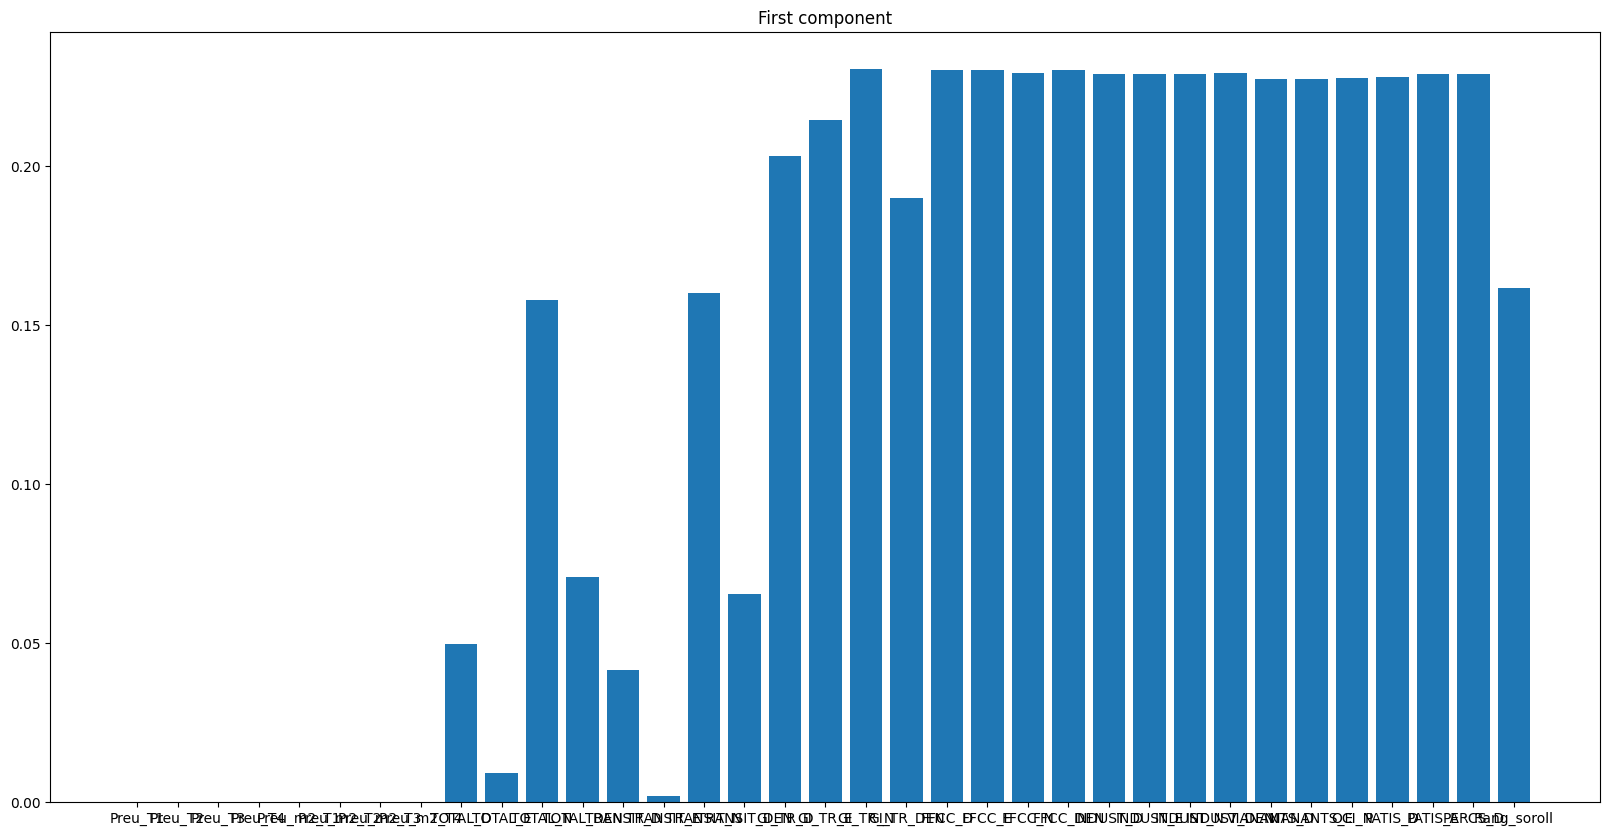

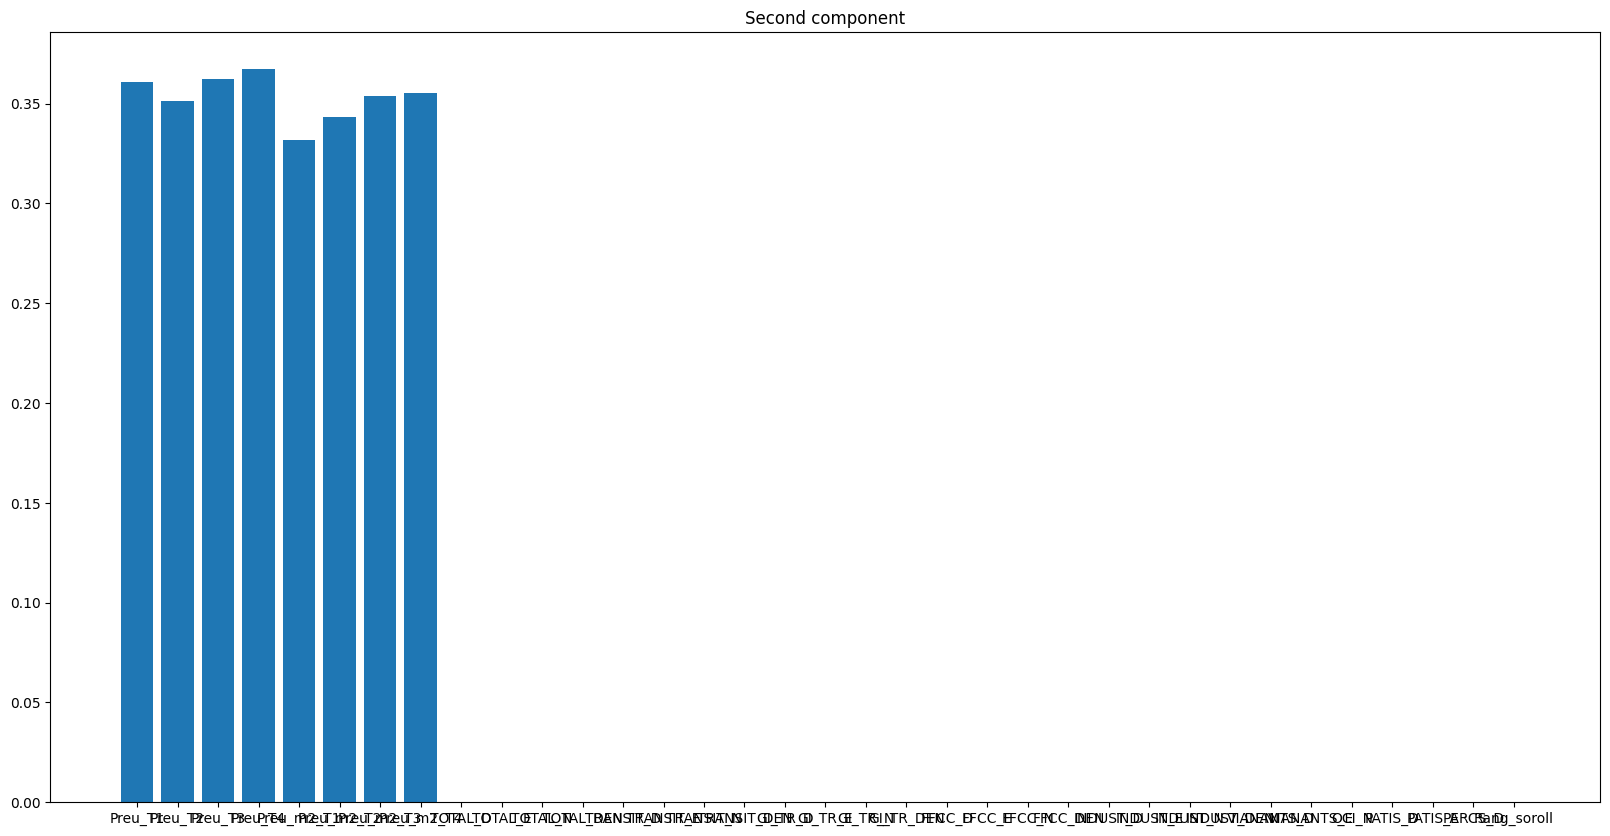

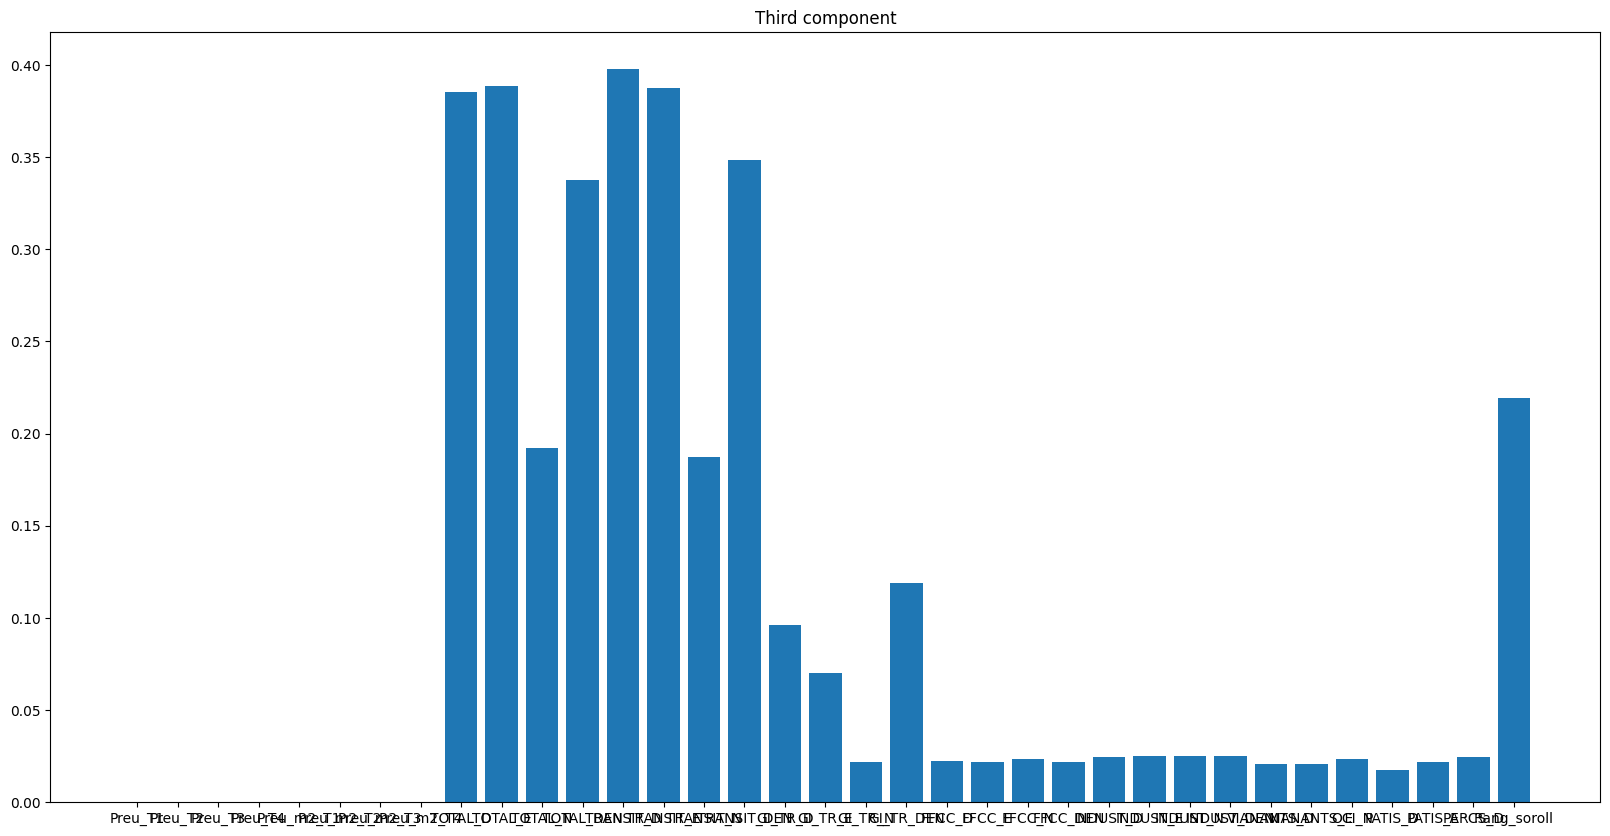

In [47]:
x = pca.feature_names_in_
f = lambda y: np.abs(y) # function to apply to the explained variance ratio

plt.bar(x, f(pca.components_[0]))
plt.title("First component")
plt.show()

plt.bar(x, f(pca.components_[1]))
plt.title("Second component")
plt.show()

plt.bar(x, f(pca.components_[2]))
plt.title("Third component")
plt.show()

(Analysis in the README.md)